In [1]:
from sklearn import datasets  
import matplotlib.pyplot as plt  
import pandas as pd
# import seaborn as sns
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB   
#import for display
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import IPython
import numpy as np
import librosa
import soundfile as sf

/home/wlg1fe/anaconda3/envs/octocat1/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/wlg1fe/anaconda3/envs/octocat1/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
# Get example audio file
def get_mfcc_feature(data_path):
    """
    Converts a wave file into his mfcc features
    @args:
        data_path(str):
    @return:
        mfcc_features(np.array)
    """
    x, sr = librosa.load(data_path)
    x = librosa.util.fix_length(x, 45000)
    mfcc_features= librosa.feature.mfcc(y=x, sr=sr)
    
    return mfcc_features

# Get example audio file
def get_mfcc_feature_data(data):
    """
    Converts a wave file into his mfcc features
    @args:
        data_path(str):
    @return:
        mfcc_features(np.array)
    """
    x = librosa.util.fix_length(data, 45000)
    mfcc_features= librosa.feature.mfcc(y=x, sr=sr)
    
    return mfcc_features

# Visualize data

In [3]:
import os
import sqlite3
import pandas as pd
from sqlalchemy import create_engine

if os.getcwd().split("/")[-1]!="octocat":
    os.chdir("..")
project_dir=os.getcwd()
database_filename = "db.sqlite3"
database_path = "sqlite:///{}".format(os.path.join(project_dir, database_filename))    
con = sqlite3.connect("db.sqlite3")
engine = create_engine(database_path)
con.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;").fetchall()

a = con.execute("Select * from homepage_memory").fetchall()
df = pd.read_sql_table("homepage_memory",
                           con=engine)

df.head()
#Select unique row based on ground_truth
df_unique = df.drop_duplicates('ground_truth', keep='last').reset_index(drop=True)


Text(0.5, 1.0, 'Gustav')

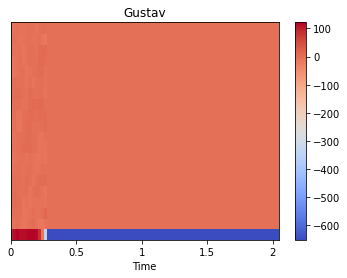

Text(0.5, 1.0, 'Svenja')

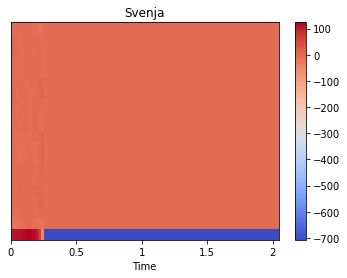

Text(0.5, 1.0, 'Svenja')

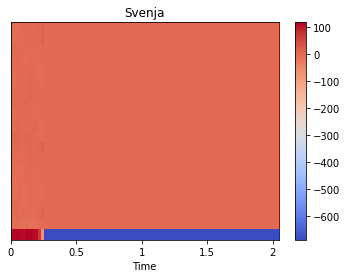

Text(0.5, 1.0, 'hans')

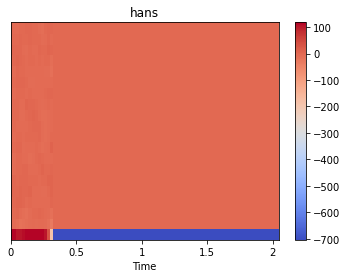

Text(0.5, 1.0, 'mareike')

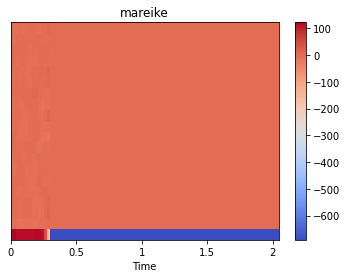

In [52]:
## Visualize the unique labels


from io import BytesIO
from scipy.io.wavfile import write
import numpy as np
import IPython.display as ipd
import librosa
from librosa.display import waveplot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

def bytes_numpy(bytes_raw):
    load_bytes = BytesIO(bytes_raw)
    loaded_np = np.load(load_bytes, allow_pickle=True)
    return loaded_np


for i in range(0,len(df_unique)):
    
    blob_data = df_unique.loc[i,"blob_data_raw"]
    blob_data_mfcc = df_unique.loc[i,"blob_data_mfcc"]
    

    test =b"""\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x04B\x85\x81\x02\x18S\x80g\x01\xff\xff\xff\xff\xff\xff\xff\x15I\xa9f\x99*\xd7\xb1\x83\x0fB@M\x80\x86ChromeWA\x86Chrome\x16T\xaek\xbf\xae\xbd\xd7\x81\x01s\xc5\x87\xc0\xa5`\xb1\xc3\xe1\xb6\x83\x81\x02\x86\x86A_OPUSc\xa2\x93OpusHead\x01\x01\x00\x00\x80\xbb\x00\x00\x00\x00\x00\xe1\x8d\xb5\x84G;\x80\x00\x9f\x81\x01bd\x81 \x1fC\xb6u\x01\xff\xff\xff\xff\xff\xff\xff\xe7\x81\x00\xa3A\xee\x81\x00\x00\x80\xfb\x83\xbe\xba}\xa3Cb\xf8\xa6\x99\xce\xc8\xf5\xaa\xa9\x8ah\x9a\n\xc4\xcf\xcb\xb1q\xbd"\xe5\x9e\x9f\r\x83y\x87\xa5\xef!OD\xaa\x81t\xa2\xba;A\x02\xaa~a\r\x84 \\\xf6\x81vb\xe1\\q,\xf65{n?\x00@h\xd8\xbd\'!\x9b\xe7~\xa60\xc3g@w\x990\xbc\xe7\'\xcfY\xa0\xc2\x86/\x93\x13kj\x18\xee\xd3k\xe1\x88\x9b\x03\x99\xe1;H\x9b\x03\x93\x9f\x9f<\xa3\xeb8&]\x18&]\x1f\x10\xfa\xcd\x00\xf1\x0cK?\xef}\xfa\xff\xc0\xb0]\xc1\x08\xc6\xa2\xbd\xc5\x85\x8e\xf3P\x83a\xc0\xb65\x1b\x95xNCg\x98|\xe2\xfc\x84$\x95E\xb3=\xcay\xb0R[\xcdj\x81\xaf0N\xefX\xa5G\xd0\xc6\xa7\x08\xcd\x90t\xba\x7f\xa3\xbcxS\xf8\xaf}\x8a:#\xde\xba$\xe7\x99\x0b_\xf9\xc1@\xb6VOX\xc4\xf7\x16\xe1-\xcdZ\xaeY\xe4\xf2\x12\x92|\xee\xb6\x8d\xa3j\x99\xed\x8d\xb1_I\x0e\xea\xfa\xccc\x0bT\x84\xf5\xb98R\x1bn\xd5\x1cl!u.\x14\xb5t\xa4\xb8SY\xd3\xd9\x8c\xe7z(o\x86\x1c\x06C\xff\x00\x9e\xa5W>\x97\xb0\xc4Oq?\x0f9\xa3\xc3\xee\x13\x94Q\xc2\xf1O\x93\x13d1n\xeav\xa6}W\xc6\xfd\xa0d\xda&O\xf7R`\x85{ [\x94\x14\x12{\x9b\xbdTo\xf5\x00\xa9Y\x03\x05P.a]\x90\x15\xb5-\x16yQ\xd4*f1}vd\x8a?\xc7f\x9c\xba4\xecT\x1a\xb1B\x1d\xc3\xac\xb7\xa8\xf0B\x1b\xda\xc1\xf1\xa5\xa5\x03\x9559\xdaE\xaf\xdc\x1e\xe9s\xbb\x16\x1b4*\x0bT\xc3\x01\xbf\xd62\x04\xadG\x10\xf3\x06\xddw\x9c\xba\x9cRe\x00\xf98~\xc62\tF\x9c\xf5\xbd?\xae\x81\xe1\xbe_\x0f\xc0\x1e\xcf\xa3\xd9\xb7\xf6\xbb\xd1\x9a2\xe1\x10\x92]FU\xfd\te\x9bM\xe7\xca\xa7m?\x06+\xaf\xd3\xe2\xf1\xf0^\x86\xc6?5|0\x90nt\x90F;\x897i\xa3AN\x81\x00<\x80\xfb\x83rg\xc2s\xe5J\xef\x90\\\xf13\x00\xdf+\nS6\xec\x81\xff\xd2\r\xc1Iy;,\x9b\xf3\x9f\xd4\xc1\xbb@\xde\x10\xc0g\xf5\xac\x10\x94\xee\xd1\xbe\xf2\xbc\xbf\xb0h\xa7\xe6\x9a8\xed\x85\xcb\xc9\xc6\xfb\x94\xccS\xd1\xb6\xe1\x82\x87\x83\xfe\xc1\x86\xd7\x17~\xa9\xbbo\xbdy-N\x1b/\xc3x[{\x90\x954hl\xec\xd0\x9b%\xfekN\x11\xc29\x9a\xd7\xa7A\x99\xe3\xe68\xc1\x01\x82L\xa9D\x98\xf8\xff\x84\x97"j\x99\xfe\xeflrc\xc9?\xc6\x19\x81\xcc\xa1\x1fu\xe6\x0e\xda./\xd3H\x04\x009\xef\xd2\xf5(D\x80WN\tA\x03\xe4{#\xad\xa2"\xbe\xa2\xe4\xf6\xd7\x03\x81$\xf2\x003b\x93\xa1&\xfa\x9a6SR\x1e\xc2\x8c\xf0;\xbd\x8e\x90\x11\x94P\xad\x86\xb2f\xa3\xff`)@\xbd\xb7\xae8\x06\x86Dm\x9d\xd0zy\x8f!\x0c\x15\xf5dG\x1b\x9d\xce\x03\x8e6\xa1\xcb[\x9e\x94\xeeR\x05H:\x16\x80mm\xc4]1\x9b\xa8\xfebG\x8f\xf4f}\xfa\xfb\xa5\x1f"\x1d\x9a\xf2\xb97\x8a\x06@\xe6rm#]$fev\x00m\x0c.\x96\xfbi\xc9\xe5\x8f\xb7c9\xa4\x1f\x81\xb4\xb7H\x11\x8cd\x8e\xd0\xd3\xeb,\r\x988\xe4KF\x8bC.\xc6\x8a\xf8\xd9\xa8\x03H\xce\x15\xf7\xf5j}\xa3AW\x81\x00x\x80\xfb\x83kg\x12\xb1O<\x103\xf8\x869A&Ha]t`[\xbdao\x9b\x1d|\x05%8|\xfbj\x0b\x17#G\xcdC\xd4\xbf\xaf\xbeG2+\xb0\x89\xdd\x17\xc4F\xe7t\x1a\xa7I\rI\xb8!\x8ayqF\xa7\x00\xbbQ\x1f\x00\xbc\x00\x07\x9c-\xda6=m\xfe\xf3~\x84\xe1"\x00\x92\x00\x15\xca\xee\x7f\xe9\x11\xe3\x04\xbc\x0f\x0b\x94\x9e\x9e`\xe7m\x05R\rk\x10\x1e\xbc\x02\xa3;9\xe2\x19\xc1&\xf8\xfe\x9d\x9e\x04\xac\x7f\xa2\xaa&P\xaa\x1b\x94\xd4W\xb0\x7fQ\x95\xd3\xd5\xa7\xd5\x06\xcb\x1f\xf5\xa21\x00d$\xf5\x1b;\x98\x92\xbd\xe2\x96\xbb\xa3\x9f\xa2\xb5t\x10a\x91\x1d\x81\xe4\xae\xf8\x18/\xb7\xbe\xe4\x03\x92\xdc\xcav\x89\xa5\xbdB:<i\x1cK\x838\xad\xad\xc4c\xac\xc8\xa7\x8f\xe5\x02\t\x93\xd2\x8f\x1a\x01\x8c0\xab\x85\x02\x9f\xd0\x8fWx\x84\xe0A\x1b\xd0i\xc8\x9e\xa7\xaag\xb7"Q\xcf\x0e\'\xdd\x89\n\xdeL\xccv\xd3\xfbJ\xbc\xdf\x04FdoT\xea\xa8`\x13x\x91\xab\xd3\x03\xc0bP,\xfb]\xa2\x14Z\xfbf\xebQ\x9fF\xaa\x81\x93/\xd2\xe2\xb8Ws\x0e\x1c\x80\x0eo\xda(\xb7g\xfb\xfc\x83\xb3\x95R\xb6\xbe\xbb\n\xe3\xe7\x0f>\x18\xcd(\xf3\x86&\xc2\x98\xb3C\xb7D\xdaU\xf0 \xd1\xb7\xc9\xfbcg.\xa0\xa9\xd2\xa3A\x83\x81\x00\xb4\x80\xfb\x03IC\tDw!\xf9\x85\x01Z"\xc3j\x89\xff\xe2|\xe1>h\xa4\x11\xe3\xc2Q\xa0\xa7\xbd)\xd2\xcaQu6\xb5\xf01#\xca\x93\xb3\xec\xe2u\xb9\xb0\xb8\xae/\xf1\x95\xabP3\xac\xac\x97\x11\xbdf\xef\xa7\xf9\xacHF\xbb]\xdeu\xef\x8e\xfe\xff\x1d\xb4l\x82L,\x84\xb0~\r\x17\xaa\xd8aFW\x00\\\xb6K9A\x01\xeb\x18w2\xc4\xc5\xdc\x1ah-X\xc5\xb4\x94\xb6\x13\x1f\xcc\x08\x02,D@\xf5\x9c\xc8dgB\\\x0bg\xd7\xa20\xde\xb5\xec\x1dJLh\x116\x04VV)\xd0<\x85\x94\xbf1\xca\x17\xa4Am\xde\xd9B\x07GQc_\xf5\x0fe\xfdqk\x9b\xc8v\xe5f\x19+\xb6!\x94\x0eR<(\x99\xb1\x8ah\xf7C\x97\xc5\xb8D\x17w\xd1\xe4\xbf\xf6\xaf\x13\x97\x94\x89wh\xac\xe7m\x18\xf6\xbcSD1\xa9\x15\xba.p\xcf\xe0\x97Y\x14u\xd4\xcdtWN\x0bo\x19\xe6?Q)\xbdY\xa0\xca\xd7\x93\x97\xf0l\xb7\x84\xde\x8e\x84H\x840\xec\x90\xb0\x91\x14i\xcd<\xe5\xf2O\xc8%J*\xcbe\x8a\x85\xb4\x82\xc9i\x17\xad\xdc\x1aA!\x89\xc1\xb6\x12\xa8X\x83\x9b\x9e\xa5\xb5&\x81=IA\x08\xa9\x87\xa47\xf6"f\x7f\xef\x8d\xa0,8\xf0w\x83\xfa\xaf\xe7\x10D\xdb\x12*4\xc8\xd2\\Z\x08\xba\x02Z\xbb\x82\\\x05\xf8\xe1\xde\x18\xb6\x1e\xf1\x9b#$\xdd\xc3{\xcc\xd7\xbf:UJ\xc7\x0b\x10\x83E\x8bLY\xff\xe8\xdbB\x19\xf5\x99\xfe\xadDV-\x15\x98\xd0\xa3A\x83\x81\x00\xf0\x80\xfb\x03\x80\x9f.+\x1c\xdb\x11\xb3\xad\xbd\xf2="\x84\xb8\xf1\x01\nR*O\xd4\x8d8\xb2\xcb\x0e\xd61\x9f\x18\xee\xa8\x97\xae\x88\x8a\xa6F4r\xa1\x9f\x80>\xa4kQt\xcd\xb2\x8c\x84>e\xe1z\x1a\x05\xb9\xe0;zXO\xad\xb9Z\x15X\xf8\xb7\xa8HKF\xdc;Q~\x8fc\xd9e\x8f\xa8(\xb5\r\x81=,\x82\xa3>\xd3\x02v\xb7`\xa0\x9dyrM\x97\xf6\xb5\x93\xe3$\x9d\xbd\x9f\x14\xfb\xdb\xbbp\xd5\x8e\x18\x88\x82%D\xd2ZK\xa4\xc3r6`\x1e\xd2\x15+.\xb1\xae\xef\xb8`\x9bh:v\x85\x1b\x98\xdfq\xb5\xd0\xce H\xe2jt<\x02tG\xf1\x8fm\xc5\x04I\x94\xd6_\xd2\x1f\xbcy\x84\xab(\xb6\xe3"\x129\x10\xd2F\x14n\xa3:\x99\x05\xec\xe8\xc3\x97\xa2+\x89\x8d\xb7\xaf\x8d\x02\xe5Yd\xcc\xf3_\x96E\xbc\xec\xa6\xbb1\xc7\x99h\xe7*\xc2\x99W(w\xa1\xa8/\xd0=dzA\xe7\xd8\xda\n\xa8 RI\xf6[;!\x11\xb6\xa3MDa\r\xcb\xc9N\xc6BW\x9a\xc6g\x8f\x01\xde\x00D\xb1\xe3v]M\x0fT\x99\xb4&\x18\x08$`\xaf_Go\xfe\xd0;d\x9a9Y\xf4\x1c\xbc\xb2H\x10\xf3A\x82\xa6\xb6I\xe4O\xcf.\x07A\xca\xae^M\xda\xc53\xfd*\x87\xd6Y\xec]\x030O4=\xf9d\xbbb\xc0\x12\xfc\xf9,\xc5\xddk\'6\xcf\xf5\xd1[\x8c\x84X#\xe4#F-ao\xbb\x9b\xb4\xcaY\x87\xb8\xf0\xb1\xf4\xe0\xdd\x91\xa2B\x05\x14x8)\xa3B\x06\x81\x01,\x80\xfb\x83\xca\xa6}\xd9\x036)>Z\xd3\x8c\x93k\x06l\xa4vB\xa7\xa6\xa1\x07\x19T\xd3 \xc0(\x9e\xd3\xd2RF\xac\x15r\xb7\x9b\xde\xa35\x9fIMK\xb9\rPTP\xb2\xb9\xf6\x14Z\xbf\x95\xab\xc5\xa89\x1e\xde\xc4\x06\xbf\xd8\x1bZ\xd6\x18a\xacS81vX\xdc\xb5\xc5\xb1\x9c\x99\x81f_}\xd7m\x7f\'\'\x8dn\x95\x84>\xcf\xcf\x9f\xcc\xe8X\x81R\x00m\n\xe1\xfekZ/ME\xd4\x14\xb4\x84:\x18i\xeb\xff\xd3\xc7\xd8\xae\xa8\xd2\xe4;=0\x910\xe3[\xc9m\x96\x80\x04\x93\xc7\xc5\xbfrC\x95\xdb(U\xff\xf6\xcb\x07Qn-\xab\xc5f\xbd\x14N\xb7\xfe\x8f\x94\xb2\x8e\xe2\xd5v[5luG{k\xd3m\xe8\xd7V7\xd3\x94>\xda\x88?\x18\xd1\x99_ThetUzrof.\xa5^2\xfb\x8e\xe4\xfd\x02J\xda\x10\x8b\xb0z\xb2\xd5\xb6`w\xb4!\xfc8SX\x90\x9aRC2"\xe9\xc7\x91e\xc0\xba\n\xad\x06b\xb9=\xd6\x9d\xf6D\x96\xdb\xcex\x9d\x82\xc1n\x82\xd9l \xff\xd0\xcfP`\xd8\xc0\xab\xd9T\x03#](\x974S\xd3/\xc7\x98\x85\x1chn\x8c\xbd\xa6\xb1\x1c\xa7\xb6\x04\x1b\xdcbL\xb9\x8d\xe6!\x80\r\x1f\x88\x90\xdf\xaa\xbb\x1b\xa9\x13\xe1\x95e\xa9k\x80\x18\x17\xf2\xb2\xed\xdb\xfc\xb1\x85\x96\xb1\x94\xed\xdd\x8c\xf7\xa3Y\xfa\xbb\'\x9c\x13\x8eDu}Y\x80\xf9\x19,\xca|?\x07)\xe7,\x0f[\xf3\x1c\xf8\x0evb2\x97\'\xc7\x89\xc2\x91X6\xf1A\xbb\x8c12%\xc5\xabQ(\xbe<\x8d\r\xdc\xc6:\xe4\xe4{\x1f8v\xf2\xac\xa8%)\xc1@\x13=0$\xb6\xd9\x81\xce/\xfc\x81L\xbc\x08Ry\xdf-\x0f>\x9dBh\x0e\xef\xc2\x1b\xc3*.l/pz\x18\xcb\xd3\xb7\xf1\xfa8X\xd6B\x00?\x03t\xdb\xff\xa7\xc2\xb7\xb6\xd9\x88\n\xa8f\xc2l\xee\t\x06A\xfb\xcd\x83\xb0\x11\x06y\x00\x05\x8a"r\xab\x1e\x10\xb3.GK\xad\xf1\x9a:\x12\x1dh\xda\xe7\xef\xe3\x97\x08\xf5\x9e\xa3A\x86\x81\x01g\x80\xfb\x83\x7f\x80}\x1d\xac\xcd\x0c\x91\xf7\xe4\xea%\x87\x93O)\x18\x17\xfe\xed\x8f\xa6\xd2[\x9a\x97\xa7\xafA\xf5\xf5zVh)\x8d\xfe\xc1\xb3\xf1\xdaR\n\xb3\xdbK\x1c)\x9c\xdd\xec/\x1e\xcf5\x15\xca\x9d/E\xe0\x10\xea%\x95Z1C\xcfd\x10-\xf9\xa8\xe3]\xa1\x04\xc9\xa3:&J\xd0\x85\x15\x7f\xd0\x84p\x9d\xc0\x86\xbb\xbb\xf6G1\xbe2#b\x9c\xa0\xc9\xb5\x9f\x1c_\x84*\x93M\x9c\x87\x9f\x89\xa79\x1f\x98\x915\xf6rx@A\xb6|{\xd6\xde)\xd5\x0b[Q\xa1\xa4\xfd\x9fP\xfb98\xae\xab\x99\xa0Ca\x1ch\xa6q\xa0\xe8\x050\xfe\xda\x9b\x99\x08%C\xfd\xcc\xe4\n\xb2\x8f\x15^\xf6 \x93)\x99\xc3\xf2\xaf\xcbF\x91~\xee\xbf\xf0\xe4\xbbc}kq^\xf7\xc1D\t\xa4SR\x93AH\x85\xb0\xd0\xe8b#\xddC=\xc1\xfd,\xc9l6bS\x10j\n\r\xc0s[Kg\xfdO@\xee.\xad?a\xaf\xf6M\xd3\xefa}\x07\x8f\xbf\x8c\x1e,\xd4\xcf\x053\x03\xbb\xd6fO\xbf\x07\x14\x00N\n\x9d\xb2F\x98L\x06\xb1\xc5\x9eCU&9\x1d\x12I\xaf"\xca\x08}OY\xa8\xb0\xdcNS\xce2\x8b\x98\x99fc\x88\xa3\x02\x98\xc6mP\x03\xa1f\xb1\xf9W5\x12^Z\x1afi|\x87k\xdf\xc8\x0eT\xe5\x12\x89)\x9dl\xb0\xc4\x17e\x11,\x1aX\x14]64\xa11\x9b\x0e\x0e\x83\x1b\xf8"\xbf\xe5\x0b\x7f\x9c\xee\xd7\x92\x87\x89\xcej\n\xfb\xaa\x04S\x9a\xab5\xcdy\xe8\xd7\xf5`\xa3A\x87\x81\x01\xa3\x80\xfb\x83\x80\x7f}(\xadg>_V\x80VE\xd13\xd2Q\xa6\x1d;Y\x89~pY\xf1\xfa\xe2n<\xa9\xb5\xbb\xce\x17\xed\x01&"\x12\xdf\xc2N\x92\xf5\xc1\x03\'\xa0\x9d\x7f\x91\x13\x1c\x88\xc9!\xa3\x8e\xf7d\xed`jn\xf3\xef\x86\xe2\xf3\xe93&jq\x81\xd9\xde\x9f\x97{\xbcGKX\xc1u$/\xc5\x9b\x16\xebon\xa59\x14\xd5\x9c%\xa2\xfa\xf5\xdb\xdf\xf5N\xe8\xd0\x9f\x07lOk\xdb\xf2\x8f\x944\x1c\xab\x81\xa6\xcf\xa1\xb5\xa5=\xca#{@c"K\xb0u\xae0\xc8\xdeg^\xfc\x9b\x0f\n\'\xd1__\x19\x9dec\x04z\xf1\x18\x01\x02^i\x8a]\x10r\x85\xf1\xb4<}\x1b\xa5![\xbd\xd1-0c\xb8H\xe2\xc4,\x89\xa0\xd3\xd6\x93ao\x14\x9a\x83\xaa\x82\xa1b\x91\xaf\\\xe4\xe8u\xd4|\xf3\xd6|Wz\x1b+\xd3\x06\x12\xd7{\xd1\x02\xda\x0ce\tS\xc2E\x80M\xe3\xf3r2sb1\\\xaai\x92\xb0t\xbcd\x00\x0b\xf1\xf5a\xccA:\xb7\xc8\xc4|@\x00\xaf\xde\xda\x83Q\x0b\x12\tL\xea$\x80w\\e;\xed\xc2\x8a\xb4I\xbf\x160\xb9`\x15\xeaTZyM\xa7\x15\xd9\xca\xec\xb2\xc6\x18`$J\xaf+\x8c\xbeL\xc3"f\x07\\\x8d\xc5:\xb6\x8d\x8b\xb9\xfa\xc0\xb5(\xb7`\xc4\r\xed\xa5Z\x99b\x9d~\xef\x8b\x8c\xff\xf5\xe6/\x87\xefQ\x1a\x8eaT&\xfc\xb21\xce\xa1a\t\xd4\xec\xa2\xc9\xc7\x0fBa6\xf4X\xb8\x08U\xc8\xfa\xf2\x10~O3c\x81\x8d\xacP\xb0\xe4\xa3A\x86\x81\x01\xdf\x80\xfb\x83\x7f\x80{J\xa9\xc0\x05eE\xa1\x82\xc2\xbd6\xd1\xb1mQ\x02)\'\xc1\x01m\xe6s:9\xd6\t\xd8\x93\x0cX\xf8m\x05\x92\x1d\x85S;\x7f\x97\xbb\x01\x91\x91-_\xa3?z3!\x8bS\x0f\xb7\xae.\xfe\xd6l\xeb\xa9\x83\xfd\xd8\xeb\xc5J\xd8Z\x1bl\x85bY^"\xc1\x96\xaeU\xfe\xa4v\xaf=\xe2f\xd7{#\x12\x1d\x10\xa3\x81t\x08\xb3\xb4\xccv\xf9\x93\xf2O\x19c\xda\x19w\x8cVv\xa8\xaf\xcb\xc2\xca-\xb0\x0b\xa9\xd5\x0c\x0f.\xb6\x02\x12\xda7\x17b#-\x0f\xebl\x1bV\x8b\x98h\xd2\xe4\x00L\xb7\x8a\xfds\x9e\xcbr\x940\x91e\x90\xb1:\xbf\xfa,w\xb5>K\x08\x04\x1c\xc7\x93"\x9a\x03V\xf0\x7f\x0f\x0e\xe8f\xe6@\x9e\xec\xa8s2So\xaa(`f\xf58\xfdA\xa3\xf3\x83k\xe1\xcd\x01EK\x90\xd3>`E\xc9v\xd1-i=x\x9a\xb7Ey\xf7\x8ar\xf3\xa5\x0e\xffj\x12\xde\xb2\xd3=\xf3\x97)\xccZ6|\x0b\x93\x92kq\xd4\x0c\xdf\xb5\xb7\xd3\xafyN\xe9X\xf8I[\xea\xcaV\x88GpL \x13\x88\x1f\xad\x89=4\xaay<\xb9\xee\xc2\x1f\x99\xea#S\xfc\xa5\x7f\xe7\xbd\xa5\xe7\xc3G\xf6P0\'_\xb5W\xf8\x8f\xa5\xec\xaf\x10\xbd\xac\xbf\x0e~p\xbcXr\xd7\x1a\xd1p\xc2\xdb\x85\xa1\xfa\xe2\x86\xdf!a\x1e\x92\xad\xc1\x04oT\xe9\x18\r\xd4#\x80P5\x82]\xd9\xf1\xb4\xc1F\xd9X\xa7\x158/\x1bl\xb8 \xc7\x94\x7f\x8c\x1e]i\x19Y\x8a\x8a\x89\xa3A\x87\x81\x02\x1b\x80\xfb\x83\x80\x7f$\x8fu\x04\x98/\xa6\x03*\xd5\xf7E\x81\xd00\x01r\xa0\xdeX\xce\xc7\x98\xdf\xdc8,cR\xaf\x95p\x96\xaf;\xf2\x96m\xa3\\\xe74\xc7\x89\x88c=\x01\xfa\x12\xaf\xb31\xdb0Rp{\xa4\x9f\xcb\xe8=\x02O\x87\xe2\xa2\xa4\xe7\x19\x16ci1\x0f\xfd?=%8\x1fx\x1aG\xca\xd2%\x01\xda}XY\xd8\xaf*\xe5\xcblt\xcf+nG\xa3\xaf`\x89_8\x18\xfc\x1cTaP\xc1i\x9de(\xca\xe9\x10\x06\x85w\xb6-N\xea\xba\xb5\x9b\x13i\xe5\xb7\xaf\x94je\xeeq3\xc8\x91\xb6>?\x84f\xaa\xe4)xyh\xe8\xf2\x8e\x19\x147\x1a\x19\x84,$\x1fK\xd8\xcd\xc4Ed\xebr\\\xd1\xf1_\x82<R\x19\xe0{J\x9e\xe9\xc3\x87\x12A.U\xaf\xc8\xd660*\x80\x93\xae \x9e%2\xa3\xbc\xf5\x06\xd0\x8c\x93\x07\xa9\xb4c\x1b?\xd0?p\x0fds\x7f\x88\xfd\x93;F{\xe6\xc2&\x87Y!\xd17\x8a?\xa5Q\xb9gS\xb4\x89SiLj >\xf2\xcbn%\x86\xf1\xe1N\xe3\xef3HB\x17\xbe\xb4\xa2\xaa\xe8=\xb5\xfa\x16\x18\xddl\xddM\xfbF\xbak\x1bN\xbb\xc9\xd7Z\'\x0cb\xd3\x17&\x87\x89\x92\n<\x8aW\xe1\x8f\xcd\xb5\xa1\xd9\xad\xf1\t\xaa[8\x9f\x1f\x92\xd9\xa2_;\xbdE6\x8f\xe9V)\xc5\xb0z\xc7\x93|\xed\x03\x18*\xd4L|\xe8\x92yF\x8b\xedu\xd6I\\\x08\x14\xd6\xbdL\x0b\xbd\xc6L\x9d\xce$I\x0c\xd7\xe6\x91\x05_\xbe\x0bASs\xa3A\x86\x81\x02W\x80\xfb\x83\x7f\x80\xdf\xb3\xc7.\xbf\xf3%\xa1#0\x96\xa9\xad\xfa.A\xb9\x17\xa7\xad*\x08\x1c\xd1\xe52\x97j=\xf4\xaaB\xdc\x12\xff\xfeK5\x99<\xe1\xe9\xdc\xc9"\xef\xde\xd1a5z\xbb\xd9 JH\xca\xa3\xa8\xc9\x7fWM\xb1\xf3+\xc6\xf3U\xcaw/\xf1b\xa0\xdb,%%/ZiL\xd8\xedT\x16|\xe0G\xc0u]E3a)\xe5s\xf1\x17GHH\xef\x08\xfc\xbc\xb9\xb9I\x1f"$VL$\x91[9\xdf\xba\x90\x94\x9c3>|21\x1b[[";AM\x88\xda\xfe\xf9\xd6\xe5\x83\xbeT\xf8\x98\x1b\xc3A\x0eUd\xa7Y\xb8\x0cr\x1c\xbcs\xdf\x7fD\xb1/\xc5\xf3\xc1\xa1\xe9\xcd\xfa\r\xe2\xd4\t\xdbf\x93**\x04\x19\xe9\xe2b\x9b0\x12\x81\xbdR\x0e\xe5`\x06\xb5W57o\xa5R\x0cT\xa7d\xf9;\xd1\x82\xc9]J\xf8Ea\x1a[\xfd\x0f*k\xa1\xbbiF\xf9\xcb\x8dg\xf8\xca+\xc5\xd0:\x88\x9eY7P^\x80\xbe\x1e\xe9\xd2\x8d\xc79\xda\xe0\xf3\xb4.7.\xb8\xd6\xc9\xf7\x87n\xfaB\x0c\xd0p\x98\'\xa3\xd2$O\xde\x85qQ\xb3\xb2\xa4\\@l\x19J\r\xf4e\xd5\xccci)\xdb\xdc\xa3\x12@\xedW\xd9\xa5A\xbd\xc6\x7f\x0f\x8e\xb5\xfc\xb4pX\xb7\x94`\xab?\x92\xd1|X/\xd2\x15\xd2\xe5U\xb1[\x8f\x8dv,\xcf\x1a6\xe7\xea\xd5\xd2\xca!4rq\xde\xd3\xdd\xcb_X\x1b`\xcd?\xd3\xac\xf4cg\xfe\xc5\xf1\x10\x1e\xd5\xb9\x80\x86~cTt\x8d\xfdF[\xa3At\x81\x02\x93\x80\xfb\x83zx\xdb\xb7\xc5\xe8\x15\x90\x01\xb8\xd1P\x96\xd2\x97\xef\xf6\x8dy\xec\xddo\x1e[\xb5\x9f`\xe3\xe8\xb1\xec\xb9\x95\xf7\xdcS\xd3S\xf0uS\x98\xab\xabv\x02\xe0c\xb7n$\x93\x97rX\x9b\xbc\x93_\xf7\x97\xc7\xc7\xabq\xfb\xd1e\x81\xe3/\xc4\xef\xfb\x1c\xa4/\xee\x16\xf1\xe7\x16\xa5\xd6\xfb\xe4\x9d\xbf\xd6q1O\xfb\xd4\x11J\xff\x08\xee\xbb\x8f\xefp\xb3\t\xf8Oj\xd6\x84\xca\xac\xb3\xd0\xaf\xe7\x89\x0b}\xf7Z\x08|+\xe2\xe4\x0e\xf7f\t\xa0\x85b@S\x0fl\xd8Z\x04\xa3\xdb\xaa\x08\xd6$\x1d|\\\'1([^\xb5\x8f\x87\'M\xaa\xc2\x9d9\x92\\<2\xf7\xe1\xf3\xd4Z\xcc\x91z\x80dFa\xab\xdd\xe1$\xcf@\xbf\x0fA\x1d\xe1+~b*\xf8\xf01\xacK\x00\x9a\x92\x9f\x90\xc8\x1f\xbb\xa6\xfe\xa6\xda|\x12/8@Me\x91V\x88\xa6\x99\x01]\x8eg\x9c\x1f\xbd--F\x08\x1e\x9e\xb1\xfc\x8c\x83\x89A\x9c)\xe3\x1f\x08\xb6\xf33\xc8\x9a\'\xe5%\xdf!\xed\xa5\x9d\xd0\x02\xa5\t\xc01o\xa2\xf6\xe6\xeb\xbd\rU6\xf7\xc1\x01A\xb8\x8c)\xc6;\xa1\xc6f\x15[\xe3|\xb3\xedvDI\xd4\x96g\xd3\x1a\x12\x8c\xf4\x865\xdd\xfa\xd8H\x05\x88.\xfd8\x08\xbc\x1c\xd9\x00\x9a\xee\xf6\x01\xc8(\x19h\xf7\x8e8\x15lS\x8ck8\x9dw\x15\x9c\xb8\xc7\xa7\x87X\xces\x1ed\xb5\x02U\x05uW9\xdfU\x12uU\xfa\xb9\xe4\'\xa3A\x99\x81\x02\xcf\x80\xfb\x83\x84\x8e\x8cT+\xf1<$\xbfj\x10G\x85$\xb0\x01\xf8\x97\xf9\xf3\xd5x\xed\xb5\x14k<\xeeN\xae\xefO\xbc_\xa4\x08\xb7\xa3\x16\x14!\x1c?\x10\xaa\xb7\xf6\xbb<G\x16\xd56\x98\xfe^]\x87n\xb2/\x8a\x94\xa4FD\xdfw\x96\xbb\xcb~"92f\x14P\x90\xb2\x1f\xc6\x07\x18\xf5\x1e\xe8\x96pi}h\x1e{vZ4\x91m\x0c\x05i\xfar\x8e\xcb\x90u\xdf\x08\x08\xf6m\x08\x9c\xbd \xa5\xc6\xb9\x10\xed\xa3\xab\xc5\xd7\xec\x88(\x16{\xe9\x9a\xb5\x950\xfb\xb4\xa9\x99\x94\xc3\xbe\xf8\x91\xea\x1f\t\x84\xc4\xcf\xf6%\xd9Z^h\xc2\xb7\x88\xb5\xce\x95(\x03\xc4\xfbw~\x17\xfc\x80b;`\x16\xfa\xc6X\xb0m\xb6|\x06)\xf7\xa8m\\\xad\x07\xb7aH\xf0E\x824/\xff\x188\x8c\x04\xcend\x87\xd7d-bX\xf9!\xa0\xcd\xce\x85\xa2\xb4b\xf50.\xfc\xe3tTe\xd5\x9a5\xc8&\xf8\xb4\xc2\xac\xea\xddAQ1-]\xb1\xf7\xae\x8d\xed3\xd1\x0b\'q\x97g\xa4{\xf8\xfd\x9bW\xf5o\xfd\x0c+\x18^\xd2\xae\xbd\xe3\xb5\xea~\xee+\xf5Yu\xb6\x91~\t\x84\xee\xe0\x04\xe2\xf6\xd2\xc6\x93q\x8f\x84\'k4\x91Z\xde\xdd\xc89p?\xa5q\xc2\xe5[HF\x0b\xf5QJ:\x8fR\xfa\xf3Q\xaaBA\x18\x90[\x93\xb4\xbe\xa0\xdcn`e+\xc4\x05\xb6}uF\xee\xd3~\xc8q:\xf3\x04\x1c\x98j\x1fY\xe15\xb0Cfs\xdd\x81)\x8e\x94\x126\xec\xce\xff-\xac\xe7\xc6\xb4G\xc7s\xacg\x92\x82nQ\xd5\xf1\xa0\xd6[\x0ef\xcc\x82\x05\x9b!\xa3A\x87\x81\x03\x0b\x80\xfb\x83\x80\x7f\xear\x05OF\x01\xc9\xd0\x18\xb9\x0c\xf2\xee\xd3\x08\x80\xfe\x9c\xa4\x12\x83]\xcc\xd4\x99\xca\xa1\x84\xee\xb2\xde7 \xaf\xceX\xa1\x83\xc8\xa8\xe1A2pz$RE\xc1k\x8a\xcb\xb9\xdc\xf7\xe9\x0f\xdb\xa3\xddIX>\x92"o\xbb3X4+q\xaa\x11\x82z\x8dP\xf7u\xf2u\xceY\x1e2Q\x98e\xdcG\xc8\xa8\xc3\x15\x10\x7fO\x8f\xb8\x13\x1a=\xe5\xd0\'\x8d\xfb;Li\x81\x06\xf3dT>\xa8Q\xd4\xf6~Y\x80\xad\x153\x1f\xea\x7f\xce\xc89\x1c\xc5\xf1\xd2\xe5kc\x86\x16x:\x93\xbb\x01:\x01\xb5\x15G\xbb^PI]\x8f\xd8*\xa3\xc1\x96\x92xj\xc4\n\x9f\xfcqZ\xa3~R\x07\xb4\x80RL-(\xd6"`\xebW:\xad\x9b\xe1\x9c=\xb8FwO8\x81n@$\x18\x1a\x13\xd5\xfb\xd8\x14\x9d\t\x83$\xbe\xb3\x07\x0b\x18\xa3r\xbf\x07\xb8\xfd\xb82d\t\x98\xf9=\xce\xfd\x94\x92\xfd\xae\xc7/?"\x00\xda=Y\xc8\x88\x11Zt\xcb\x1a\x0es\x1d\xeaqw:.Q\xc6\xed*Z\x85\xa8\xb7+\xedrI4e8l\x8a\x11l\xad$\xb2x\x82e\x01\xbe\x0b`6\xc2\xe7BE\x84c\xb6\x90\xc5"v\xb2\xfc\xb4\xbdDP\xda\x0ch3P\xae\x07O\r\x8a\xcb\xf4\x0e\x9d{\xc3^t\xe0\xfa\xffv\xfdk`zHY".\xac~"\xd4\xe3\x8e\x1a\xa4\xb5\xaaw\x7f7b\xc6mr>\x8b\xb1a\x94iAK.\xc6\xd7A\xf8\xb9\xc5IK\xec\xe7\xc32S\x93\xd1X\xe5\x11%!\xa3A\x86\x81\x03G\x80\xfb\x83\x7f\x80\xea\x7f\x8d~\xb1n\xeeM\xd0H_\xc4\xe8\xba\x8dk\xc7>\xeds\xc0\xa2K\xe1\xae\xdc\xe6/\x97\xbev\xa3i\xd7\x1e\xcdS6\xe1\xecN\x81T_Ngu\x8c,cK\x8a\xf7\xe2^6\x06\x85\xaa{\x05\xd6\xfe\x8c\xc3k\x96\xf8\xaf%\\2&\x86o\xa3U\x97\xc7\x97\xc9\x0b\xd0\x05\x91E\xde\xef\x8c)\xabD-t-|S;`x\x7f\xfb\xae\xc8b\x87o\x84\xb2\xa6V-\xd9\x9a/\xec\xf7\x85\xe3H\x02\'*!\xaf# \xea~\xf8W_\x12\x10\xecAx\x9fdr[\xf6\x14B\xb3|.\xc2\xe2\xa0GY\xff\xc4D\xe9\xcf%SV\x85\x14\xcaD\x0e\xa1\x1f\xe2A(Z`\x11f\xc3\xb4\x81b\x8e\xafpA\xf2\xe5\xdd\'\xfbn\x86\x92^E\xbdm\xb0_\x90\xc7\xc7\xde\x8e\x1b\xf46~5\x10\xab\xa5\x9d\xc3\x7f*\xfc\x83\x87\n\xb3\xa4\xf2\x82\x10\xa86\xb5\x850\x7f3\xd7>\x92\xe5\xedW\xbc>\xad,\xf07}\xf7j\xff\xa9k\x82\xb6W\xa5\xe3\n\x04#\xearN\x8aF\x9aVZ\x8b\xe0\xc7\x90\xc1G\x97\xc1\xba\xf8\xa1\x109\xbf\xda\xfa\xa0\x815$\x10H\x8e\x9f)N\x06\xe2\xb8C\xca\xc4\x06\xff\xde[\xe8\xaaM\xd4\xa0"j\x82\x0b\x83\xcc\x8c\xdat\xbeO\x93+\xaehn\x19\x80k\x19\xcd\xddN\xd7\x06pk\x9c\x84\xea\xdc`(\xa9U\xd0`\x1c^v\x1d:\xdbk\x89\x17\xcbc/\x81D\x06\x84e\xbe\x91"\x1aS\x86\xe7|~\x10\xc6\xdbH\xd9\xf3\xf2\x9e}\xd1\xc9\xd4\xb6\xb4$\xa3A\x87\x81\x03\x83\x80\xfb\x83\x80\x7f\xea\x7fT\x01x\xf1*\x0e\x18#Rcb\xc5n\xb2F!\x06 Y<\x85\xa9cIG\rv\x9c\xb9T\xcc\xb2\x94\x90\x05",FXO\xa5f"\xfc\xd9\xfd\xbe\n8\x9b\x07\x8b`\xb2\xb8\xef\xf3+I\xcd\xb5M\x92\xba\x80+\xdb\xeelM\x97\xbf\xc6m\xec[\x108>L\xbbMGJ\xa0}\xf0\xcc"^s\xb9\x12\x1c\x94&\xb2\xa3\x00\x89%\xf3\xa4\xf1\x07%\n"\x0c\x7f\x8f\xe5\x96J\x82\xf9\xdfF\x81\x7f\xdb\x80\x96M\x9c$\xea\x7fA\x90\xc2\r\xe8\x90O\x81\xca\x07\\o\x16Le\x1a\x11\xb3\x9d\xcf\x94\x89\x1a\x06\xdc\x08r\xaaoO\x94\x9en\x0c\x17\xdc\xb2\x0f\xa1}\xc4\xe74W\x03\xbe~18\xb1\x8dU\xd6\xc1@\xb2q`\xd9`\x7fd\xdd\xd2\x80S\xff\x83&\xd8\x00\xfa\xdd\xf4\x7f\xea\xdf\xc7Z\x0eLc\xbaTN\xc3{\xe5\xa5\xe1\xa6\x19@1\xfc\xb7\x98\xd2x\x9b\xed\xa2\x9f\xd7\xef\xf7\xd8<\r\xbb\xd7\xf4\xe9\x84E\x13\x9e\xf6\xed\x94"\xb8\xa1\xc4)\xe7brU\xb3\xc6\xc2\n\x0f\xb0|\xe1\xd8\x16\xf0O>\x80%\xdf1\xaa\x93o\xb2/A\x15\xd49\xea\xa1\x10\xbf=\xacQ\xb0|\xf1V\x85z\x96\xcac\xa7x\xf1Y\xf3\x1e\xab\xb3[-\x12?b\xaf<\xd5\xe2\x14\xe0\xae\xb9\x1f\xd0R\xe1\xec\xba\xf6E%\xb3(ST(/zfJ\x7f\x98\xa0\xeb\x16\tg\xd9\x8d\x8e\xb1\x8a\xbf\xbc*\x99\x8bp\xee\xde\xec\xe0\xf5\x95~c\x88\xbd\x9es\x93w\xef\x16\x88!]!\x11C\xcd4.\xa3A\x86\x81\x03\xbf\x80\xfb\x83\x7f\x80\xea\x83\xa7t\xcf\x88\xcc\xc9\xc7\xea9w\xa6\x03\xad\xdd\xe2\x13X\xfc\xc6\xcew\x1eN\xaeQf\x0fH\xce\x15^\x1bs\x1f\xab\x93\xc1\xfa\x80\xd0\xfe\xb57?\xe8\x11\xe0\x8a\x0c\xdf\xb2\xa1\x9b>\xdf\x86D\xe4\x11zp\xecZ\xef\xa4V0\xe7\x9ad\x8c\xdfC\xaf=\xdc\xbfv\xd8\x83IY}c}\x07\r\xcd\xa3\xbeZ\xbd\x96\xcd\xd8\x9d\x9b,\x89\xe8\x03\xb7&\x8c\xf1\x8f\xd2o\xe9\x1d\x91\x02\xfe\xfb\xb1uv]\x929\xfc~\xe3\xdc0\xea~\xdc\xf9\xf4\xfbk\x86\xd7\xacW\xc6\xce\x054\xfd\x12x~\x89\x7f\xc3\x81}\xd7i]\x89\xa1\xb37\x08\x97tm\xa4\xdf!q\x05\x97\x0cNT\xdd\x85\x0e{t\xec+\xaa\xf2\xc6\xec\x1c;N\xfc$\xdfz\x8e\xe7Fc\xf9<\x02\x08\x90~6.\xb10\x9d-\xed\x1eQ\x04Yn\t\x8e\x96\xf0%\x92_\x15\x10\xb9\xc4\x94\xfe\x9e\xc2\x86\xcd\xd1\xe2\xdc\xce{\x1b\x9d\xefm\xe0\xcc\xe4B\x8b\xae\xe6\xb1Y\xd3\xccj\x06\x06\xce\xf5\xc42\xe7_\x17g=\x99\x94"\x0f\xe6\xac\xf2M\xdb\xafl\xaf\x93\x0fG=\xf0\x00\x89\xfd6\xbbA\xdd\x95\x18u\xfae\xaf\xb3#\x1e<\xee\xb15+!\xe1\xd4e2Sa\xeb\xa9\xdc3D\xb9\xae\xfb\t\x7f\xd6@\x1a\x1f\x89\xc4\x89\xbex\xa0\x8d\xca$\xcd\xba\x9a\xe9\xaa\xb6\x1f_\x94Z\x16R\xe8\x16"\x9cR\xb2\xe3\xcf\xab\x98\xdb\x12\xaf\x86\x06%2\xfe`\x9e\x11\x83\xeb\x0f\xed\x93\x19\x82\xbb\xcd\xb1\xf8?msd\xe2J\x94W<6\xa3A\x87\x81\x03\xfb\x80\xfb\x83\x80\x7f\xe8q\xb5\x90\xd4,\x93\xbeH\xe4\x83\x1b\x82\xa1\x0fd\x02)l)X9Q\xdbu\xc7\xc6\x8f\x85[J\xbb9\x82\xf1I\r\x83<<\xcf\x85\xe8S\xb7&\xa07|T\xc5\xea\xfe\xd6_\xbaQe\xdfX\xe5\xba\x88\x81X\x18\x8b\x06\xc2#\x02j9\xab\x84%\x85\xe9\xe4\xaf\x95\x19\x18\xe5(\xb0x\xc8\x19\xbd\xc9\xe3\xdc4\xfeh\xb8\xc2\xde\xf0g\x8c\xcbK\xaeM}(\xf9\x8b\x9dx\xeao\xdc\xa8@\xd8mc\x1a\x10[r\xccI+2\xea\x85\xaf8:sV\x82w2\xfc\x01aU\xafo\x84Y\xdeRj\x9fS5\xfb\x1d\x82\xffJ\xaf`D\x8c\xf4\xe1\x07\x01\x82\xe52\x9e\xe7\xd6\xa3\x988k\xa3\xf0\xdf\xce\x1f\xc95\xcd\x13S\xc6\xee\xc4\x08.\xc1U\xfc\xfby|\x16\xf8\x87\xb4\xcf9\x89ofh\xdb\xb5q\t\x177\xe4Q"\xf6n\xa0;!6\x91\xc2\x00\x90L\x00\x0f\xcd\xa2>\x94\xc4\x08Ti\x91W\xb0\x8d\xb9r\x84\xff\xfc?!\x9aw\xb5\xac/\xe9\xab2\xeaqg\xf6\xdeg\x1dd\x08\xbdu\x19? ,?A\xfdy\xc3\x13l\x96i`\x9e-\xa2\xeedya\xcefN\xc4?W\xff\xc5\n-\xf87\x06XL\xa3*\x13\xd4\xf7\xc4\xf2\x0e\xed\x0c~W\x96\xce\xd1\x18=\x88\x7f`>v\xb6\\\xdeaU#\x14\x92\xce\xfeE\'\x8f\xc9\xe3\xdb\x13y\x88\x19E\x13d^\xf3t/\x84\x96\xb7_~\xeb\xdf\x0b\xd4F\xecM\xa8Kg&\xda<\xe6\x07-9\x1c\xce\xebz\xdbp$\xa2|9\xa3A\x86\x81\x047\x80\xfb\x83\x7f\x80z\xf8\'\x13\xb8>^v\xe6\x0e4mi5jSp\xd7iH\xbc!\x142\x02\x97\xc7\xcbnA\x91\x8c\xc8\xe4W\x1aO\x1d\x9c\x81\x1bk\x19\x7f\xbe\x1c\xed\xfe\x88\xdc\xdc|G\xfe\x91c\tR\xe09\x12e\xfb\xd8\xffN\xb2u\\\'Eh\xc4|\x82I\x90\x95F\xe0[\x1f\xfa\xca0\x07&\xfas\x98\xf1\xb0\xf8Z.\x880JW,\xd4;\x9c\xcf\t\xd1\x15\x8d;1\xa9^\xd8\x10\xd3K\xc3\x82\x9a\x14\x84\x82\x02\x91*I\'\x95\x12\xaea\x87gO\xbe1C0\xde\xd5\x0e\t]|\x8c\xe5f}\x94\x8a.&t\x93*\x80\xc2\x01F\x0b\x83\xe4.z\x14C\xa9{\xac\\\xa6\xd2\xbf;T\r\xbe\x9f\xaar\xef^.\x88\x8cc\xc6<+\xf3\xe6\xb8~\x02\xa5\xe1X9\t\xecv\x0b\xa3\xe1\x85y\x86\xe1\xa0)h,m\x9f{pi\xb45\xd7+Y\xa4\xb1\x0eT\x1f\x97\x0c\xbc\xc0\x8c\xa53IcW\xa7\x8b\xc1\x97\x9c:\xc2\x14c\xa1\xb4\x9b\n\xdd\xee(\xd6\xc0}\xd8\xcd\xa0\xcar\xbd\xa0\x171\xfet\xc39G\x99Q\xf6N\xa4\x93%\xce\xd5\xb0\xb4\x08\x01\xc1\x0cs>#\xdc\xc0Q\xc3;\xd6:3/\xdf[\xd8\xb0\x9b^\x80L\xe1\x1d\t\xf5\xfdj\xb3-\xcf/\xcf\xf6\xde\xa9\xd39\x06\xf0DZ`@Q\x1b\xf5\xf4l\x06(\x97[\x8aO:\x82\xcc\x1fA\xab\x92\xe9~\xd5g&N\x9d\xc7?$\xb5\x0f\xd5\x7f\x0f\t\xb7>\x97(\x9a\xaa\xea\xe3\xf6\xd8\xcb\x80}5Y\xac\xda\xffd\x90\x81\xa3A\x87\x81\x04s\x80\xfb\x83\x80\x7fx4\x06\xfa\xfc_\x99\xcdI\xa0\x88\xe1\xfb\xe2\x9cO.\xa5\xc5\x96\xbcs\xaa\r_\x16QH\xb4\xb1L6\xf3\x0fN\xc4\x13\xa8\xb6X\x1f?\xb3\xd0\xb5\xf6\x84J\xc5\x11\xdd\xa7\xebTh\xde5\x98\xa8)Pt\x0fJ\xe9q``Y\x8d0\xd0\xb5\x8e\xfaG\xe6\x8e\xb0;\x90\x16\xdbVa\x05\xc6\x0f,\xbf\xc6\xcf\xff\xea!F\xaa\xccV\xfb\x142\x14\xdc\x8e\x89\xdeibI}\x03\xa9\x14\xa7.\xf3\xd0\xd0F\xf3^\x17\xb6\xdc\x87rT{\x1f@\x9e\xccL\xc2\x88I\xc0i\xa7@\x1c\xea\x87\xc8&\x1eI\x03\x83@K\xd9\xec\x0f\xce\xc0A\x1a\xb2\x1a>\xeemksV\tz\x81\xfb\xd9\xb7\xcc\xbc\xd1r<Gq\xc2\xae\x82Q\xfc\x05N\xbaL\xab\x8b~\xfc~@\xf2\xe7>8U\x9a\xa2\xfe\xafD\xad\xfe\xab\xc8\xfc\xca\xef\x81\x16\xa1\xb8\xe8\x02gW\xb8\xe3\xf36\xf0\xe0\xe7[\xcf\xd3R\x8d;_6\xc7\xac\xc3:~G\xb6+\x01"\x98E\xd0\x96\xa1\x19\xad\xcfK\xfd\xeav\x18#\xc1b6\xb5z]_)3\xa0\xccT?&=\x16\xe9\x99\xb0\xd0\x93\xa3zG\xdb\x98\x12\xab!9h\xef\xb2\xa0\xc2P\xb5\xba\xc2\xce\xd4{\xb9\xdb\x06o\x8f0B\xa4\xf8[\xe2\x9f\xe3\xf0j\xde\x1c\x80\xb6\xe8\x85q\xea\xb0\xf2RRAD\xb7ul\xf5?~T\x02\xedR\xdf\xd6\x97\xe6\x9b\xddw\xa5l\x16\xa6*\xd6`\r\xc8\x96,\x84\xcaypY\xba\x93\x04\t\xcf\xa5\xe4\x07\xeb\x9e\r\x9f\xf0rK\xc7\xff\xb0\x19n\xa3A\x86\x81\x04\xaf\x80\xfb\x83z\x85\xe7p\xf6HB505\x01\x1e\xa4v\xbc\x9c*\x8c,D\x06\xcc\xd4A\x0b\xfd\xc8l\xc7\xc0\xf3R\xde\x08\x1d\x1a\x86\xe3\xf6?\xa4\x0b\x06\xfb\xc7\x02\xa2\xb8~\x06S\xb4/\x86\xa6\xc0N*\xe0\xf0\x97gG\xa6qr;\xaf\x8e\x89e\xa5UP\xdc\xc0\xbf\xf0\xe4\xda6\xc4\x00#\r\xed\xa0\xa7\xa0\x81a\xfeT\xa0\xf1\xe8Jz\xfb\xdb\x9f\x89\xcd\xe2\xf0\xd2\x11\xea\x1b"S\x864\x88\x1ac\xe2\xcd4\xc7\xc6c)|}(\xf0\xd7\xaaT\xf5Q/W\xceV\xaf\xcf\xf5!\x15$\xee|\xa9\x08GK@\x91\xe1N4b\x1c\x82\xa1G\tt\x81\xac\x8d~\xb8\xca\xa4\x95\xd1\xd5\x0b\x02\xbf\xa1\xff\xceq\x875\x81\x1dG\xad\'\x06JX\xca\x87jQ;\xa5\x01oz\xd6d\x8e\xdf\x07"(\xb5Z\x0eI\xc2"\xd4\xd38t\x88_CH\r\xa4\x16\xc0\'\x87\xb3\xbb\x9eOS\xad\xc7\x83\xb9\x08$\xe2\x95/\xc4\xca\xe3\xed\xe98\n\xdf\xeeW\xf9\x9fu\x92v\xb6k:\xda\x1c\xfat\x18\xba\xf5\xa4\xa7\xc4\xf6 \xe5\xf9\xa8\xee\xde\xda\xbf\xd6E%\xb2\x98I\xe3\x0b_a\x0b^^\xc7&\x1ecf,i\xd7\xafo\xcc\xc1\xb2\xe1\xac^\xad\x04\xfc\x94Q\xa2>\xd1\x83\xcbl\x9a\xb5\x07H\x80\xe1\x92\xf6\xcc\xdb\xf0(ZJ\x89\xd0m\xedn=.<|\xfa\xf3`\xdd\xb8\x18\x1e\x8a\x8b\xf6c\xaa\xbb\x84b\xc4?0\x18\x8c\xe2\x07\xf2|\xdd\x0c$\xf5\x90y\xfd\xc0>m\xa3qo\xfc#\x15\xacRT\xe9[2\xe0\xa3A\x86\x81\x04\xeb\x80\xfb\x83\x80z|\x82;\xe8.i\xc8\x98x\xfa\xebn\x1bh\x7f\xcbWi\xf209\x92\xf0x\xd9\xe2\xe2\xf2x\x9f\x87  \x1aq)\xc2t\xbd\xfd uA2\xec\xb8\xc0]O\xc1\x8e\\-"\x08\x17\x9c\xd3\xb3\xe7\x1dh0\xd4\xac\x88\tP\x93_M\xd0g\x9bO\x0c\x17~\xeeg\xdd\x96\xbb\xad\xde\xc0\xfedz/^J?\x83kp\xfe\x87\x9c7b\xe7\xc4\xbc[\xeb\xbe\x13\x02f\xb4\x10&\xcf\xb0^\x00\x92s\xec\x87\x08\xea3\xde\x87\xfe\x80\xe1\xce\xbe\x86\x8c\xadq\xb9\x92\xe1h\xbc7\xf6s\x9e\xfa\xe2\'J|\xbc\xf2a\xc6m\xfe\x80\xf4K\x11\xaa\x9a\x0b\x13\xda\xf2q\x94\xe2\xb8\xd1\xa9_(\x98{L\xbf\x1dR\xf0\x02\'=\xfb\xf9\x11\xfej\x91\xb3\xc5qr\x86>\xee\xca\xcb\x8eL<M\x17\x9a\xc0\nqz#\xf9r\xf9\x86O\xc8\xd97\x14R\xeb\x15<\x83\xc6z\xd4\x8cW+\xf5\x85\xfb\x8b\xacE\x19Gm\xa0\xd2\xbf\xf8=_\xa5y5\xeb\xa9T\xdf\x99\xca\x1f\x0b\x92x\x99\xa5U\x1e\xe29l\x92N\xe4\xe6g/\xc1\xfe\xde\xca\xc9@#\xcd\xda\xf9\x0b\x97\x8d\xffo*\xf8\xddH\xb6\xed\t\x0e!\xd1\x83\xdc\x17S\xfd\'\xd5V\xa9\'\xd7\xcf(y\x83V\xbc\xdc\xf5\xb9\xcf:\x1e]\xb0<\x9d\xe3\xb4{|\x17g!\xa0)\x18\rs\xa3\xe5\xceJ\x1a\xc7Y\xe2s\xb1l\x10\n7+rX\xac\xe5\xbcw\xe8\xbb-A\x87\xd0\x9dE\xbc\xa0\x11\x8e~\xd5\xcb\xe8\x98\xeeg\x17K\x0f\xd0\x93\xd9\xa2K\xa3A\x87\x81\x05\'\x80\xfb\x83\x80\x80\xdf\xf8\xdb\x9b\x88\xf9|>\x88\xe0\\\x8eP6\xec\x94\xf4\x88\xd5J\x05\x1b\x19\x06\xd0\xd9\xde\x0f\xc7\x0b\x17\x8buX\xbe\x1e\xcf\xe3\x91\x86\x16\x0e\xe2\x80\xce\xf9J\xf3W)\xe6\x14\'\x040\xfe>\xb4\xf2\xd0k\\}\xbe\x13y\xf5Hs\xcb\xa9\xc0\xcd~\xf7\xb8\x9cu8YO;\xcb\x8b}\rsp1\xae\xb7\x8eC\x98\xcc\xc4\xf9E2$\xdb\xd4\xbc\xdaX\xf2/c\x18P\xde{\x99\xf4E\x03\xe5s\x0b\xbf5\x8ak\xaah\x9e\xcaB\xdf\x8f\x88P\x01\xa1\x18E\x9e\x06\xe7\x1c\xe2/\n\x8cL9y\x16\xd8\\J.\xb2\x89\xa5\xf1\x0b\xcd\x8a\xf7\x17\x06R\xc1\x1a \xebUI\x1a\xba\xe2\xdea\xb84\xe8P\xda\ty\xb4\xf8\x1cD|\xf0\xb7\n\xae\xf8\xc6\xde\x84\xbaoFs\x99#h\xf1\xeb\xc0\x05&\xae\x0f\xbd\xa7\x9c\xfbK\xfeo\xf9w\x07\x10\xda\xa9\x06Fm\xfe\xbbCY\xabB-\xdd\xb8E\x02Hetw\xbde\xaf\xbeu\x0c\x9a#+\x04\xb7M#\xd8Q\xfa6\xdf\xaat\x90\xe8\xacm\x9a?\xf0\x99\xfa\x0f\x03R\x053\x1b\xc1\x93pd(\x07dV\xf1\x81\xf4\xf6G\xdf\xb9\xe4\x12<\x16\xf7\x1b<\x9e\xafM;\xecF\x89\x83S\xebB&#F\xd7\x8e\x19\x99{H\xd9^\x0e\x9b,@\xd8d\xd9\xa5yf\xd6\x05\xe9\xc4\x91a\xb8l\xf5\xc4\xab\x7f\x8d\x0f85\x01Y\x9a\x80\nc\t\x8e\x05p\x05}\xd7\xe9jq\xc2T\xe6Q\x8a`w\xe1n\xa4\x8d\x08\r\x1b\xfb\xf1M\xc7C\x98\x8e\x1a:\xa3A\x87\x81\x05c\x80\xfb\x83\x80\x7f\xdf\xaa\xae\xd9\rr\x01\xf1\x1e\xa5\xe7\xa3"\xf6\xaeJ\x0b\x98\xf1L],\x0e\x19r5p\xc8\xf3\x8b\x07\xe1?\x16\xf6\xb6\xe4U\xdfL9\x08\xbf(\xa5H<\xae\xa43\xc2\xad\x8a\x90\xf3\x87\xdb\xb1\x82!\xa0#[\xa4W\x90C\xb2\xee\xf4\x9f\x05\xe0\x16\x9af!G\x92\xe9y\xece/\xf3\xdd\x85\x19-H\xc1^\x88.?\xbb:\n!\xf8\xc26~\x82\x1c\xc03\xf7>\xc5\xff\xf3&\xd0\xa2\x9c\x00\x01\x0b\xfeq\x08y\x0556\xca6\xdf\xabh\xd3\xc4\xeb\xa0<\x86\x9c\x92\x96\xab\xfe\x8f%\t\x8d!m/\xf1X\xa6\xc3g\x93u\x81\xa1\x01\x08S t1\x11\x9e\xbd\xe6eQw\x16\xf8O\xdc\xf0\xcd\xcfk\x8c\xb3l\x14b\x9cDOrG\xae\x1b\xaf\xca\xdc_\x84\xe6\x9a\xec\x04S\x84\xb5\x0b\x07\xa0\x97\xd9\x8c\xdat\x0f\xb4\x05$\xaf\xf7\xc5|\xb5v"\x05\x07\x95R\xb4\xd4\xe3\xfa\xda\xe19\x0e\x0e8:|\xdd\xceFS\x86\xf6/c\x11\xd0!\xd2|z\xcc\x038\xdf\xaa\x82\xda(\x8aeqfQ`b\xb6\xcf"0\xcd4\xd9\xf9\x85\xb5\xe8\xad^\xaeN\xb1\xb2\xb2D\x14\xc5\xe3\xdae]\xe7Y3I\xc3\x0f\x1e\xf5:\xdc[:\xb9\xc0\xd9\xc7\xae4\xc4\x03\xb4\xf9C\xf6\x91zQlc\xf3\x1f\x82[\xae\x1aS\xf0\xc9\xa9\nk\xb9B\xf19\xee\xdef\xb1\xe0\x1cn>j\xc9\xfa\xfc}\xcf\xc7\t\xa1\x15){\xf0-\xe7+\x93\x95\t|\xbd\xed\nJ\xd1\x9dA\xf1\xedG\xa9\xf0U\x8f\xadCC;\xa3A\x86\x81\x05\x9f\x80\xfb\x83\x7f\x80\xd9c\xfc\x8d\xb9\x86\x9b\x16^Qe\xa8\xd7\xde"\t\xd0\xab\xd8\x97\xbe\x18\xedi\xf9D\xa2\xfa\xd7\xfd\xc8\x07\xdc\x06)\x9a\xaaT\x0e,3YzAL\xf2\xae\n\xe5*`[\x06\x82_%\xa0\x86\x1ft\xcd\xfc\r\xfao\x8c<A\xc5ft\x0b[\xa7\xa6\xb3]\x1e\xcc;\x0f\xb5\x8f\xf5\x12\xf7+\x99\xeeg\x96\x86\x01mp\x06\xadM\x8f\x99\xe5\xcd\x0b\xe4_K)ZO\xd5\x91\x98\x80\x0e<\x9a\xb4G\xcf2\xea[\x18D\xb8\x0e?\xdf\xb4\xb9u\x94\x9b\x85\xe7\x9e:\x81{,\x81y\xb4\x0e\xc8J\xc1\x9ff.\x91\xc0\xa8\xd2\xcfw\x04\xdbq\xcf=\x8b\x97\xb0\x9f\xc4}\xb6=5@2\xf5w[\xf4\xf4\x9f\xa7\xe9\x99\xfc\xd0|\x9a\x90\xfe\xacO\xea\x03\x8b\xff\xd1\t\x00\x9b\xcd\x97\x02\xd3\xa2j\xbc;\x1e\x8e\xec\xb0K\xda\x02\x8c\xb4\x1b`T\x1e\xe8\x1c\x96\x81\xb7\xe0D\xef\xff\xe4<\xda\xc3*%K\x00\xa2\x0eW\xec\x0c\xf2\xbeD\xd3\xdf\xd2\xd32kW\x8f^\xe8\x16?\xdf\xaaj\xa5kd\x84\xe7\x1cA\x838\xa9\x04C\xa3\xc1\x06\x12\x7f{uM\xe1h\xe5<\xb5sb\xcaH\xdftM\x92\xf9\xce:\x11\xd0M\xb1K<\x9e\xd8[\x11D\x1e\xf7o~\x14\x8a3c\x96\xe1\xdc1\x92n\xb2\xb5?\x1c\xe3\xecWx=\xb7?\x1d\x10\xa0\xc7)t!\x9f\xf3\xdf\xd8\xfd\x15[\x0c\xdc\x9c\x08#l\xbcZX\x9d \xc8\xb1y\xda\x83\x87dW\xf0`\x02\x1d\xd6\xe6|p,\\>\xaf\x13\xb0\xb193\x8c<\xa3A\x87\x81\x05\xdb\x80\xfb\x83\x80\x7f\xdf\x82\x8d\x1d$\x9d\xfd\xd6\xdd\xe55\xa9\xa7-\x94\xac1vI\x10&\xd3\xdfU\rg\xbbux\xff\x9d\xaa\xae\x1e\xe1P\\\xa4\xad\xad\xcb%\x1a\x8c\xfb-\x8d\x1e\x0e\xfbP0c\x1b\xc4\xce\xac\x14$J\xc8\xc7\x81\x06\xcb\x8a\x1a\t\xa5a\xd69\xf6O\x0e6f-\x0c\x98\xf2\xf2\xe0\xad0 n\\?\xee\x8fn\x8b\x16!\xc7G\xde\x89\xf8,\xe5\xf1.\xcc0N\x17\xa6\xb1\x93\xe6)\xc3\x12\xe5-\x87\x1dDM\xf6\x96\xed\x05m\xb6=\xd946\x14\xa1Nw\xa5\x84\xa0Y3\x0f\t\xce\xf9\x8f\xf4\xac\x80\xe8\xc3g\xa5g\x9c\x10uS\x9b\r\xfd@6`\x16=\x875\x1e\x1bF\x92\x9an\xed>2n\x93Z\x12\xfca\xd5\x92m\xb2\xf2\x97=\xaam@\xd4\xaduC\xa9\xeey\xe5`"FAv-B\xae\xbc\x9a\x0b4\x90\x06\xc8+\x81\x9c,I\x03^\xd7\\\x13{2\xc7D\xe1i\xdfcC\x19!V\xff\x9a\x1a\xce]\\\xed\xf9\x89\x90\xc4\xa3U\x19\x08\xa9\xde=\xdbu\x16\x84Kd\xbc\x89u\xc3\x0f\xab\xb1\xe9\xbd\xf3\x92\xc1q\xbe\xea^\x90\xdf\xc8\xafuc\\\xba\x0e\x0f\x1d\xb7\xd1\xeb\xb9\xb0\xf9\xdf\xa1\x80\x82U2\xbb\xcf^\xd1\x1f\xa5M/l\xe9\x8c\xb1.\x060kfD3\x7f@\xb7\xf3\xad(\x8b\xb9%\xcf\xc8F\xf1\xfc\xd9\x07H\xae\x06\x01\x1f\xffb\x10\xc7a\x02\r\xe1!\xb8\xbdP\x81\x07\x92q\x1d\xe4\x0b\xac\x08\xa4~\xf5\x8f`\x99\xeb\xae\xa1\xa17\x90Q\x87]4\xe5\xaa\x06\xb7\xc6?\xa3A\x86\x81\x06\x17\x80\xfb\x83\x7f\x80\xdf\xc4\xdc\xd5Q6c\xe8\xd9\x96\xf9\x15\xa0\x87n*\xfa\xf7\xc5\xab\x91R\xae\x01\x03\xca&\x04\x0c\xa8\xe6m\x0f\xfe\xd0\xdb3}\x175\xc7\x8d\x1e(\x1c\n\xfb\xecO\xbb)\x88]\xc5\x13r\xe6z\xff\xfc\xbd\xb1\xd3#\xf1!\xb3\x8dH\xfd\xdfT9\xf2\xd7"$\xe3\xb9\xee\r\x97\x00\xf7\xb8h\xda\xf5\xf5\x1b9\x87\xd4n;y0\xcb\xe3|h\xf6\r\x88(\xeb\x889\xb4\xfd\xc7df\x1b90\xff\xd1j\xc4Z\xe3p\x1e\xb8\x04=\xdf\x93\x17C\x1f\x8f\xdaI\x18\xdd\xb9\\\x8a\xef[\xa8\x0ek\x1bU%X\xc5\xc1\x89\xffI,Z\x1d\x00\xd4\x95j\xaa\x91\x11L\xd8\xbb-&\xadc\x85\xdf\x18\xc9\x18\xdaD\xef\x82z\x17P"\xe8\x9d\xedRm\x8d5>\x95M\xb7\x1c\xbc*\x10NnqG\xef\x96|\x024\x0b\xcb\xa2\x8d\xcf\x80\rJ\xc4|.\x06\xec\x83\xa3\x97\xc8`F\x07X7\xce /%\xf2*\x10KBE\xba@\xe0B)\x01\x85X\xb9\xa0Ul\xbd<>\xdf\xad\x9bpM\x890\xdf\xa7\x08\xce\x93m\xe4\xb5\x8a\xa2\x8c\xf9\x8b\x89\x16\xbb.\x88\xebe\xbc\xd7$\x7f\xb3\x9c\x9e\xfb\x99\x8c\xc8M\xce\x0e\'\xcf\x7f\xe8\x19m\tH\xb3\xb4\x90vF\x0e\xf5o\xb5Q\x7f\xb8Z\x8bp\xc5\x9ca\xc4,\x08\xa4\xb9\xe8\x8e\x1a\xe4\x93\x99\x1a\x92a\xf6"6\x918<\xbdp\x18\xff8\xaf\x93q\xa4\x9d\xa3\xf5\xd1\xfe\x13\xea\x94\xd0u\r\x9e@\x0cb\x1b\xc1\xc5_s\xa9%\x0f\xca(\xc2\xb4&z\x0c@\xa3A\x87\x81\x06S\x80\xfb\x83\x80\x7f\xdf\x8f\xb5\xb6\x91\xb6+\xf4\xc2\x02ojre\r\xfef/\r\xbf\x01Hj\xce\xc5\x91\xcc#\xa4\xe3\x955mb\x14\x00\xf8:\xf7,\xb2\xbe(\xd84Cj\xec\x12\xe5\xcf\x9a\xd12C\xc9\xd14\x9fg\xda\xc2X\x92\x06}\xd6\x89\x9eN\x82\xa8c\x94\xc5\r\xe2\x11cZ9o\x90g1|\xd2L\x9f\xba\xc6\x15\xd6\xa1\x07~\xad?\xff/\xb3=\xfc\xe25.\xd0}z\x0f\xf3\xb5{\xbd\xc6|e(\xf7\xdc\xf0\xce\xce/3\x90l@\xdf~uo\xd0\xf3\xf3R\x94c\xdbZ\xaf/h{\x0e\x12\xda\x9b\xc7\x10p\x03V\x13\xd7]\xe9\xa1\xe8\x9c\xd2\xf1\xd5\xccY\x17c\xe4\x8bp\x0c\x85\x89\xda\xa6\x9eX\x88\xc3E\x02\xfb]\x1fK\xfd5\x9e]\xe1\x9e\xafdCY\x8b\x86\xbaQ\xd9\xc8\xd3"\x99g\xecR?:\xde\x1a\x1f\xed\xf9\x16\xf8\x91\xd8\xac\x08\x0f\x0fV\xb7V\xd8\xf1s\x80\x014\x11\x15b\xd1\xbc\\\xa2\xb7\'\xb0\xbceCF\xaf\x05J\xa3\xbc\x078&VA\xd9y\xd3\xed\x82\x00\x1b^K\\\xc3\x84Zj\xe0\xd3\x11j\xe9\\\xfe\xad\xb6}\xfd\x9d\x8d\xf8\xc9\xa1\x93R\xd9\xae4\x88\x90"\xd6\x10\x01\x8a\x8f\xe11\xde\xbc\xf4O\xb30\x04i\x9f\x07\x025\xcbp4\xef\x08$\x0c\x82\x87\xf4\xc8\\\x939\x9a\xbc\xef\xca\x87Y[\xd0&B\xc2\xc1.\xdb\xa3\xc7\xe1,C\xdbfd\x97\x91\x0439pc\x8a\x13\x99\xfc\xd2\r|\x93\x8b\xab\x8d\xe9Dwu~\xe1\x97\x7f\x86\x89\xd8\x12 \xe6\xc5}B\xa3A\x86\x81\x06\x8f\x80\xfb\x83\x7f\x80\xdf\xac\x03\x01 \x11\xf9\xa3;\xcb\xc7\x08\xc3\x1f\xe9_\x02\x8cZ\x96B\xdc\x8di\xa9\x92\xb1\xe5wQ\x9c\',\xea\xae\xe6\x96\x02\xc4\xc7\x86\x97\xde\x12\xe0#1\xb0\xc7\x07\xae\xccr\x9d3$\xb4\xecZ\xca\xf1$\xbb"\xca\x9f\xb4\xd0EmT*\xc4\xeb\xf0\xf4S\x1f\x8e\x89\x03!\xdb\x1d\xb9\x92\xf6M\x0b\xdfm\xae\x816\x14\xa1n\xd3\xb5f\x8b\xe9\xbd\x90[\x19\x85v\xfe\x18{fa\x115\xdc\x7f\x0c\xcc\xf1A\xb9\x01\x93\x17\xcdC\xdf~l\xf8p]\x9b\x11\x84\x19\xdc\xc0_h{\x8bSm4\xb6F\xfa8A9\x0e\xcb\x83+5\x0c\x94,\xb0\x83z\xb0\xf6\x8a\x13\x04z2r.\x87\xcb\xf1E\x08"\xcc\xf4\x90\x82_T\xf4\xd58\x8a@6\xc0%\xbaf\xe1Wgtwf\x96@\xbd\x82\xc5\xc2YTz\x91\xf8\x19#\x92\xf6|HY\x93\x9e#d\xee\xaf\x1d\xe4+\xcd\xab{o\xd5\xb7)Q\xc6@H\x9e\r\x07/\xc0\xe0\xd1]\x96P\x97`\x1ax\xfd\xe5E\xdf\x91c+\xbfC)\xe5\xf0\xdc\x02[P\x13b\xc8ec/\x92o\xbf\xda\xaay\x9c\x06?\xd9\t\xe5\xdb\xfe\xd6hJ\x91\x07m\x17\x13\xaa\x82\x9e\x08\xb7|f\xb3\x01\xa3k\xa8\x95r\x9f\xc7\x88\x1ev\x16\xb8i\x82\xeeb\x92\xea\n2\xc6\xa2L\xe7GL\xa2\xea\x82\xf9\x81Kg\x1bZ\xe0\x8b\xf0\xd0c0\x13\x16\xd3\xe9\xecW\x9b\xe4-!\xba#\xc6\xc3@\xd7\x01\x89\x8e~\xa6\x86\xc4M\xb1n\xb1\xe4\x95\xfe#\xe1n\xd0\\H\xa3AW\x81\x06\xcb\x80\xfb\x83\x80Dyu\x80\x0c\xad\xe7\x8b \xec)K\x00\x10\xe4\xa12\xd5\xeb\xdf\xb3\x8dF\x18^\xd4t\x81\xb2\xd1\xe3\xf4&\xad9\xc7\xf7\xdaZ\xd4\x08\x03#\x87\xcc\xf5\x1a\x92\x83\x08/\x14\xfb<\xe3\xacofS\xe2\xe7\xe5\x14\x01-B\x03S\r\'\x01\xb2@\xa84\xd9\x94\xa1F\x16\xfe\xad\xbf\xbf\x05$\x91]Y\xfd\xcd\xdb\x9c\x1eO\xddh\x13G\xdfzq\x9dm\x8bt\x00H\x17k\xf4\xc7<\xe7@\x02\x00v\x1ab_A\xa6\xe6\xf8\xa2Yh\t[B>\x7f\xa5\xba\xd0^\xa1\xe3\rEI\xaa\xea\xfb\xe4\xf2\x8c\xdf3Em\x1e.\xd5vP\n\xa5\xbc\xcd\x03\xdd\x02M\xff\x8dp\x84\xc4\x9c\xb1l\xd0\xdbD;\xd8\xd2\xe4\x90ea\xbdXg\xfe\x15\x04\xaf}\xe9\x13\xdeO<\x13\xca\x98:\xb7\xee\x12\xd8\xf7\xff\xde\xc7\x04\xc9\xac.\xcc\x86s\xcf\xe5\xa5s\x88$\x8cT\x1aB\x93\xaa\xcc,\x9aN\x18\xc4\xc0\xed\xad-\xbfIlv\xe4q)\x95:\xe9v\xd8\xacy\\7\x15\x0b\xf7\xc1\xfct;^\xab\x965\xa7\xb2\xfe\xcb\xa9~\xe9`W\xe7\xbd!D\xec\xa90\xc6w\xa9-{\x9a?\xf0\xa3F\xac\xe7\x0b\x95\xe4\xa5\xdb\x182F\x98Sg\x88M<n\xa8\r\xf0\xb3\xf3\xb1f\x97&\x80\n\xa2\x00H\xf4\x1e\xb7n\xb9\xf7`\x99\x8f|1\xb2\x96\xc2\x05\xa3A\xb6\x81\x07\x07\x80\xfb\x83\xa7\x86\x7f\xa8m\xa9\xd3\xba=(\xaf\x80\x06s\xb7\xd2\x90\x1d\x93T%\xec1\x16&BA\xdf\x82\xf9\xa4\xa2x\xdcUc\x18\xb3\x04N\x88Sc\x16\xed\xcb\xb0\xe8\xfa\xe3\xa3\xf0\x7fA\xe9\xad\xe5\x84\xfe\x92\x8cE6\x93\xe0q\xa6\xc4\xffNbLo\xc5\x0b\x03\xf7\x81\xd1\xba=\xe8\xefTpv*X\xd5,H8\xa5\xce\x17\x05\xff\x85\xf6\xc7\xf5\x9bD\x02x\x91\x9d\xfd\x15 \xb3\x9c\xb4 \xfe\xa7wW\xb6JI{\xd9qk\xa4i\xd2\x1d\x9d\xb9s\x14pM)\xa80\x1d\x95\xfb59\xc2\x8a+\xb0H\x82\xe7`\xd0eI\xe3\xb8r\xdf\xd4\x1b\xbf5\x7f=\xf5\xd6@/\x94{V0?J\xa9\xc4\xfd\x06\x90Z\xc8\xaa\xe9L\x83\xe3\xed\xc4\x90\xf5D\xf3\xe6\x8d\x03 \xc5\xd9U@\xe5\x84\x8e\xb1\x01\x96\xbd\x8e\\\xca\t\tg\xbc`\xb9\x9e6\x18\xfb5\xae\xe0\xdd\xaf\x95\xde\xf2et\xa6\x91\x15\x94^\x1fF\xe3p\xa5\xec\xe0\x11=\x9c\xd2\xec[=vMn\x95\t\xae%o\xd31+\xd5\x14\xb89\x89&]D\x03\xb4\xe2)\xe0\xab\x017\x8ct?\x08v\xaf\xccJ\xb7k\xaf\xcd\x02H\x04\xeaz!\xe7\x8c\xe8\xf8\rEI\xafN\xdf\xb5Z\x9c\xe9p\xbe\xf7\x99\x84\x1a\xff\xd9\xf7\xb1\x81.\xd6;\xdby\x05-d\xf6\x18\x182\xe1T\xb43\xde\x9d\x1b0\xa5\xa4\xf6&\x93\xcb\xea\x15\xf2s]\xfc\xa4\x9d\x1b\x1d\x15@=\x10\xce`q\xb3\xba\xa7#\xac\x95\x1a\xdb\x1e\xfcT\xcc\xf8\xbb b\xe5\xca@\xdf\xff\x815\xac\xbe\xc5\xdd\xef\xf0\x991\xb6\xa3\xb7\xb5>.n\x89\x8bn\xc5\x0e\xf9I}\xf2\xe8L\x17NM\xfaF _D\x84id>\x00\xa2k\xa7\x06\xd6\xa4Jg\xa3A\x87\x81\x07C\x80\xfb\x83\x80\x7f\xdf\x87\xf6\x05\xab\x9a\x97\x85#\x0e\xe2g\xc1\xdc\xfd\xba\x18\x9a\xf7[\x9d\x0f z\x01\x98\x01\x9ed\xad\xe2\xd0np\xb4\xdb\x86m\x99\xaf\x1e\x955\t\x8e\xf5\xcf9\x12$\x12\xe8d\xc0,\xd5\x92\xf5\xb6H\xd8\xa0\xf1\xa79\xe1=\xf48\x9f&\xe3\x06%\x88\xa6\x8f\xc5H\x18\x1e\xdd\xddC\x87\x82\x1a\x84\xe7\xd3\xc7gs\x8a2\xe3\x8f\t\xe5\x18\x00OI\xa2\xffq\xef\x01\xda\xb4,>ds\xdeF\xd1\x16\xb2-[)\xfd\x9bB\xf3\xd2~|{\x86\xf9\xbe\xbf\x12B\x17$\x15\x9co\xc1\xdf\xe1\x90L=XG?\x9b\xc1\xae\xf5\xc8 \x12\x08\x0c\xad^\xcaN\xe7\xce\xd1f"\xf1\xfe\xb4\xb0\xddL\x1c\x93\xaa%c\xc7-\xe22\xc1\xee%\x84\xab\xc8\n\x87 sqf\xdb\rN\x8a;\xd0\x19+8\xd7\xef\x12\xc5\x17\x8dIz\x91X\xc9\x9d\x06\x9fcj\xb6\xcd;K]\xbfm/\x15.\xb6\xa3vn}G\xe9U\x1acl)\xf1_\x90\x8c\x88\x8bQ\xc4\xa1\x14YR\x94{\x07\t\x8fp\x98z\xfa\x17\xb5s\xc6T@\xb3\xefP\x16\xac\x80\x1f\xa5v\xd7\xde\xa6g4\xe8,\xbcg\x96\xe9&\xd4\xcf\x1b\xe3\xb3\xe3\xda\x9cX\xb7\xf0fB\xe6\xa0(\x02\x8e\xfd\xff\x0e\x7f\x0ec\xa6\xbc\xf2&B\x14\xa6\x8fS\x0f\xee\x80G\xa2\xa2\x91\xa7\xc5\xc9Ep^\x9d<o\xea=\xcb7\xfb\xcb\xf2k:<\x1a\x86\r\xde\x9bR(\x0b8\x8a0\x90\xd0P\xee9\xcd1\xb2\xaae>\x9b\xbe}&\xe7$\x0b\x1a\x8d\xbe\x80}\xa3A\x86\x81\x07\x7f\x80\xfb\x83\x7f\x80|D\xe1k\xf3N8\xaa\x96\xc7\xd2\xda\xd6\xfa\x81\xf4"\xde\xf8\x92\xde2\xd3\x95l|9Y\x96C|\x80\xd8\x9a\xef\xcc`\xeaC\x04\x1d\xdb\xbdpP\x19\x03#TqN\xca\xf9\x1e\x9b2\xa6\xc5+\xfc\x98\x1a\x93\xde\x92\xca\xcb\xd6q\x14&\xf7\x03\xcaF\xf2h\xc5D\\\x85\xf5 z\x08\xb3\x0e\r=\xc9H\xfe\x90\x18%\xb8\x93\x10\xa6\xca\x850`\xd5\xf3\xbef\xdei\x96\x11\x07T\x88\xcf\xad\xb5U\x18\x1bU\xc9\xc6`\xbf\x1fl|\x80\x80\xc8\x8b\xc9\x05\x1f}Fp\xeaG.;]\xd9\x1a\xaa\xe7\x90F\x061\xa2,\xd8\xbf0)\xba\x95\xc8\x97W0\xc1K\x13\x8a\xf9\xd4\xa0Q\x15V\xd7\x861-\x04\x90\x18\xa0\x1fk\xae\xc0h\x0f5V\x9b\x14\xf9)\xe9\x8c\xa7\x92\xe7\xb2\xc4\x00\xd07`S\x89v\xf1)\x07\x91\x82Gx\xcb\xfa\xd1x\x8f\x80\xb1\x95\xf1\xa7k\xed\x1c#\xbc\x0e\xdf\r\xaca0\xbc\x1eV4^\r\xcf\x19\x03?\xd0\xfa5\xc5Z\xda\x96\xb8\x06\x0b{\n7\xd2\x01c[{Eg\x9d\xa4\x14M\xc03]\x9d\x128\x18\xe2\xcb\x86.#\x10\x1e\x02\xa5\xda\\\x01\xb6<\xb8\xb7\x98l\x11\x94\xe7Z\x8f\x15U!\xa26MV0\x1c=\xe7\x00w_|\xdex\xf8\x8b\xc3J\xe2\x86\x80\x92\xba\x1f\xc1N\xd0\x82p\xb7[\xeb\x02^I\xf7\x08\xfe\x86=O\xdb\xbcj\x18\x87=\x9a_\x9bM\x8e\xb5[\xb4\x16\xfe3\xb1;,nP\xb6`\xfc\xe0"i\x18\x82\x91\xe4\x16\xb38\x0b\xa9:$\xa3A\x87\x81\x07\xbb\x80\xfb\x83\x80\x7f\x89\x9b\xcf\xf4\xef:\xa9!J\xcd\xb4\xee\xab\xb7\x97I\xa5\xa8\xb3\xef0\xaf]\x9a\xaf\xbc\xc4\xb5\xd0\x89\x08\x17L\x0f9/\xa5\x8aU\x82g\xc9\xc1\xcaII\x14:\r}\xee;\x00\x86J\x86\x12c\xbd\xcfY)\x1a6\xb8\x06)\xf0\x11:$\x81\xb2\xfer\x85j\xc2ZM Pt\xca\xc2\xfc)4\x14)_\xc4\xc7\x02#\x82\xe4\xbf,"\x81\x916#\'[\x84\xbd\xf6\x90\x1e9GL\xfb##\xe0\xe4ea\xa9oH<\xdc\x1d\xc7\x8a6\x06)k\x99(\x8d\x91\xd4\xde\xf9\xb7}8\xb5\x8a\x84\x8c\xffP\xd1\xdc\x8f\x8a\xdfk\x82\\\xcfR\x14\x99\xe7\x9f\x8fd\xe7+\xa7\x15\x87f\x9a4"\x01\xe3\xf5\xcdU}T\x8a=\x82h\x9e*\x0e\x89\xf6\xd7\xc7\xc7B\xa2\xbeC`\x80\xba\xe2\xf3G\xf1O\x131vio\x93j\xbf\xa9MgT\xd9V\xd0\t\x92KB\xbc\x82\xc6\xfe\x88/\x86.\xd4\x1e\xe8\x84Z\xc4G\x90\x87\xbb#~\x819\xdae\xf5\xc0\xc3\xee~\xb6&\xd9\x17\xfd\x0c\xe49\xc9\xe4so\xc6k\xa8\xec\xd8\xe0\xc0\t\x1f\x95\xe6\x93\xdds\x1a\x11\xf0\x89\x08\x88\xfa\xd0.\xc6~\x19\n\xd3\xc77\xfc\xe2d*\xd4x\xa1B\x01X\xc8\x03\x83\xf3~\x93\xb1\xf6\xda\xbf\x9d\x9cv\xa7\x18\xd9\xdd\'A\xd1WU\xfb\xa7\xc6\x95\xeb\xcfF]\x1c\x92\x05\xcf\'\xc5`\x84\x9b\x1e\x92\\\x80b\xa73\x03U-\xcff\x82z\xcc\xc4\x90\x0f@N\x1c\x1f\x83\xfe\x91p\xe6f\x83\xc4He\xce\xe9\xcd\x12\x8f\xfeJ\xa3A\x86\x81\x07\xf7\x80\xfb\x83\x7f\x80\xe5.t\x84\xd9\xde\xed4\x14\x1b\xa3\xf2\xc1\x93fR?\xaa\x0b\xfd[p\xefH\xbe\x93\xa0X\xd4\xba\x93_E:17i\xf6\x84\xd5|)\xb4CzQ\x01\x9a\xf4\xd9\xf5\xbf(5\x96?\xee\x80z\xd34\x1e\x14u\x9a\x06\x8eL] #\xb7\xedD\xbe\xa5\x96*`l\x9b-\xc5\xfb\x1b_O\xbbsC\xc3\xc7`dI\xd1y\x17I\xcc@\xd0\xe6\xce\x80g\xf1\x07\xa5\x0b\\3\xe2\xc5\x9c\x90]k.\xae\xa4\x99q\xa6Z\xceL\xe5*\xba\xed(^(i\xa0\xe1\xc4\xca]\xb3\x10\xf1\xecS\xe0\xca \x8aL\xc8u\x91\xad\xf0M\x8f^\x06\xbd8\xf0\xd6\x82\x05M\xd3\xd1\xbbO\xb85\xdb\xb0_3D\xd7\xed\xa9\x1d\xe0\xd8\xa9g\x92\t\xef~\xce\xf1\x82\xa2\xe9\xec\xaa\xa7.\xb7Mu]W\xad\xc1\x86\xe8\xad\xccL\xb4\xe7\xbb\x1dm\xc0\x17\xe6&\x8bRX\x82\xd9 Iq\x80U\x90\x9cf(\x96+@Em\xc1\x81\x9c\x0f-\xd4\xf2\xea\xa2KNt\xc3I8\x0eO\xe5!\x07\xd1\x10\x10\x9e\xce\xa2\xea\x9a5s\xc2L\x947_\x8a\xb7\xa6\xf7\x98e\x97\x9dZ\x85\xbf#\rf\xb0\x87\xcds\xd6\xce\xf0S\x02a?\xa4\xb2\x92\xca\x17\x84g\xbaS*!\x8e\xfdr\x03\xb0$\n\x10\x1b\xc0\xc6\n\x17\x9c\xe3+\x04<{R\xe6;i1S\xe8\xd7/|\x9f&\xdcY\xdau\x84\xd4*\x1ci\x9b\xe7u\xe0\xf9m\xd1\xa7(,N&3\nh1\xee\x8bdnR~\xf2\x07\xd28\xd9\xe3V\xf4\x9c<R\xa3A\x87\x81\x083\x80\xfb\x83\x80\x7f\xe5*\xf0~\xdb\xf6\x88H\x02\x17R\xc3\x82\xc3\x08\x7f\xebH\xc4\xbf\x90\x02-{\\\xfb\\\xbe\xe3\xa2\x01\x0b\xaaL\xbc\xde\x04\xdf\x08y\xb1\x0em\xc9\x1e\x16=\x98S\xb3\xf4\'\x02\xd0\x9cW\x83\x85=\x01\xf6\xa9\xfc\xfd\xc7\xdc\x93\x0b\xdd\xbf\x84Ke\x15\xc5\xde\xd9\'\x9b\xf7m\xfe!\xbe\xa5^\xcfLhy\x8b6\x94\'\xb3\x90.\x80\xd22\xfe"\x1d~\xe9y?\xa8.\x92\xf0B\x92U\xa8\xfeV\xd3\xca*\x16\xe4us\x88\xfa\\V\xe5*\x1d\xa0b\xfb\x97\xe9\xc4\x99\xf4<ec\xee\x9a\xd4\xaf\xdcDJa\x19\x80\x9e\x86\x04\xb4\xc9\xbc\x07\xd3N\x90\x9d\x0ee\x8c\x04\x1b\x90S\x9a\xf9\x8bUo\xc3\xc8_\xda\xbb\x8d\xf0\xc6q\xd77;:\x8c\xa1\xb5\xc1\xae\xf7\xc69\x8a-M\xb7b\xb9\x89\xd09\x93Y\xcd\xec\xf6sY\x85D98\x89\xee\x96\xd4\x18\x00{hL\x8c.\xd7\x0bNt\xcaTx\xbc\xe9T\xbd}\\\xfd\xed\x7f^-\xd7\xa8\xb2nQ\x0c\xae\x00\x84Y\xe5\x1c#\x90\xa6D\xb2\x80\x90\x83\x89\x08\x81z4Z\xf6\xb45\xf1{\x16C:\xaa\xf3~\xb6\x13$\xe7po\xd7\xf2\xa4a\xab\x16\x1d\xb0\xe48)\xf78\xd8\x16\xc2\x1b3\xd6{8*i\xa3\xe0\x16\xb3\xc2s\xa2\xc1e\x97\xcbb~\x05\x13z(%{\x0cZ\xfa\x10\x197Z\xfdA\xa9d\x99\xc4\xd2\x92<\xf1p%\xf5\xe0~8\xe4\xe8\x91I4\x07\x9f\xcd<\x1eH\xe9\xbf\xd9\xd6Z\xbf(X\xfaB\x11{\x9b\xedU\x94ZtY\xa3A\x86\x81\x08o\x80\xfb\x83\x7f\x80\xe5)\xa0\x961\xba\x12LI\xd0\xb4U\x95\xbe\xd14!\x1e\xca\x06\xd5|\xb9\x05\xcc1a>\xc2\xa1\x03\x94eO\x8dw\x9b\x00j\x0eM\xd5\xfd\xd5\x8f\xe3\x07\xdb\x13=\xd1/J\xb2\x06p\xe8g\x82\x88\x82\x04\xc3F\x9b>\xd4Va@\xe1D\xd0\x8b\xaf\xf3\xcd\xaf\x06\xa2\xac\x17\xb9R\x1f\xf4\x17\x02\xd8$\xb6\xd0/q+\x08\x80f\xc2\x0b\x8c\xa6G{\x87\xa6\x03\x9dv\xba}5^\x14\xddj\x88\xeb\xd5\x1c\x98m\xd0\xf4\xb2\x84Z\xe5*\x12;\x0ceKq\x1b2\x7f\x14\xf1g\xc4\xa5\xf2f$\xb2\xab\x027E\x90\xb5\xc7\xdf\x1b\x9c\x86\xed\xb5O~x\x7f\x99\xb6w4\x10 \xb2\xc1\xa7\xd3\xea\xb9\r\x81\xa1\xf2\x925\xa8x\xebm\x90\xafN\x17#\xbe\x96\x13\x9c\xb3}\x94hm\xc6w\xd6_\x88\xf7cA\x9b\xb7\x8c\x08rV\x03\x900\xe5gL\xae\x92\xda\x85!<\xedc\x0f\x8ae\xff\r\n\x16\xf6+\xee\xbe\x07x\x84%/\x04\xdc\x92$\xee\x950\xfd\xc1\x84]\xe5\x1c@\xcf\xcc\xe0\xe5j\xd1\x1a@\x8d\x7f\xf8^\xd4jO>uv\xaa\xbc:<Wj\xd5\xad\xc0Y\xaf\xcf\x16P\xa6(\xc0R\x94<4\xa8\x97\xa9\x18\xdb`\xc0\n\xc1\x8f\x88P\xd2\x9b\xd2X\x07\xbb\xfc\xa8\xe7"\xa5N\xa9\x85\xa6\xed\x06!b\x86X}(\x8f\xcf\x82P\xccs"W\xb0\xd1!P\xe1%f`\x0fA\x1d\xf7r\x8f\xcc\xb9\x8f\x01\xad\xf1Q\x13\xbdYp\x16\x91\xaa\xe3.\x80\xd3\x97B\x19\x1f\xb7Sp\xa4\xf4\\\xa3A\x87\x81\x08\xab\x80\xfb\x83\x80\x7f\xe5\x12\xdb7?\x0c\x8aj-Z\xf4\xe2*7:\x1d\xfbQq\xf4oA\xfe\xd6\xf3\xff\xae?C\xc3\xe9(K\xa4\x02\xb2?`\xfd\xfb\xf9_\xaa\xcf_\xe0\t\xb7[_\xab\x1c\t;h:l\x0f\xdd"T=\xa8\xcb!\xa6\x9a\xa4\xd4\xa3\x10>\xdeX7\x7fu\xdc\xd6|\xb11\x8af,\xf7\x836b\x8f\xd0\x82\xe5\xe4\xe2\xf37_A4\xael\x18\xd0\xf0g\x907,\x9f\x82\xc5JO\xa1\xc5\xebq\xf0\xa4\x81R\xd1X\x9d\x97\xfd[\xe5\x13\x8a`%\xe7N\x9e3\xdc\xb3\xd0%?\xb6J\xf5\x16\xb2\xa2\xcf\xa6\xd6Nf\xe6\xdf%\r\xb4\xd0{\xb76\x13\xd9\xeb8\xaaB\xcb\xbaD\xdf\xc7\xbb\xfa\x08t\xa8\xac\x08\xecr\xd1\xa9B\xa57\x9e\x03rb\x8a\xbb&\x05\xfco\xf8\x8d\x96\xf6\xf1P\xc2\x1d\xd1&\xb2\xb68D\xef\xe4\xb2J\x85I\x0f\xa8T\xe1w^\xd9\xc0\xd1\xfd|)W\x81#\r\xd0W\xf7z\xfc@2\x0e\x18\x94\x0bHF\xc7\x9a\xeb\x9d\x8b\xa8\x93\xb5\\\xe5\x1c@\xa0\x88\x90{\x17\x1c1jd\x8a\x1c\x13\'E\x11\xb8\xf9\x9c\x1e\xa3/0\x0e\x85\x81\xd1#\xae^\x0f\x98#\xe1\xff\x12gE\xa0@e\xb0o\x82\xb9\xca\x0f\x8f\xddv\x99\xf5]\xf9\t\x9e?\xdf\x7fs\xa0\x12v\x91ho\x9f\xcf`\xa7\xeb\x93G\xd1\xfb\xdd\xdb\x08@\xa9\xf6\x92\xd0\xe1\xdb\x1fF)\xe6\x87\xaa\x93(sdmn\x84\x8a\xf1\x13\x8f\n\x12\xc8*\xaef\xba\xb1\xb1\x04\xcb\x99\xda\xf0F\xd6L\x11\x99T\xe0\x08}\\\xa3A~\x81\x08\xe7\x80\xfb\x83\x7f\x80\xe5\x12\xb5`\xe1\xf7\x131\xd5\xcc\xc8d\xe4\x8a""\x13\xd7\xc4\x031\xf3:\x83\xe8V42\xca\xb6d\x94pO\xd3\xbbuT\xd27\xe3wa\xbdL\x9c\xbb\x85\xe1\xc1\x86P\xbf\x16\x0f\x86oO\x192 \x7f\xcfMX=\x04v\xb5\xe0\xf9\xec~\xb5\xc1\xbc5|\xf9d\x98\x01\x1fl3h\xfeI\xf3\xfb\x8b\x15\xb2\xb1[\tz\xa2M1\\\x184\x1b\x16\xb7\xa0\x92\xb7\xc6M\x0c\xafH\x8c\xbfI\x91\x8b\xfd\x1a>\x9e\xda/\xf5\\\xe5,\xe9\xfb\xc2wO)\xd2\xa4\xe5\xa0\xfc\x0c\xd1R\xd7>EGbW\x08&5ZV\x0b\x06\xdc\xa30\x12\x839\xd9\x91\xb0\xd6\xa1.\t\x8a\x8a%\x17\xc3\xf2\xf4\xdf\xef\x8cja\xb6T\xcb+v#\xd6\x0c\xcb\x8f\xfev^\x0cY\xdcO\xed\xaa\xd98\xf8\x86\xd7LIm\x9b\x93:\x9e.g\xfc\tI^\xe3c\xa5-\n\xe1\xb9\x95\x96t\xb7\xe4}\xe6\x92\'\xe9A\x18\xe2\r.\xdfo\xd8\x92\x95\xbb\xcc\xd8\x01\x8d\xbf\xcd7\xcd]\xe2\x15\xb6_\xaev\x97z\xab\xb8\xac7{e\x1f\xe7\xe6\xc4\xe8\x8fcw\xa1?_@5\x08h\'\xb3\xb8\x13\xd3\xdf\xdb\xc0\x8b!Fgw9Zi\xe4\xd9\x99pS\xb9\x1c\xff\xe0\xef\xad\xbe\x84\xcb\xc95\x01\x01\x15\x00\x15\xbe\xfb\x08k\xdd\x10\xefz&\xce\x91\xc9&\xdd\xcb\n\xc4\xe0\x8e\x0e\xeb\x91&\x80*\xc2\x18\xfa\xb1%\xeapml\x99s*uM3>>W\x12Q\xd6nb\x17\xb1\xe3ua\xa3A\x8f\x81\t#\x80\xfb\x83x\x8f\xe3\x14\x07\xcb\x9e\xfa\x0e\x08W\x063!z){\xf7k\xe2\xa9\\0\x1b\xb0Nz\x00\x80\xe7\x0c\xe5\xa7\xf5\xdeT#\x9aG\x0c_\x81\x95e\xb5\xdf\xf0\xe5\xff\x884u\x1d\xe2\x90\xf2\xc8\xbf\x81\xbe\xb9\xfa<\xc9A8\xfc\x08\xd7v\xe3\xb7\xf0\x06\xde\x9eI\\\xa0\xe51\x11\xbe\x11\x9f\xec\x16\xba\xcb\xf5\x14^w\x06}\x14\x04.Nd\x93\x96\xbd\xe76\xba\x7frh:\x05)!\x8fX\'n\xf4&\x8f\xcde\x8f\xd9n\xa2\x8e\x8aJ\x12\xe4b\x1dh\x1cr\xd4\xef\'\xcer.|\xa3x\x11\x92lI]\x98\xc6+\xc3]\x9b%{\xec\xe4\x04\xf9\x06!C\xec\x80\x0ey\xd9\x92\x01\xaa\r\x1e\xcc2\xd0\xca\xc7\x8b\xbcx\xb2r_\x08\xba\xa0\x0c\xa8\x0b\x9c\x05k\xd5\xbder>jP\x0e\xcb^@\xce\xd8\xeb\xbe\xeb\x06*\xe8\xc4m\xae\x80\x08\xd2\x1c\x16\x07\x9ab\xcc\x89\xe7I\'\x95`\x8f{\x0f)\xbeN\xee\xde0\xcfx-U\x01\xeb\xa9\xa14\xb4\xd2BoXNl\x04h^\x00W\xd4\xde)z\xcfj^\xc2\xbd$\x19e\xa9\x82\xb7\x7f\x84(e\xb4\xbfj\xba\x95\xd7\x8c\xf0x{kB\x08\xf3T^\x97\xaf1\x952C\xa0=3(\xef\xc1\xba\x11\xfa\xa2_\x91\x83\x8aq\x84\x9aa\xfa\x9f:\xfc\xa5MX\xa4\x1b2?\xfa\xeb^\xc6D\xa5\x0b\x98\'\xdc2\x95\x16\xc4\xf0R?l\x08&\x86\xca\x97\xfag{\xa5Vg#S\xb6\x15Q>\xf4\xc1\xf6\xe6\x0e\xe2\x0fB>w\x1a^\xd0\xa7`\xbdg\xebbc\xd4x-\xaf\x16\xe5\xa3A~\x81\t_\x80\xfb\x83\x7f\x80\x7f|\x96\xc1<\xb2\xe2\xa6\xce\xcc\xd5\xa3kD*b\x86\xe6\xb1\x03=P=\xff6\xe6\xde\xb7\x9f\xdb\xce2\xbe\xae\xfe\x0e\x9ex\x1e\xcf3\xd8\x84\xbb@2\xea\xd7]<\xd2\xdc\xc8Q\xd2\xc0}f#\x91\xac\xa5N_\xc8\'\x19\xdcZ\xec\xfe\xce\xe3\xafo\x06,G\xc4}"\xef7 )\x94G\x00G\xaa[b~\xc7\x02|\\:\x04d\x93\xa0\x07\xf7\xc5;\xaa\x8c\x03\x81\x9d\x96\x17\xec\xd5\xa6C4\xf3\xfb\x00\x18\xb4\x13\x98\x187\x7f\xaf\xa26\x19"\xcd7\x16L\xbb\x1c\xdc\x85\xa2\xb2\xe3\x862\x08\xd4\xa1\x8b\xeaf\xaf\xea\xd2\xf0Q\x8b\xb5\xcd\x96\xbe\x91\xc7\x87~\xf4\xbb&-~?\xde\xbe~\x9c\x82!\xe59\xcai\xfe:>P \xd5\xffY\x83\x0c\x95\x0f\x11b\x89\xc7\xc8\xaf \xa2\xba\xa0\xe7\x18\x1c2z\xcd+\xf1\xa12\xec\n\x871<\xb4\xd7\x0fl\x13D\x1b\xe0}HD\x00X\xc9\x06\x005\xe6\x985\xbe\x99\xb1\'\x12\xf8\xc5\n\xad\xc82D\x01\xe2\xb4"\xe2<\xa0\x8e\x1fQ}\x80T\x1a\xd9U?\x0bY\x9c\xb7W\xde\xc6s\x8fX\x1f\xc9\x0bn\x824\',\xad\xf9&\xcd\x0b57\x12\x10\xf3\x8b}*\xa9\x83\xbf=\x11*\x9e#\xa0\x87\x0b\x85\x17\xd4\xb8\xc8\xcc\xb4\xacd\x1e\xbee\xff\xfae\x12\xfd\x81\xd6\x8b\x07\x90\xcf\x82V#\xb0\x9a:kF\x82\x87%\x8b\xd7\xd3z`\xdf\xca!\xe0\xde5\xad 3`U\xdd\xd0@o94\x9c\xef\x925\xf9\x8e\t}\xa3Au\x81\t\x9b\x80\xfb\x83py\xdb\xbar\xfb)\xe1\x9e/\x97dAB<K\xdc\xb2T\xdd\x90 0)\xc4n\xa6\x7f\xdbc"Ia\xaf\xe7\xfd\xed\xbd\xe3\'\xd8\x93\x1f\xaeaV\x01\x8f\x9d)\xbd\x11jL\xa8\xa0\xd9l\x1a\x9e\x03\x81\xbf\xd9\x8b\xeeV^\x19z\xe7\xe8\xc0F\xd6~\xe8\xe8r`\x1d\xf4tU"\xd4V\xe1\'M\xa6\xcf\xd2n\x1f\x04\x8b\x87\xde\xbf\xa1\xdf\xde\xd23\x8e~\\\x028\\\xf6\xd1\x81\xdf\xb5\xc1\x89\xe0z\xbe~\xb5\x8c#a\x83\xac\x81V\x95P2\xcfQ\x9f\x04\xf7"\x12\xf7-\x82\xb2\xd6P\x1a\xdc~\xb8\xd6\x1a*\x9a\xefY\x86S\x04MC\xa2\x00\xf2\xab\x88\x92\x95|\xecU\x920\x0fG\xb4\x87`\xac\x0c\xae|Y\x82$V\xc6\xd0;\x1e\x1c \xe9Pxt\x83\xe9\xfb\xfa\x9e\xf2\xce\xc7\xb1\xda\t\xef|\xdf\xe38\x0f\x88\xc1\xcb\xe8\x86*\xceD<\xc3N\x057\xaaFI\xba\xd8\xf1\t\x12\x8c\xdf\x99\x08\xce\r\xbb\x9f\x03@1\x8a\x94\xfc\x81I\x0b|#m\xc8H}\xe0q\xbeB\x1c)\xdb\n\xc2\x8e\xde\x9d6rH\xe8#@\xa7P9\x9apV\xae\xe7\xe6\xdb\x10u\xb4\xb3\x8a96|>\xda6Y\x05\xac\x9a\xb0\xca\xa0\x8b\x07\xb2>Z\x88\x9f\xca\xa4\x8f\xe4\x97\xed>8\xc7\xb3x\xf5UXhX$\x06\xaa\xda\xa8\x87\xca\xbc\x18(\xf7\x81\x10PE\xd3%\xc1\x15@\xce\x8cH3lW\x98g\xa10z\xd4{V)\t5\x94jz\x99\xa3A\x9b\x81\t\xd7\x80\xfb\x83{\x8c{\x0b\xa2\xe0j\xa9Z\xe2\xf0\x89\x05r\xd3|\xa3WuxlT\x94gp\x0c\x97\xe3*\xa3\xec\xb2\xab!\xbb\xda\xbb\xe2\xf2w\x9b\rR\x17\xfddg\x84\xda\xc2\xf3)\xbc9\x7f\x86\xba\xbc\x9cO\x85\xa3\xc1\x9d\x97\x86\xb9\xb6\x01\xfa\x16\x1c7A\x81\xf7|`Iij\x1d\x80\t\x1d\xb6\\3,_\\\xb7Z\'\xdd\x94c\xe5\x90X\x91\x82?\xad)\xb9\x9b\xe2jAC\xa1\xc1\xe8q\xd0\x08\x13\xfa2(\xa1\xa8}:|z\x9b\xb1\xc7\x05\x9d\x11\x04\xd1\xa0\xe9!\x1f\x82\x00\xd9\xf6\xbd\x80\x02tJiXq\x84XO\xe6$\xbf\xe2Q\x04\x957\xbeE\xef\xf4f\x0ec\x1a\xd2=\xd3\x8f\xbfR\xc3l\xab$\xbcO\x85\xec\xcc\xccE\xcb\xae+\x0e\x13\xa4\xc1\x89G\xfa\xf3\x96u\xb9/+\xec\x10l\xe2\xb0\x0c\xb3Z\x84\xf6\x12\xd6\xbb\x9c\x15T]O\xd9g\xcb\x14I\xf7\xe3oR\xbf\x7f\xc2\xa6\xc6\x88\x98\xf16\xc9d`B\x93jWiIc\xa5\x8f\x84O3\xf3M\x03\x9f\xd2\xa3M$\x1e\x92\xd2\xdf\x95W"\xa9\x19%\xc1I\x8a\xc1\xc7\x93\n\xa1E\xf3\x05\xbf\x0f\xefUc>m\xfd^\x87!\xca\xb7n\xec.H\xd5\xb0\xc7\x0c\x89\xa7\xdaZ\xa5>D\xe2\xb3\xe5t\xac\xc2k>\x87\xca\xfd\xf8\x19\xb1Q\xe1<\x03\xf6W\xbf4\x855\x00\x1b\x98Rq\x12\xee\xdcL\xb2\xe7\x1a\xf4\x01\xc4\x04t\xa5\xea\xc5ux/\x139\x8c\xf4\x00nB\x05\x03\xe8\xdb\x9b3\x9a\xca\xca\x98\x16\xe4\xe0\xf1\xd1\x0eb\xa6\x12\xf9\xf4\xb9\xb2\x1c\x0c-VC\xe1^\x83\xba\xbb\xf7\x19\x13\xa1\x0f\x92|\xa3A\x8c\x81\n\x14\x80\xfb\x83h\x9c\xd9\xa9s\x1c\x14HW\x84\xf2\xa5\xaes\x85\xe3Xf\xa2F\x8b\xc0\x1bh\xcf\xf2\\q\xc7`\xd6H<\x8c\xbf\xd5\x1c\r\x0e^ \x8dDv\xfb\x0ed\xf4n\xcc7D\xd8|\xae\x8dYR\x11\xb7z\x94\x84\xa3\xb8\x1b\xc0\x1f6F\xb0\xbd\x8c6a\xda\x03\x84\x83 \xcb3\x06\x93\xe3\xdc\x9e8\x92\x1eB{\xfc"\x81m\xa2\xd2\x9b\tqZ\x91`\xcaq|?\x94[\x1e\xda\x9f\x1e\xc3+\x0c`\xd4@\xd3\xdb\xb4\x026\xc1\xe9\x86Sj\x99\xb7\xecZ\x9c\r\xb8\xfa\x06P\x83\xc9E\r^\x9e\xa0\xf4A\xc8\xa8\x800\x86S\xb4(\xad\xbf\xa4\xdb\x8fA\xb3\xbc\xd2\x16Z8Z\x08\'.\xad\xc1\xf6\x9b\xa3f\xe1\xdaC\xb2_\x8cBA0\xc8>\xb7Z{\xd6%\xcbkm5\x88\x16\xe4\x9bU\xf5:9\x91\xa0\\zCY\x05\xc3\xea\x85|#\x95^^%\x8a\xce\xdb\x0c\x91\xbfgZ\x18\xf2\xd3(\x04\x01\x83\r\x9c8\xa92\x9f\x18\xad\xad\xa5V\x0f\xd1\xf2\xd0F?\xdf\x94\xd5,\x8d\x94\xfb\xdf\xb54G$\xe6\xc8dP\xbf\t&qmHm\xc8\x1f\xba\x12\x89Y\xda\n\x83\x11\xfc\x91,\xe6\xba\n\x995\xa4\x19 M\xd6}I\xc93,B\xce\xd0\xc0\xb684\x00\xae*"?iU\xdd\x80\x85\x07\xe8\xe2Bk\xcf\x88\xd8\x8ac$\x14\xb8\xf7N+k\'eT\x98\x94J\xe6G!\x90\xa9aZ|?\xdco_\x7f=\xf0\x88\x80\xde"\x0c\xe7c\xa5\xc3F\xa5\x9b\xcc\xf8}\xb1\x94\xda\xea\x7f\x13\r\xb6K<\x19l+c\xa3A\x86\x81\nP\x80\xfb\x83\x7f\x80z\x8f\x11C\x85\x10\xa9$5\xa5\x99\n\x04uc\xc8G\x9c\xa0-\xf8c\x17g\xc3yKe\xe4\xd9\x83\x8cj\xa2+\xd7\xcfr\x12\x98\x8cQ\x86\x95M)\xea#Z\x90T\xf7\x1e\x8c\xc8\x99\x9a#\xa8Q\xe7+\x1f\x8b/\x85-\xceh\x9a\x03\x85d!C\xecw\xac/\xf0B\xe1#\x1d\x0e\x1d\xdb{\xc77\x08@?\x08\xfaiE\x05tl\'\x9ep#\xfb\x98J\x9c/F\xfc\xa8\xe5]\xbfa\x99\x83h\x83\xe6\xabW\x84O\x82\x7f|\x88<@\x0c\xe6{\x7f\xd8ix1\xec\xd1.\xb2\xc3\xde\'5\xfbm\xcf\xbb\xce\xdf\xf7\xf4i\\\\\x80\xe6\x95+\xf9\x8d\xe3-\xe63\xfe\xfa5\xacSCG\x92*\xc7M@\xe2\x8c\xd4\xaf$]\x1d\xea\xaf\x0f \xc3\xca\x93\xfa\xe9/\xe9\xa9\x04\xc2=e9\xb5ox\xa5\xb8\x9d\xc8\x0e:6UJ\xf7:m\xa2\x02o\x00\x0f\xe6\x91\x0f\x98\x7f\x0f!v\t&\x96\x7f\xbexB0\xfa\xe4!\x02UV_\xdf%\xb2\xcf\xf3C\x8a\xccz\xf2\xabW\xedQ\x85|-\xf5\xf8\x85\x91<R$\x19\x95\xcf\xbf\xe3\x83\xdd\x9em\xa6\x1c\x1a\xda>\xb6\xad\x13-\x82_\xd7u\xe0#\x076`P\x00|\t\xf5\xa5C\xb4\xdcG}\x083 2\'\x1e\xe0\xfb\xbf2,\xcd{\t<\xef\x0c\x0c\xac\x11.\x1d=\xcf\xc0\xba\xfd\x9de\xb2\xec\x03\x91\xaa\x8ec\x9c\x1b\x17u\tt\x17\xc5cw\xc1s\xa7%\xcb!\x92\xe2B\x19\x8c\x8ea\xca\xb5\xe3\\x\xd4\x83\'\x10\x19\xa2\xcfv\x8f\xa3A\x87\x81\n\x8c\x80\xfb\x83\x80\x7f|m\x8f\x17\x8c\x08\xea\xa1`\xf4\x18_\x9a\x83\xc5\xb6a\xc4.\xbf\x9fi\x0e\x06\xa2\xe1\xad\xec\x91\xf5s\xfdL\x0b^5M\xfc\xf3r\xdf/\xc8\x12\xef\xf4\x14\xc5Q(\xf1\x8c\xef\xbd\x1e\xa8mE\xd0\xa6y\xcf\xe1`\x0c\x82\xf4\x92\xd9\xd9\x8f\xc1\xb9f\xb3\x9e\xbdC\x10(\x0f\xb7\xd0V\x1a\x00>\x13.eB-O\x12\x8f\xf0\xdb\xa6\x95\xee\xfc1f\x96\'\xd3\x12A\xa8\xd8\xc2\xec\x07\xa0\xea\xf7\xdel\xbe\xb87\x1f\xf09.Z\xff\xee\xdf\xab\xdaS\x07o\x16B\x89\x9c\xa4\x10\xbbB\xb9\xb5\xdbok\xe8\x9c\xbf\xbduTa\xde\x81\x8d\xe2P0U\x1b\xe71\x05\xdd\x1e\x17=\x99\xe6\x90\x01\x88\x93pQ\x92H\x19\x0b|\xa8\xd9rK\xa3\xcdhrj>\xcd\x1c\x7f\xa2\x96\xb4mw\xf6)\xcdQ\xd7\xb2_\x1c\xe4\x12EX{f\x00~\x95\'D"\x05w\xc6\x119IJ\xe6:U[\xf3\xe9^\xd8?IV)Y3d\xcek\x8fC\x15\x8d\xdc\xed\x88\x0c\xe2\x83o\xdf\x96\x1a3\xb4q\xc1\x8at7D\xaaF\x9d\x19\xcb]\xd4\x0b}A\x14\xd2\xc4\xbc\x94\x811\x0b\xaam;V\xbf\x0c\xc1m\x1a\x12cyC\xc3\x8ebA\xca\xe4\x05\n\xe8\x1a\xa4\xd7\x88\xa0\xe5\xd6\x18\xed\xeaD \x06[S\xf0v\x16\x8f\xdfz\xaa\x90\x15\xd8\x88\x10,\xf9\x83\xcd\x8b\x83;\x95/\xb8zR\x81k\xa4\x8cA\x1b(cM\xef\x19O\x98\x044\x1f\xf4\x90\xd3\xee\xbb\xd0\x83\xe4K\xd9N\xd4\x07\xe6\x188Y\x13\xc6\xfb\x84v\xa3A\x86\x81\n\xc8\x80\xfb\x83\x7f\x80\xdf\x8f\x8b\xc0\x7f1IE\xb4\xf1\x83\xe4\xe8\xcc\xe8\x19\x8d\xf0]k\x8a\x91\xcf\x8f\xdc\xe1\\\x88\x84\xf7\'\x92\xb3\xf0\x10&\xc3@\xb3W\x10\x8f\x9f]\xc1E\xb4\xbf\xd1\xb6~\xd8#)\xe7\xaf\xe8!-\xa1\xec\xba\x87ap\x0fk\x8c{\x96\xd8\x19\x12l\x18\xf0\xde\xc4\xa46\xbc\xf1\x8d\xdaB\x02\xa0\x8bQ\x0c\xfex\xe0y\xfd7\x98\xc9\xc1Q\xabKc\xef\x8f\x924p\xba\x1fD;\x97)\xa6\xc6\xf3_\xe1\xf2J?\\h\x99<v\xdf\xaa\xb1\xd1\xd2\x83\xec\xe6\x98L\xb7\xa2\xcb\x17*<\xa0\x01\x8a\xd3@\xc1\x1f\x8by6|\xd2-F\r\x93En]%\x84\x1d\x9e\x02\x80\x993\xe5=\x90\xdb\xb9MH\xfb\x8c\x9e\x03\xf8\xce\xf0\xa9!\xfe\x1c\x13U\xf5Q\x93\x8b\xd3\xdc{4\xb8\xffv\xa0Z\x94\x04+\xcf\x15c\x17]\xf5\xa0.\xacX\x04u\x04\xca\x8df\x1fh\xbe\xaeTI&\xaa\x90}\x1eW\x1ab8\xff\xca\xe3\xa9f\xaa2\x97\xbf\xf3\x83Lfw<\xc3\x0c\x81\xdf\x90\xdd{W2K\x93\xb7\xfb\x0c\x7f\xca\xf5\t\xaa\xda\xca\xf7\x05#5\xf9\xb8\x81M6\x8d;\xcb\xa8\xc3X\xd3\x88\xb8z\x9a\xe2\x0b\xaay\x84\xff0\xde)$\x8eZ\\\xeb>\xe1WD\n\xf1\xd9\xc6\xf3\xb9Q\xf1\x1el4\x06WK\xb4X\x0c,\xfbt\xaa2J,\xd3\xa5\xd4\xc0\xb6\xd6\xd0\xeb\x15\xe7\xd0\xf3\x86o@k"1p\x9f\x9b&\xed#\xd4\x9f\xd7,\x8bG\x0f\x99\xb9DfC\xe3c\x0b0\xf7+\xbej\xe24x\xa3A\x81\x81\x0b\x04\x80\xfb\x83|\x83\xd90\x1bhJ\xfe\xfb\xae\xb7-p~\x1d\x8b\xfdf\xb2\x83ha\x01&)\x0c\x108\x87)\xce\x1d2y=\xabG\x17DA\x8129}\xf4\xa0\x1a\x91&\x93\xdfs\x00$K1\xdb>\x05\xac\x9541V\x1b\x1bl\x87\x92\x9c1\xce\xdf-\xa0\xb9\xcd\xc4Q^\xe7\xaf\x04\xd7\xc6\xfbc&\xcf\x8d\x89\x13\x89\xac\xe9\xcd\xe6\xca\xe8}\x97\x8fd\xfe\xf3 \xb8|\xee\xc1\xeb\xac\x11\xb3u\x05\x1f:;g\x8aq-\xd2\xacz\xdf\xb4-\x07#\nB{\x1f--N\x04\x92\t\x97>\xe4t\x06/y\x14\n\x99XHo\x14\xfd{\x9f\xb7\xdb\xe4\x86\n\x18j\x01Jmu7X\x9d|\xcd\xff\xf2\xe1\x81=B\xefV=K\x1dq\x17\xba\x81{\xa9\xc3\x05?\x1d\xbf-\xc9\xd8\x1aS\n\xe1l\xb1X\x0f\xf0rUL\xb3N@\xcf\xec`\xf4\rOE\x9dtH\xfc+\x8f~\xcb-1\xa0@2`\x1a\x8d_\x1b\xcd8\xa0\x08*\x04\xb3\x80\xf2\x7f;z7/`de{\xd9f\x00@l"Q\x1a\x1e\xc7\xf1\xc0\xe4\xb9\xc6y\x18E3\x9d\xf9C\xc7b4\xe4\x80\xab\x08!\xe9\xed\xe2\xa62\xc6\xec\xdf\xdb1\x96\x1ax\x1c\x02K\x03\x97FG\x06\x07O\x8dA\x1eN\xe6\xb9\x87eK\xd1\xd6WCs,\xf7\x18S\x00\x99\x1c\xf1\xa9\xac\\\xbf\xa8\xd7w\xa0\x80\xe4\xcf\xeb\xf9@\x96a\xeb\x89\x16&\xc6"\xb6\x07HlK\x9a\xf1:\xd0P\x95?DT\x81d\x01\xddJ\xb9\x17\xdbO\x9d|\xa3A\x8c\x81\x0b@\x80\xfb\x83\x85\x80\xdf\xb3\x8d\xb9J\x83\xaa:\xaa\x16]H\xbe5\xe5&\xc8J#i:\xa3\x1e\xcc\xb2gdkp\xb5p\xcby%\x16\xe2\xe0\x99"\xb9\xb4Y\xe8\x1e\xfa_\x145f{\x84*\xd7}J\xca\xe9\x10\xaa\x8buFG\x1c\x10\x16vB!\x03&\xb8\xc4\x99b0\xa1!\xd0y\tVF9=\xe0\x86n\x0f\x97,:\xc2]\x10\xc0\xc8\x1fIF\xec\xdfL\xef\xdf\xea6\xa9\xe0hb\x06\xf0\x95\xa5\x00\xa7S(}\xa3\xec(\xf0\xec\xfb\x88\xb9N\xac\x02m|\xdf\x85\xe1\x114\xfb\x92\xf9\x88M\xa8\x93dx\xcb+\x99\xf4;\xce<\xf9p!#/\x0b\xae\x96a\xe2\x16\xfb\xe50\xd8\xc7\xb9\x8d\x03\x84\xa8E\x83\xbb\x88\xe7\x9f\x08\x1f\x00t\xab\xb8\x04K\xe1\x96?\xff\xf6e\x01=\xe9q\xb7\xf9\xfa\x9f\xc0\x1f\xbeu|h\xa0_\x80\xed\x1c\x85O\xf9p@\xe1Di\xa82uN\x1bAs\xc2\x16\xec\rA\x16\xb4\x13\xd2\xfa\xc7\xc6K\x18YW(\x82\xdd\x19Z\xef\xd5\xbf\xf7\x03\xedP\xb8\x91\xbd}\xdf\x8f\xd3\xa62\x7f?\xd0\xb9\x97\x16\xbaW\xe5\xb4\xbd\x87\xae\x1f0\xe8\x82\x15\x18\x87\xe2~`\xecn;*5\x8cMC5rv\xb2l*B\xf3\x1f\xb5\x7f;>2.Y\tgJ\xaf=6l\x97\xb5f0\x7f\xfcNo\x06r\xa3-\x81)\xba\xdf\xe0\x1d\x0b\xc3\x15\xd26\xc3\xa4\x11\x82Ee\\\xf5\xd9@I\x99\xf7|\xa5\x89\xe3\x02`\x93X\xc4\xd986\x04\xd7\x9b$]I\x01\xd2\n\xb81\xf8I\x0c\x9bKx \xb5|\xa3A\x87\x81\x0b|\x80\xfb\x83\x80\x7f\xdf}\\\xb0\x16dr\x14\xfe\xbbD\xe3\x95\xe8^[\x85\x0f\x88\x8c\xbd#\xc6n\x9a\x14\x89\x91D\xafG"\xc1\x8b\xc7\x02\x93\xa8Y\xb0H\xad /2f\x0bFi\x1e\xc6 yh\xbeV3\xc2\xb2I?\xd8\xd8\x93\'0\xd3\xbe\xce\xcf\x1c\xfb\x0eY\x13\x16\x13~\xf0\xc3zrBs\xed\xaf\xac\x97\xef\xfcy\xbe\x8f\xd8\x93\xbdO\xc7b\xea`\xd4\xd4Z\xa4\x13\xab\xc0ulD\x92_\x8a\x85IP\xce\xb7\xe8]/\x07\t\x9eE\xbd\x81\xdf\x91i]\xc1qJ\xfd\x8a\xec\xe8\xe05\xd4O\xd6\xe3?\x163K\xb6\xeb\xca_\xf4\x9c\x97ek\xad\xa6\xd2\x83\xab\xfc7-f\x0e\x89r\xfbR\xb3\xb04\x1bI\xbd\xa0N\x18c#\xc5k`MyH\x9a\xbd\x8a\x8c\xbdyl\x8d\x17\'\xde\xa6\x1d\xa0\\Os^\xf2\x929\xf8$\xdd\xb9{v\xf0\x88\xb0\xbb\xb0\x91\x1a\xcf\x1fF\xd7\xa6\xe4\x00Nh\xbak\x15\xed\xfeB\x0f>\x80x\x94_\xf0\xcc\x0f\x86\xf02Q\xe0v\xf5}\xdf\xb2\'\x1d\xa2\x18H\x9a\xc8\x97\x9e\x82@\xf3q,.2\xa7\xf2\xeb\xd0C:\xa1j~\xc4\xf6\xa6\x99\x92\x1d\xd5\xdb\xe5\xcc\xd2|\xa0\xa4&\xbf\xe7*M\xd0\n\xdfcC\x97\xf3\xb3\xbd\xfa\xab\xbd\xbb\x1fE\x10@`M\x96\x1a\'\x94\xb6\xb9\x85z\xdc\xa6\x0c7\xf0\xbb\xdd\x16U\x93\xae\xdae\x13]\xda\xf8V\x9fA\xd1y\xc4\xbcPO\x18~\xcc\x12\xa3\x82\xd9*\':\xdaXK\x11z\x7f\xc0\xbcj\x14\x8f\x8e\x08\x9e\xfb\x92%\x8d\x84\xa3A\x86\x81\x0b\xb8\x80\xfb\x83\x7f\x80\xdf\x92\xb2Tk\x1b\xf9T\x1f\xa0\x96\x1do\xb1\xe0\xcf?\x17\x93\x1d\xd8\x00\xd5$\xb8\x9a\x16\xd1\xfas\xb3\xcf\x14\xaaY\x1f\x97\x1c\x9f\x1c\x1f\xd1\xaa1b[\x96\x1aW\xd2\xa58\x86\x86\x83\xa0z\xc4\x8c&\x88\xd6wC\xda0\xee\xfb\xfb\xb45\xf2\xa6\xdbw\x07\x9d\xa2LQ\xa0IhY\xc7\xd5\xe8i\xaa\x04\xad:\x92\x0e\x99\xea\xfb\x00\xa0\xb4\r\xff+\xb1\x9c\xea\x1f\x06Q\xd1\x19\xc6B\xe1Xfz\x07\xfc<I\xf1c%L\xb5\x86\xdf}\x033\xf9\xac8\x9e\xf2p\x10\x1f\xd6\xde\x12\t\xba\xe0\xf7{\xbf\x91\ry\xda6\xcbl\xaaS\x10\xa5\xf73\xa2\xaa\x98\xb4\xb4R2Y>[\xe9H\xc8\xc3\xcf\xf3a\xed\x90\xa4;P\xfe\xc4\x01\x96?Jl\x9eq2\xf9\xa4\x10\xeawG\xf9\xde\x81\xe1\xff^\x9ci?\x98Me\t\x1d;\xcb\xcd\xd6\xdbc\xc0(\xb2\x05\xe0\xaa\xc9\xf8\xb0\xb1qJ\x96\xcc=\xa8!kH\xf7\t\xe5\xac\x00\\\x9c\x08~\x9c\x00/\x0e?\x9b\xbd\x8d\xdf\x80\x94\xa5\x05+\xe5\xb5\n\xc9y\x00\t\x89\xb8\t\x18\xdd\x80 \xd4\x00(\x8e\xddJ\xb83\n\xf0\x1fm\xb7\xb3\x90\x95_\x05\x0b\x13\xe5c\t\xaf\xb1\x8c1\xf2\rv\xf7\x87\xc3\x8bI\r\x95q\x9e(,\xa5NG\xb6\xc7\x9f\xa3F\xc4G\x95r\xfehK>\xe4\xb9z<\xaa\xb6\xb4\x9e\x14\x11\x15\x8aSym\xc7\xe9\x99q\xd8\xaf\xdeS\x07\x86\xc2\xd5\xaa\x8cD\x8d\x04\xdf\x0b\x0b\xd4\xb8`e\x85+2\x95o\xd1|l\x05u\x87\xa3A\x87\x81\x0b\xf4\x80\xfb\x83\x80\x7f\x89\xeb\xd2\xfa\xc5\xea\xb3\xa4\x98\x8c\x8c\t\x07\xff\r\xb0\x1f\xfe\xd3\xb3\xf4\x1e8a\x83d\x8b\xb2\xf6~h\x0c\x01-J\xbe\x97\xbb\x81\x8bD\xbac=\xfb\x1c\t\xd7#\xe6+\x80\xa4\xbby\r\xd0\x1e\x013\xf6>\xef\xef\x9dL\xcb\x04\xaf\xa7\x8c>-n\xf3\xe3\x80K>\xba\x99\x0c{o\xa0\x98\x9c\xff!C3\x10\xb6\xa4<\xde@8\xb5\n\x00\x17Z\x10\xd5\xf5\xd0QH\xf4\xc7HE\x00\x07w\xfc$\xd6\xbd\x12\xc0\x82\xab\xb2?\x91R\x7f\xaa\xcd\x16w\x7fW\xe8\x85\x1f\x97m\x85\x8eB1o\r\xe8\xcct\x88\xfd\xd75\x14\xcf\x11\xcb\x9e\x04_\xb6\xffNJ\xb8\xdd\x99\xd8O\xb4L\r\xc5Hyl-Y\xfb\t\xdf\x89\xbf>\xc2?>\xc2\x06\xaf\xd5\xd9\xb9\r\xe9\x96 \xce\x9f\\\xfb\xd8\x1aU\xb11\x97\x95e\xcf\x8d_,\xba\xbb\\8\xdaY\x0e\xfd\x9a\x94\x14\x05)\xf9\xf7\xc7{\xf8i\xdd\xb2i\xa8\x91_Be\x87\xefi\xea~\x80\xb6ez]Yq\xee0\x90{A\xd7\x8d\xbd\xbc\xd7\xe9^h\xa9W\x8a4\x17%(\xdd(j\x1c\\\'\xe0\xbeNL\x88oT)CZ\xb0\xd4G\x9f;\xd7)\xda\xbf\x81\xf1Q\xc8I\xce_\xf5\xcd\xa6\x9da\xf2\x04\xcf\xa1.\xdd\xf2p;\xcd\x89x}\xbe\xb3,\xc6\x00\xa4<G\xf2\xf2O7\x96\xb6\xf2\x1a\x95)s\xd8q\xdbV\xd0"\x9aW\xbd\xa9\xfd\xd9.\xa9+\xa593\x8c\r\x81Yf\x19<j\\\x82\xce\x98\xb4~\x0b+\xb1\xf6\x8d\x8e\xc8\x15{A\xa3A\x80\x81\x0c0\x80\xfb\x83\x7f}|\x80\x80\xef\x94L\xa3\xd6G\xbc\x99\x99\xcda\xecU\xeb\xc6\xa7N\xc3\x88x{[>\xfd\xd2\xe5\t[r\x00y\xa9\xfd\x89\x8f\xbe\xda\xae\xa5\x88\x89\x80\xc6\xbf\xd4]A\xda\xfe\x01\xec\xd0\xfa\xa9\xf0dw\xfei\xa9n\xa0b&\x13\xb8\xc0\xc7\xbe\xa9 \xcb\x15G*\x86\xc5jX?o\xa4z})\xaa\xcf\xa0d\x89\x01\x96}\xd4\xf8\x13\xb7oZ+\x0c\xd2\xe1+P\xd0\xa0\xac!\xae\xc3U4\xecZ\x088\x08\xbbq\xcc\x95\x13j\xdf\xae\xbcx\xd6\xe5\xbc \xe9dXb^d\xa5\xb1\xffD\xaa"\x8b\xbb\xc3\xb8\xc5\x9b\xa6i\x8de\x7f>,\xffY\x02\x88Eu\x94u\x19;\x1f\x14\xd08W\xb6\x16d\xb5\x92\r\x8a\x8e\xa5\xcd\xfe\xa2\x80\x93!P\xc4\x07\xde\x10\xd5\xa5K\xcf\xc5h\xe95\n\x98\xe5\x92\x04@n\xbfT\x88\x9bR\x80\xcc\xd0{i\xbb\xa04\x95\xc1,\x9c\x14\x81m\x10a@\x8a\x9b\x10K\x90\x04\xab\x95\x97oVTd\x96Y\x9a\xa7\x02\xb8\xdf\x94\xe7\xaea\xec\xb0U/@\x19\x91\xcd\xaa\xc0z6}\xe8\xf1\x98\xf0^#05\x1f\x16\x03+\n\x00\xdbi[\xbf\\#)E\x0f\xd7\x9e\x88\x19\xdd\xcf\xc5[Y\xff\xe4\xa1\xb8\x1f\x88\xa5c\x01\xb3k\x10\xcb_\xd7\xe81\xc4w\xecq\x88\xe7\x8d\x8eI\xf3\x1c[v]\x06\xe9s;\r\xa0 i\x03#T\x90.p*\xa9\xde`\xa6\xf1\x1a\xb5\x19\x82T\x97Dp\xf9\r\xc3:\xdc\xc1\x95\xd0Ia\xaa\x04%\x8a\xb8\xa3A\x8d\x81\x0cl\x80\xfb\x83|\x87\xdf\x98\xc9\x07t!\xdc\xcd\xbd\xd9\x11\r\xa77*q#\x9egI\x1a\rg\xf0\x9e\xa6\x92d"\xceF\xebD\xf5\x1c\xa5f\xc4i9\xfa\x0c\x13$\xde\x93\xab\x8c\t@~\xb3dG\xf3\x16\x86\x9c\xe0\xd4\xbc\x0f\xd1\xe9\xc2*\x04\xeb\xdd\xe9\xb4\x0c\x03\x9c\xed\'\xcf+\xe9^\xa5\xa9\'\xf1vS\xf1\x94\x15\xd2\xf9\xa5\xec\x1b@\x00?\x1f\xac\xddTq\xb4W/\t=&%<\x9c\x81\xd6\x83\x95\x17\xba\x9f_\x14\x82\x0c\xda\xb6\xdf\x95\x1c\xae\xdd\xf3yX\xe5\x90\t+\xa3\xa5\x17\x9b\xdeT\x82A\xda\x8a\xa2\xcb\xa0\x98\xb7\xa1\x9a\x95gM\xa8\x8cl\xc0\x92\xbaQ\xb4\x93\xd2b\xaeV\xc6D\xe1\xdd\xa0-\xbc\x97\xde\xfe\x00\xa6\xe9r\xdcW:v\x0c\x0b\xfa&\x1a\x8ew\x01\xa7Z\xcf\xf2|\xeb\x05\xb1\x96*\x7f]\xe6\xab\xb3\xad\xacz\x18\xcf\xfa+j{m\xc1\xc0\xed\x1c\xc76\xaeo\x1d\xca\x81\x1b\x11#\xdc4\xfcJ\xa3C\x0f\x1b\x17\x83\xdb?\xac\x8a\x05[\xe8+\xc4\x07\xb4N\xda\x1a\xb0|\x83\x98\x9f\xecE\x7f\xd1GQsC#\x94\xe3\x0e\xd20\x90\x90^\x16\n\x89\x9c`\x8aqr\n\xcfS^\x8c\xf4\xa1\xf2\x08\xa7\xe2\xa1\'\xc4h+T\xbf\xf5\x12\x8e\xf5\x18\xbf\xbb\xaf\xdcb8\x9b[\x1fad\x88&\xf8\xae\xecP\x82\xb2A\xb7\x91\x98w\x83\xfb\xc8i\x8f\xb3\xf3\x14h\xcb\xaa\rVH\xe4z\xfd\'\x82\x97\xb6\x85\xaa\xfcF\xc5\x82\x1c\x1c\x86\x8a\x00\xde9\x81\xa46\xb8\xf0\x89\x9at\xe8\xbe?\xea\xe4\xb0i\xa2\xff\x8e:\xbb\xa3A\x83\x81\x0c\xa8\x80\xfb\x83wk\xdf\x90\x0b?\xeb\xac{MI\xe6#6\xef>\xc0X&\x90\x002;\xe1\x13u\x01\t-\x14\xf9\x1b;\xc2!\xe7_&\x94>\xb2\xc9\xaa\xd1zK\x9b\x0cR\x1b]L\x9f@*P\x87\x0fJ\\\x19\x81?\x91+\x9d\xc7\x14(<t\xc5\xa4\xedY}\xb5\xae\xb3z\x04\x9b]\xba[Q\xe0\x08\xcd\xe8\xac\x06\x1d\xdb\xec\xc0\x8f\xc8"QQ!\x0b{\x987_`F\xe2\r\x92\xfe\xb0\xad\x0bX\x1d\xac\x9b\x8c\xd9\xaa\x1e\xe3\xdb\x8d\xbd!\x03\xee\xe5PI\xfad\xb6\xdf\xc9\x9f`|a\xfa\x1efI\x04Ar\xc5\x8f\xc6\xe8pg\r\x91\xa2\xba\x08\xa2\x8b\xff\x07J5\xa0)\xfe\\\x89e\x1cn`p\xc8\xb4\xb2\x90\xd7\xbb\x81c\xfe\xe12\xa95\x19(\x06\x16#\x8b\x14\x8e\xa1\xd0\xc5\xaa\xc2\x8c!%R\'\xdc\x84\xdd\x91mu\xb9OH\xcf\xda\x99\xf4z\x1f\xff"dI\x82}\x19)6\x0e|\xf4~)\xe7\xbc\x81\x1c6\xdd\x95\xc7i\x1f)\xab^\x8a\x9a\xaf\xabb\xc4\xfe\xf7\xae\xef|W\xfa\x1c\xeac\xd9R\xc5\x00^7\xca\xb5\xa1\x97\\H\xbe\xc3w\xe6j\xc6X\xa7D+\xc6\xc0d\x8e\x11\xd7\xf4_\xc8\x85!\r\xddy\xa2\x8bAs\xf05\x1d\x0fQ\xaa<_cs\xfc\xf8n\xb7\xfbk\xb1\xda\xa0\xf5\x04s\xfa\xfc\xd4\xc3\xa6J\x05\x92\x14+\xae\x84\x02\x05\x945\xac\x8e+0\x8d\x12W\x14\\\xc1\x9b\xa5\xd5n8\xbf\x07\xb8I\xbd\xd5!\x94\xdc\xd3\xdfU\xc6\x84W\xad\x88PL}\x9b\r\xa3A\x85\x81\x0c\xe4\x80\xfb\x83\x83\x7f|%\x8cjKQP\xc2\xb0\xa6q_/\xdd\xe4>\xaf\x16\xf0\x029\xa3\x87\xc89<|\xb6\x8aU\xa7\x14\xd4zH\xc1<\xd4\xce\xb3\xde.y\xd5\x08\xd2\x040]\x8f\xaa0\xa6\\$\x93\x0b\xee\x12i\t\xb5\x97\xb2kDPV\x0c\x16-/\x8a\xf4+\x99&D\xdfD?\xeb7(\xd4\x81\xee<\xad8`\xbc\x8a\x0c\x12\xa6\x93\xf1\xeeQ\x8a1\xa6\xe3\x97\xd4\xa63n=\xc5\xe0e\xb1h\xd9u\xf6FV\xba%(7\xcb\xae\x8b\xfe\xe2h\xba\xdf\x90\xdf\xb2/\xbf}\x8au\x1ee\x8c\xc3\xf8n\x01\xbc\xf7\x1c\xf7\x89A\\\xd4\x80\xe0\x98\xc7\xb9\x01\x80l8\xcd\x8b;+\x0c)\x95\xce\x9a\xde\xb4\x8b\t\xf9\x13G\x14\xb3\rh\xdd\x02h|\xac\xa9\x8d\x0e\xc0\x84\x90\x9c\'\xff\x1d\x9c\xd8\x84\xe5"\xfdU\xbeSj\xd4\x1fg\x99\x07\xc1\x17]/\x8a\xce(\xef\xe9n\x9e\xb3\xefB]\xf6\xd0H\xd6\xf2\xd2u[K\xbdJD\xe6l\x9eYN\xdf\xb3X\xa0\xc6.\x1ee]\xab;\x83\xdf\x92\xc0\x02R\x87\x81\x0e\xb4?ox\xbe<\xa0\x0eAA\xbc\xb1\x05\xa8\xa9\xa5\x7f;}\xe3\xd4\xea\xda_\xeb\xbd\xe5T\x18\xcb\xb0\xe7\x9b\xbcbk\x8b\xaeX\x1f\xd1H$?\xee\x1b\xddd;\xde\xf7\x8d\xc1O\xc2(\xdfbh\xdd\xf9N\x98u\xb3(\xadq\x86\xc7ylk\xbf\t\x7f\x1ee\n\xaemW\xd5\xc5T\xe6\x98\xb7\xc6\x07\x01\xbd\x17\xf0\xc7\xef\xc6<\xea\x133\xb1\x8a!Hmz\x95\x01,\x02/^;\x8f\xa3A\x8b\x81\r \x80\xfb\x83\x84\x80\xdfDE\'l"\xed*\xf3\xaf\x83\x13\x92\x90\x11\xb4h\x13e\xb4bh\x1c:8;\xf0=`M\xb5N\xe1\x04\x06\x15<\x17\xc5\xe4\xa5\xfd=J]ky9\x92\x02\x0cDh\x04\xf1\xf7\xc7\xf1\xf5\xe2\xcd\xdf\xb7v\x05\xcf\xbd\xb2Q\xa0\x9cW\xf8\xbc\xbd\xd2(\xf5\x86N\xf1=\x13\xb1Mw\xe5\x8c\xcfq0$\xd6&\x83\x13/\x8f$\xed7=Yee\xf0\x83\x11\xae+u\xd4\x04\x12h\xab\x02i\xee\x170\x98f\x9f\xa7`\xcd\x93\xe8\x1aK\x99\xdf\xaa\xc7Oj\x8f\xcd\x10]\x82\x9f\x8e\n\xbe\x9a\xfe\x1f\x80\xa1\xaak+\xces\xfaK\xf4\xfd\x85\xce\x89\xb0\xd8\xcb8\xdb\x1cj\xbc\x96\xf5\x9e\x9es\xe8\xfd\xa8\xebR\x9aS\xc2~\xd9HEp\xbeY<\xb5\xdciktX\xea\xf0\xc4\xca\xf3\xda\x8b\xc3F\xbc\x11\\\x98\xce=\xe3\x97Y\x88\x82\xe60\xda\xba\x9aI\x98\x07\xde\xef\x0b\x1e&\xd24\x12\x00c\x11p\xef^W\xaeQ\x83\x19wV\x19>\xe2fF\xd3%\x891\xe1y\x93\x97\xdf\xad\x9b]\x1c\x89!\xd4\x82\xddN,\xeb\xf8Z\xf2\xb4\x89\xc9\x12\xf8$\\\x9c\x8e\x89w\x9a\xfbL\xc2\x95\x92\xc0\x9c\xbc\x94\xa8\x8d\x9a-\x0f\x0e\x7f\xbb\xd7xcP\x8d~*\xbb\x82\x18\xf1\x8cN\xcd\xf3\x0e\xc4\xe7\xa52\x03\x97\xee\xb3\xd9\x1e\x9b+\xe0c\x07\xa6&/W\xe1+U\xe5J\xd6\x1f\x91\xfd\x90\x10\xd0o\x80\x95\x9d\x1c\x0b\xad\x1ac\x0f\x81E\x8b\xf9\t\xd3\x91I\x04\xa2\x94\xb3\xb1\xcby:\xd7/\xe5\xb3H%\xdb\x9c\x9b\xa3A\x87\x81\r\\\x80\xfb\x83\x80\x7f\xdf\x8f\xd4p\xd08/\xc9\xba1|\xea\x1b%\xbb\xed\xfb]]\xae8\xee\x83\xa0\x81\x9d\x1d\x87\xca\xff\x90\xaa/_\x01;\x1e8\x0c0\xe0G\xee<\xbcO\xff\x9ba\xc2$\x1d\x1f8\xa0\xa5\xfc\x84\x12\x8eY\xf0\x94@\xf7\xe6)A\x03!U\x8d\xc4Jv\xbdn\xe1G\x84\xb2\xd4\xbeW\xb8\x99nRS\x9d\x14\x8f$\x8d\x85=]\xd6 \xdf\xef\xb6\xec\xf5^d\xffmr\x7fI\t=\x13\xa8\x00^\xaf\xf3\xd5X\ns2l\x82\x1c\xa0\xdf\xaa\xady\x16J}2\x8b\x92\xc3}&\x1c\x10\xc5\xa7v\xd3&z\x86\xe6\x0f|5y\xfb ]\x01\x0b\xc3\x1c\n\xa9n\xfc\xecv\x8a9\x03\x08]\x03\x9d\x1c\x9e\x9ch\x0b\x18\xe5\x96\xe3\x98\xed\x18\x00L\x8d\xf4\x7f?\x90\xf2\x9f\x1fG\xfe\x1b$\x86;\xd1h%\x92\xb7\xd8J\x8dlA-\x12\xb0\xbd7\xc2ePp\t\xe9\x9d\x08\xd9<}6\x85\xc3\xd5\xf8\xfefS\xfa\xbcq\x9b\xaa\x8bR.\xfe\x0f\x92\xc7\xaf\xfdm=L\x9c\xdf\x92\xd6\xa7\xed!\xc4\xa2\x11\xb5V\xd5g\\\x8a\xc3\xe8\xb2\x84\xeb\x8ar\xa5O|\xf2\x8a\x946\x9d\xafQ\xe0\xdbZ\xda<d\x81\x03ji*.\xe6/\xbc,AIS\x93lg\xca\x18\xaa\x18\x1ea\x94\xb9\x0b\xc8\x9bUg\xaf\xf4s\x0057-\x02\xa1\x17t\x89\xfcD\xec\xbd\x7f\x9e4\xb5O\xf4\xa3\x0f\xb7\n\x1c\x93F\x19\x1e\xa4\x97\x89\xe7\x04W@\x8a\x84\x02\xeb\x89\xe6\x9b\xcc:\xaa\xe8\xd9\x0b^\xfcZ\x87$4Z\xbc\xb4\x9f\xa3A\x86\x81\r\x98\x80\xfb\x83\x7f\x80\xdf}\\\xa0y!\xa4\xd7\xcf\xf6\x0f+ys\x86\xe3\xf8\xaf\xaa.\x1e-\xc6\xda \xfb\xc9\xadU\xedV\xf9\x98\xa7\x98e\x8a\\\xc2\xe8\xba\xa4\xcco\x11\x00}\x9f\xbe{?\x95\x95\nHS\xe45\xf9\xc3\xd3\x05Q}KdCM\x97\xb8\x86\xe2\xe9;)\xf6\xfb\xde5\xeb\t\x19\xaf\xa9\xdf.\xa9\xc1\x04JjO1\x86,\xba$\xe2GDb\x14\x11\xdb\xd7\x8a\xae\x8cV\xf9\xb8Y\xb1n\x86\xbd\xf7\xc1\x08\x98XDk\x15\xa2\xd6\x9f\xdf~\x0b-\xcd~\x01&\xa5M&\x07\x96\x92]=\xfe5\xe7\\\xec\xee)\x04\x96\x18\x07\x9f\xcf\xa1\xa9\x9e182\xf6\xaep\xa9%<2\xb2\xf4l]h\xde\x81\xcb\xe8\xb9\xa5|\xd1\x03\xf6\x7fh\xdd] mUIG,\xf6R\xbbo\x92(n\xfd\xcdV\x9f[xt"\x04\x91k\xea\x07\t\xe2|Je\xe3\x0b\xb4:\x0c\x8c\xddY\x08\xd1+\xf9%Y\'\x0cXB\x9c\x08\xda\xbb\xd8\x0eZ\xcf>\xd9\xb2RK43\xe7\x9e\xa1\xdf\x8f\x9cv\x87\x9c\x18\xaf8 \xab+`\x08~\x14\x9f\xcaG\xb4\xeb\xc9\xbfQ:0\xea\xa8U\x84\xbe\xe7\xee\xcb\xe0\xc3\x10#\x04\x1d\x11v\xa9K\xa8vm\xf7\x9e\x18\xd1\xbb1\x1b5\x1b#4\x8bxc\xf63\x89>89\xe6#\xbb\x04`\xeb %\xfd\x97\xa7\x07AEh=7\x82\xa8\xab\xe8\x1cpZ\xb9h\x80\x04\xe8\xd1z\x1dd5\xda\x16X\xe3-\xb4\xdb\xca\x12\xd5\x98\xae\xabBj^\x9e\xd5t\xed@\xde\x02#=\xa3\xa3A\x85\x81\r\xd4\x80\xfb\x83\x80\x7f\xdf\x85\xa5J3(\xbbZ\xd3b\xd7u\xdc\xde\xff\xb9)\xd75\xb7;\x89\xa9\x05\x97P$6\xdd0\xe4\xcb=\x9d\xc9^\x93\x84=\xc4\x86\xaa\xd3\xb8\xe6u\xee^\xd5\xd4\x9e\x90\x12\xb0\x94{\x1f\xd4&R\xc6\xb3\xaa\x94\x19\x1d\x1a\xeaK\x0cA\xd0\xb8j\xc7w\x1e\xfa\x8b\xcd\xc0\xdd\x06!4\xb8\x9d?\xb1\xef\xff\xf7\xa5\xad\xd7n\x8adM^\x13\xc7\x14E\x95\xbb\xaa\x87Q\xf0\xb1\xfb\xb4y\xc5B\xe6\x14\r\xe8z\x8d5j\x8f#\xed\xa3\xdf\x90$\xa8J&\xb0\x80M\x99\x1c\xd8\xdf]\xbc\xa5\xcb\xca\xb5bu\x9f\x15\x18\xcc\x0b\xc7\xd0\x15\x1e\x81\xac\x13\xc2{\xb5\xa1K\xdcY\x01m\xe8t\x08\xceI-\xdb\xe11!\x08\x0c\xe7\xf6c\r&qn\x03\xa7\x80\x98\xd0\x7f\xc3\xfe\x96\xe8\xec\x92\xe6<\x07\xc3\xaf\xde\xaa\x1eAhi\xafF\x81/\x1a\x95\xb8\xad*(\xb8\x1b\xb6\xdb\xc7eA\xf9\xb6\x93\xbeU\x0b1\xcf\x1f(l$\x8e\x80\x00\x97\x1eu\x11?\xbacg\xa0m\xa3\xd8\x88@\xf4\xeb\x81H\xe4\xbe\xd9\xeah\xee\'\xa9.\xdb\xf9\xfb\x9d\xca\xf0\xb2\x16\x1c,a\xce\xfb\xb9\xf07\xd5h\x92\xa9\x15\x89|R\x0e\xee\xd0\xb6r>\xa1\xb01D}\xfa\x1dp7R\x81Y\xbc\t\xc5\xa0\x90\xe8\x03O\x912_\xb3<t\xf3\x99M6\xc6\xb2\x8f\xecc\x01\xa3G\xd0\xa7\xbc%\xc9u(\xd6\xfbH9\xb1\xc8\x18>\x97\xc4\x02\xd9\x9c\xc1\xc7u\xf7\x8e\x86\x9fL\x89\xf4\x18\x93\x10\x03\x19\xd9]r\x1f\x93e\xa5\xa3A\x88\x81\x0e\x10\x80\xfb\x83|\x85\xd9\xc4D\xf7\x08c\xc1x\x85\xc9\x15\x1fjd\xe6\x1b\xd2\x11\x8d\xfb%\x8e&\xe3|\xe2\xb7\x82\x9c\xb3\xb2\x92\xe8a\rE\x17\xe5~`h\x1bue\xd1%\x98\xeeX\x825Z\x94#;\xd8\xedd\xa9\xad1\xdd\xd6QV\xb1\x8b\x03.\x1f\x8a\x1c\x05\xd0|\xd2\xb6\xb9\x81z\x8d\xca\x02\xf32\x88\xd0\x1eSX0mo\xadW\xdc\x01im\xcbWV:ly\x1a\xcb\xa5\xff\xf4\xa6x\x1f\xa5\x04V\xd3\x90\\\xa2\xbc\xe9%\xa5\xdf\xb4\x08%\xca\x18\x03\xc9\xcdd\xf3\xd2O}\xbb,:\xb6\xc3c.\xc7\xd7/@?\xb8\xe5\x18\xa5\x12\x90\xf5\xa1\x9a\xcb\xa9 \xf4\x8f\x13],"\xa7\xec\x06\x0b\xea3\xee\xe6T\xe3\x88cq\xb6\xbe\xb3*\x00")\xcf"\xad\x9b8\x8f\x13\xba\xb3\x038:Y\xcb\xbd{\x82\xe0\x04\x93V\xa2\xbep\x83\xfd\x03P\x86EO\x8bCpOM)z/\x99\xeb\xd142\x82\x95\x89"\'\xe0`\x9b\xea\xd6^Z/)\xafN\x1bh\x95\x07I\xd7\xd4\x12\xa5y+\xb2\x9f\x92^\xb5\xda\x99@\xd4\xefY\xccG\xda\x0c\xea\xc2\xc7\x05O\xff\xb4\xa8h\x16\x03n\xffH\xc9=UdEA\x9d/).\xc4e\xb5\xb0\xe8\xf6f\x1e\xa8\x83\xbb\xe2\xfa\xb5\xde\x8a\xec\xff\x07\xf7\x9f\x9bh146\x9aa\xeb\xb8\xbd\xed)\xbfVv\xe8\xad\x1d|y\x86e9\xf6\xb2\xa0e\xc3p\x85\x18-\xb6\x04\xe7C\x84\x9aB\x9a\xab<CC\x1f\'\xa54\xa9M\xb2\x8f\xfbSO\x08\x8eV\xdb\xa7#\x92gZ\xef\xa3A\x07\x81\x0eK\x80\xfb\x83>FZ\x9deJ\xbet\x98\xfd\x12%\xc5\x18\xc4~\xf7\xa4\xee\x96\xc5\xedL\x90\xeatS(\xf4Qr\x1f\xc0\xc3\xcfK,\x05\x1f\xda\xebP\xad\x91\x05*s\xaf\xebb\x05\x0f\x11\xf4\x0c\'B\xe0{q\xfa\xd5\x12j\xdcD>?\xd8w\xc0\'\xf3\xc90\xad\xa8O\xe3\xecF\xf8\xa3%\xdeYz\xd4b\xee\r1\xad\xea[\xddA\xe96v\xf9L\xd8\x94\xb9B\xf9V\xd1\x9b\x19|\xaf\xc1\xa8\xf5Y\xac\xf6\xcaOtSNDu4\'W\xad\x9c\xb4\xad\xb2\xdc\x0c\xfc\xe3\xa1kV\xb8\xe2qn\xa3V\xf0X\x1f\xc3z&\x13\xb2\xbd\xad+\xdb\xd9(\x15~\xef\x0b}\xea\x8d\x0fj\xa8\xcf\x03\x9fgT3A\xefB\xc0\xaf\x01)\xd2\xbaY6\xf4D\x85\x9c_\tC\xc2\xe5\xb8Y\xe8\x9fU\xdb\xcb\x955\xbe\x10\x00\xc9\xec\xf2<\xed\x1e\xcdP\x0f\xd6\\\xf9\xe3\xee\xc3\xe2\xc2\x95\xcb\xd8\x0c\xcf\xe4\xf8ncC@L\xcf\x9c\xe1<[\x17\xa1SR\xc3\xd3|H9\'\x07lR\xad\xa3A\xb5\x81\x0e\x87\x80\xfb\x83\x97\x97\x7f\xa3\xdc\x93\x9e"\x16\xd9\xf7~m\xaa\xf8d\xd1n\xfd\xd77\xb0\xf6\x12V\x0c\xfe\x80u;\x13e\x16\x95\x8fl\x0c\x99q\x17\xdf\xf2m\xcd\xef\xed\xa9-\xf1*\xd2\xff\xc5\xdc\x1d\xaeY9\x85\x04\xc0\x04\x0e\xaf\'\xdb\xe7\xf9\xee\xab\xb1\xb8\xaaV\x7f \x85sW\xf1\x85\xf3I\x02\xc9\xb6\x00M:\x1e`J\x15\x1b8\x9bJ\xd5\x89ii\x8b\x10n\x02q]\xe5<f\x94\x92[J\xc6\xe5\x1d\x8d2\xa32\xa7Ghv\r\xe0843\xb8\x14f\x08\x10A\x023\xd1M?e:\xf4p\xc1d\x92w\xb3\x18N#\x7f\x85=\xea\x9a.\xddJ\n13\xb9\xfe$O\xcf\x08qB\x82\xd5\xba;\x16\xdb\x93\xbf[`)\xe9mj\x19\x9b\x86\x17\xcee\xe7~b:\xb8\x87\xa2N\xbd\x83\xccH\xdf(4\xd3~\x87\xeb\xe4?\xa8\xd8\xfa\xb5\x08\xedM\x1a\xc6\xc4\x82\x86\xa1\xaf\xfd\xd6\xe5\x14g\xe0\xf5k$\x7f~Y\xcf\x05\xefkq\xcb\x08C\x8df\xf7\xcf\xfe\xf35\xec\xd4\\\xbb\xc0R\t\xbe\x14b\x11+\x1akS;\xf1zt8px\xe2^\xa1gl\x84\xa4%8?tKK\xe84C\xb1\xfe\xbcDcv\x12\t\xec\xd4\xcb\xaa{I\xb0\x93\xb3\xfa!!4\x1a\x82Z\xa5\xf9\xc4\xe1i\xd6\x95\xcebwgm\x87\x88>\xa1\x90\x8by7}\x9f\x19\xd6\xb1s\xfc\xa7\r\xabO\x92\xa9(\x04\xee\x99\x92\x91\xb61\x8c\x80pf\x97\x93;\x05\r\xc4j\xb3\n\x1dV\xddv\xbf\x10\x17Jy\xcc\xf4:\xe4\xc4\'S{\xefA\xd7\xd7\xe0\xc0 sGh\x8e\x97hp\xa8\x99\x89\x14\xc8u\xc7\xf7\xb3\xe8\xc2jf0M\xf4\x97\x0cLp"\xe9\x9a\xfd\x8e\xf7:|\xe0\xa7\xa3A\x85\x81\x0e\xc3\x80\xfb\x83p\x88\xdf\x94\xa8\x19\xfb\x82l\xdec\xe4L!\xdf\xfd\xcb\xefi\x87\xd2\xa9\x19x\x05\xae\xd0\xbc\xf0\xce\x94G\xe2\xb2\xd7\xff:\x038\xa6a?\xf2\x10~\xb6#"\xd9\xeb\x8d\xfdo\x9d\xad\xebS!5\x95\xdd\x9d`n\xd2#\xc2y\xbb\x05\x9c\xf0\xb8\xec\xa01\xba\xd8\x92%\xf0\x14\xe9[P$\xbe\x10\xbf\xe4\xb4\x07\x98\xa6\x9a\x08\xa8\xb9m\x85\xf7\xe4rw\xbe\xdb\xfa\xe7\x01b\xc6fc\xc2\xdf\x91Vd\x8c\x10Ax6\x07^\xfe\x8f\xc0\x1b\x7fE\xe8\xed`p\x81\xbd>\xc0Op\x80\x12\x00N\x89\xe4\xbe&\xe1\xae\xe4\x84l\xba\xef\xbc\xea\x18\xcf+j+Z7\xf0\xd3N\xc74\xe0\xb1\xd8\x19\xb0g.\xc4s\xb7<g\xd7t\x83\xa7\xed\xab\xf04u\xdc\t\x184\x0fn8*\xfa\xe1\xbc\xf8f\xf8r5O\x99\r\x8b\x91\xa6\x8a\xa4!jx\xed\x1b4\x10\xb5\xe5\xb1\x85\xad\xe4C6\x8b\xfb\x19)\x1a\xd6YiKI\xcf\\P\xa3A\x04\xed\xef\xa3\xcd\xdf\x8f\xea$\xb3(\x0b\xb5\xfd\x0cf\x16\xc5!A\xbf\x98Z\xbd\x7fC\xbeH\x8b\xd6\xacPFHh\x823SAw\x1a\x8d7\xa5D\xcc\xe7\xd9\x88q\xd8\x1b\xc8a\xadu\xf8\xd2\x80\xde\xd9">\x8b\xf6\xd1,\xdaY\x89\xc2\xdaJ>\x9a\x864Y]\x05\xdaX\xb1\xca\xfb\xbb\x1fa\xbat\xc3\xa6pP\x04\xd6\xf9\x07=o\x801\x1c\x1a\xa3\xcdv\xfd\r\xc0z\x7f\x12_\xba\xcabl\x81\xca72\x1dz\xf3<\x1bG\x00\x0bXm\xb9\n=z\x84\xcd\xa3A\xb3\x81\x0e\xff\x80\xfb\x83\x8e\x8d\xdf\x94\xa6\xfe}(K\xc0\x1c\xb1\xcc\x02\xf0p3tb\xaf\x95\x99\x04&b\x98\x1e\xccs\xbb\xadc\x19\xf3\x8a\xed\xe3jC\xf0TH~\'\xaa\x82.]\xf4\x81(B\x014\x023\x0c#\xe5\xa4\xcf\xcat\x1b\x10\xff\xad\'\xf8\xe9\xc80\x03e_\xf2\xbf\xdc~\xcb\xd0j\x93\xf9p\x89\x07OF\x01\xe0=\x17\xdb\x8f{\xad\xccT3l`\x05x\x0b\x12\x83\xb1\xf1\xc5s\x12\x14\xf4\x92\xec\xaa\xbc\xf9I\xec3\x12\xf3\xa8\xec\xe8*\x7fGWA\xbff\xe0\xb1?\x88-\xa2u\x00\xac\xd0\xdf\x95\x1a\xc5T\x9b\x0e\x80\x8d\x83rS\x16\xd7\x00\x07.e9\xda\x06\xde\x91s\n\xc4;\xec\x97\xa2q\n?\t\x14\x9c,\xa0\xd6\x9a\x9b\xe2\x81\xf0\xb3=\x89)0\x80,\x9ek\x8d\xa4v\x9a5jp\x96\xb3\x17\x0f\xde,\xc9R\x0f\xc5\xbav\xebkp\x1fD\x1c\xfd\xab3S\xa2\xc0\x84Kf\x98\xdaT\xfb=\xa0+\xed\xd7EQ\xc9=\xbf\xa52\xfcu\x02D\xd5\xa8\x05\x9b\x92\'Q\xe6\xbb\x07\xae O\xca1\xf8H\xb9V\xe8\xc4\xecd\x978\xe3 6\xa9\xf7\xb3\xe3K\xcc\xdf\xae\xd1\xba\xd2Cu\x9e4\xfb\\M\x87\xe7:\xcf\x8e&\x9f;\xec\xb6\xa1\xc1\xab\x8fC\x9a\xf6/M\xb8\xf0\xdd\xe4\xe4\xf2K/C\xec\xba\xa5\xfd\x8a\x7f\xc3M\xd2m\xf7\xa5$\xa8\xcdX\'\x0cR0"\x10s\x13u\x91\xdb\xd6\xf3\xdf\x04\x1bb\xdc\xb2\xec\x8a%\x1bl`[F\xc3\xf2\x10Sj\x17\xc4\xd2h\x8b\x12$\x00i\xd9\xa3\x044.]\xed\x11&^wL\xfa\xd0N#\x9d\xa7\xe3Y\xef\'\x95\xbe+\r\xd2\xa5\x9d![\xec\x01\xce\xce\xb8\xa8\xe3\xf9\xf3\xfd\x92\x02lV\x82\xc4\xa3A\x99\x81\x0f;\x80\xfb\x83\x8a\x87\xdf\x94\xa6\xabsk*\x06{PJ-\x06\x97\x93\x07\xd0\x10(\xa8\xc3\x01,\xa9\x15\x00!\xe9\x0c/\xab\xee\xc18yW\xd3\xa6}A\x0bc\xbaSl\xe7\xb4\x95\x16\xf6;\xa1\xf5x\\\x861\x7f}ZC+\x83u\xd1\xdd\n\xbe\x99\xbfs\';\xf6g\xeeK\x88\x04\xdb\x0b\x9d\x9eeC\xed\xd6\xda\x0c)\xfb\xe1[\x88\xf2\xd1\xde\xb3s\xfaV\x95o\x12\xad\x10\x17\xef\xf9\xa9\x92u\xdfS[MI\xbc\x90\xbcY\xb8\x8d\xf9\xd0\x91\xaf\xd5\x98\x07\x9d \xb6\xe6\xd6\x81\xf2\xbc\xdf\x91\xf2\xfeG\x16/\xfd\xca\x9e*%V\x98I\xf6J;\x91\xe3\x84\x1a\xe3\xedXH\x8f\xf6G>\x91\x83\xd7!\x16ah\xc4\xcc|Qb\xd9\xffa\x03\x97\x14\xda\xae\x1a\xfa\x00=\x1a\xd4\xeb\x10\xb6k\xe9\xadU\x11\xdfZ(\xc8`9\x7f\xce\nQ[\t\x0f\x83>\xcaL\xfaP?\x89\xcf\x9b"$?^\xf6_.\xd5\xc7d})\xad\xfd\x17)WP\xf0\\\xe7m\xd3\xd9l\xa3=F8q\xbaQ\x08\xeb\xce\x17\xc9\xe3c\xa7\xf1\x99\x05um\x02\xda\xb1\xd5\x94\xde\xb1\xa5bQ8\x1c$\xce\x9f3\x93\xdc\xbf\x1e\xd0\x9e(\xceA\xbf\xc3\xd2can L\x11n\xdal\x9f\xfa\xa2gM\x97Q\x9fSI\xf3\x07\xe5>\'\x97?|H\xbd\xeae\xcdCn3xN^\x11N5f\xf7V\xc8R\xf6c\x13T\xac \x85\x881\xa2\xf5\xc9\xf7\xdfH%\xa6\x08Z\xe0j\x0bo\xb8\x16\xbd\xf3\xc3{\x8a\xb3\x8cX5N\x88\x03c\xe1u\xa1\xae,e\x18\x0et\x97{\x9b\xed\xe6 \x1c\xb0\x94\xb8\xa3A}\x81\x0fw\x80\xfb\x83hr\xd8\xd5w1)\x06\n\xc3\xa7\xb7\xeaU\x17`\xfe\x8f\x0bVzq(\xc4Mj\xc4\x1b\x83\x07"\xd3\xe5\xdb\xbd\xa5pI\x80\x10\x1b\xbb\xba\x1bf\xa1P\x13O;\xa1ON\x85G\xc9\xbb\xe1\xa0\x1c\xd1H\xbbhgc>\xeb\x06\x17\x0e\xdc\x89\xf3\xdf\x1f{\x10\xf6\x13k\x8b\xa9 \xfa,<\x03\xa6\x0f\xfcS\xdd\xb5\xbc\xacf\x1a?\xadB\xc0\xa8\x87V\xba\xe2\xf0\xa1#7\x15\xb5\xd8\xb2\x8a\xaaI\xd3]\x99V\xaf\\\x14>\x08\xa5\xb1\x8c\xe9\x92\x1b\xf4\xdbc\xae`\x96!\xf3\xfa\xa1\x1dy\xc2\x99\x7f\xbfo\x84\xae%\xb5\xb3\\s\xa9\xd5\x02\x08\x9e\xbc\r\xe7\xf6\xa9\xa5\xac\xc2c\x1a!1B\xde\xe2\xc6\x19\xab:\xa3\xd0\x9fG2&1\xe9\x1e_r)\xc5\xab!\xc9\xf5\xb8\x9a\x16L\x89\xb2\xa9\xca\xac\x98\x07\x8e\xba=\xc1,<\x8d\x88\xdc\xee\xbb\xea\x84\xe5\x17\x89\xf4\xc1X*D \x01\xad\x17\xf8\x7f\xb7\x1d\x0cd\x92r+\xff\xf9=\x1c\xfc\xf3k\xb1\x9c\x00\xcd\xef\xab;\x99\xbb\xe7\xa6\xb0g\xa4\x86\x19\xfd\x0b\x1f\x01\xf4\xdf\xbb[\x8dx\xd7\x04\x1b\x9c\x96\xc7p\x81\xb3\x11m\xaa\x1b2\x8d\xf0\x00\r\x19Vz=\xe1\xc2\x8a\xbb\xca8\xb1Fw\xe7h\xb2\xf2\x95O\x8d\x9c6:.\xf6f\xafS@#\xf71\xa5\xe0\xfd\x00m\xbaH\xe4\xa1\x9a{\xcd\xa1\x19\x89\xfc\xc3S\xfd>?jS\x92\x03& \xe9\xa7\x04\xd4\xa7\xac\xde\xee\x1d%\xbf\x98EX\x00s\x9a\xf4\xed>\x06\xbc\xa3A\xa3\x81\x0f\xb3\x80\xfb\x83\x94\x88\xear\xec6\xee\x102\xa1\xd3\xda=}z\x14ZH\xa7\x12+\x87\xc1\xc2Kj\xc6Y~t\xa5\xde\xe6\xe3\x959\xbf\xda\xa2KR@)\xd1\xaf\xdb\xe6\xd0X\xd17\x8c\xe9g\xd4\x9c\xf4\x16\x01H\xa5L\x1cb\x1fJ\xed\xd7\x8cv\xb4E1n\xfe\x13c\xcak\x8e\x9ct\xeb\xbb\x0cge\xee\xa2}LN\x03\'\x89\x8e\x80\x04f\x056\xf4!.8*\n\x91\xe0\xf55\xab&\x14B\x04 \x11\xa21\xfbv\x19\x98:9&\xd0wPVN\x9d\x16\x18\x9bj\xca_O\x9a\x04fx\xc1\xd7\xb3yf\xbd\xeal\x1b\xb6\xe2\x98@\x00(\x024A\xa0q\xe19\xf2\x8dQ*\xb7\xae\x1a<\x86\xa2Ih\xf5\x87\xf7\x9f\x92oy\x95\xd2T\xbe\xea3D\xed\x96J[\xe7\x96\xb9T\x1a\xaax\xf5o\x00\xc1e\xb6}\xc3\x0e\xf3\xdd\xbc\xa9\xf4p\xfal`\xbaJGs\x8eC\xa9\x02\xfb\xee\xa4\xc0\x98\x1f\xeeH=W\xa0\x8eH,\xb0A\xdeS\xe3\xa7\x9e\x14\xd7\xadb=2\x10\x17\x84\xc1\\\xf10:\xfd\xe2\xf4\x00\xbb\xdfV\xe8\xf7\xd4a\xe7q\x98\xf0Y\xc1\xbf\xe2\x01\xd3\xbe\xd1\xc1\xb4Svt\x0bo\x15b\x10\xe7;\xce\x14\xc8\xaf\xe9\x86\xf8k\x95\x98\xa2-G\x10\x9a\xb68\xceB\xb3\xcf\x0b\xb1^\x1a\xf2\x8e\nM\x08Z\xf9\xd5Q6\x87\x1b\xe3f%*]1\x10a\xee&\x89oP\xdd\x1c\x9b\xb3%+\x1a\xf1\xce\x8d\x85\x9d/\xb2\xf9{\x8f\xc0\x06\n\xb7\xb0TB\x16)7\xedZ\xca\xbc-\xae\x0e151\x9bF\x00Z:\x85\xcc\xc7\xf2\x90\x08\xc8\x9e\x80<\x86G\x9a\xa1+\x00\x98\xf2\xa7\x9b\x82`\xa3AP\x81\x0f\xef\x80\xfb\x83nk\xd2\xf4f_\xf8~hG\x1e\x84\x9e\xf2^-\x103oPm\xf6\xdf\xeb\xd7\xa8C\xee\x13\x19\x93a\x1c\'\x10B;\xe8L\x8c/\t\xf7\x8eW\xa5t\xf8?m\x04\x1c\xcf\xe5 \xf7xq\xf6-\x9cW%\xd4s\xedJ\x9f\x18;\x83\x02\xb4\xb0\x8d\xc3\x8auq\xf3\x95\xda2\x9fY?\xbd\xea\xa1l\x87\xbcQ\xe6\xe6\x0e\x94\xf9\xc1\xfd\xb8IG}A\x90\xaekKoA\xe1\xd22R\x89#~*_p\x98\xecZ\xd5B\x9d\xae\xbb\x887\xfb\x86N\x8f\xe8\xac\xcf\xa8:A\xc1l\x80\xc4\xa0\x08?\xb1,\xed\xf7\xdc\xff5\xbds\xd1\x9f\xe7vkf\xbf;\xca\xe8~\xdd\xff\x05\x95\xe4?\x02s\xde\x02\xbb\xb0a,\x13\xdb-\x04\xea0f,;]I\x0f\xc5Lx\xf1\t]\xe5t\xe5q\x1a\x95\xe2\xdaC-\x0c\xf5}\xaa\x92t\x8f=\xe0\xd23J\x04\xd6u\xaa\x8e\xf4\xecv!\xc8\x04B<\xc9\x91\xd0\xbe A\x1b\xa0iw\x92-T\t\xfc\x9f\xd4jk\xf8$Nr\xe4\x87\x7f\x90:\xf6\xad\xb5u^y\x10\x8c\xcd\xed\xbfb\xac\x8dvo\xcc\x9c\x16\x14*T\xe3\x92\x15#\xbd\xdf\xfeU\xfbM[l\x9d\xc9\xac\x96]\x07\xd7D&\x83\x17\x8d\xaa\xec\x82\xe5 \x0fZ _\xdb\x14 m\x8a\xc8\xda\x14\ng\x99\xe4\xa3A[\x81\x10+\x80\xfb\x83\x82g\xd22W\x8f\xb1\x08W\x18\x16\x15\xe9\xe3h)\x81\x83U*1\xd1=D\x94/jX\x99\x03\xfd\xc2\x95/\xe2pX^\x06\x8b\x1c\x08\xdf\x0e\xcd\x9d\xf8;\xbe\x1b\xda\x8d4\x95\xff\xe7@V\x85\xc0\xe8\x8a5\xb7\xe5tC\x85@/\xc5\xec$kP@#gZ\xc6pEy\xb7q\x19--\xff\xa2\xfbc\x1a\xd8\xce\x141\x10>\xc7\xa6\\\xa9\x11gM\xfa\xf5\x91-\xe0\x9e\xbdeHD\x7f\xb6\xa5\x82\xb4E\x87\x1e\x86\x88\x19\xf24\xaf=\xe2\xd2%\xaa\xef\xb9<\x1f\x06\xfat%\xe2\xa5@\x94?\x14\xf3\x8d\xda\xda/\x04\xb7\xf3\t\x1fYS\xd2\x15\x15;P^\xa2\xfe\x95\xf0\xcd\xf9\xc5\xfc\xe5\x82\xd3\x1euF\xbe4\xb3\xcdl\xfd\xe7pW\'\x937\x8b9\xfeJ\x80\xa6\x0c\xcco$>\xf3t\x10\xa3\xd7f\xae\x15\x0ebh\xa2\xfed\x0f\xe3\x93\x94W\xea\xca!^y\xf13\xaa2\xe0y\xe4\xd2 \\\xa3\xeb%\xbcB<\xef\xf7\xcd\r\xba\xcaYS\xc9QD\xbc$\xc4%\x00\xaa\xfa/\x8d\xdf\xb2\x07\xc2\x19\x01) ;\xc5\x92\xe7\x97}\x03\x0b\xaa3 ReT\x82\xdd^\x021\xf5\xccd\xe1\xc0Ps\xdcT#:S\xc2\xb9\xae\xb4 \x1a\xaf\xa5D\xaa\x18\x1fl\x9f\xf4\xba-\x04\xdc1Z\xab\x92\xebmh\xa8f\x12\xb5\xfd\xc8\xb7\xd6=\x10}\xe4\xa3Aq\x81\x10g\x80\xfb\x83qu\xd22g\x99\x8a\x14\xdd\x9b$\x02t(\x11}\xccze\xc7\xae\xc5\x15>\xa5\x11\xdf\xf5\xaeC\xfdNk\x1210\xa7\x8dbu\xe99\xc7\xa6\xfb\xbe{\xb6\xb0<f\xe9\x00\x1b8\xfa\x04W\xaa\x1fwB\x8c~mP\xf5B\x12O\x82%w&=p\xd1\xbbQ\xa4\x05\xc1\xed>\xc7\xdd-\xf4\x14,\x1a\x9d\x97_\x9f\x81se\x83\xfb\xc1G\xd2\x1c\x99B\xd5\xa4\x8b36e\x9f\x1d\xe6\xd2(\xdf\x90D\xa2\xc2\xfb=\xd7\xcbnu\x0c)/ _1%\x15\xd0i,\x17v\x16\xaf9\xb7\xd6\x8b\xee[\x1c\x11\xa7T`!n\x05\x83F3X\x10\x19\xe7\xa7\xbe\xb4\xa5%\xe7\xf6`L\xba\x88\x06\xf9\x80z\xb8\x9eHru\x17\x96@\x8a\xe4\x879\x9bK\xd0fB\x08\xe9"\xc8\x93[\x1a\xb1`Q\xab\xa8t\xd2\r\x8a\xd6\x80\x98\xb8(\x00b\x85Z\'\xe00h#k\xa5u\xe8\x95\xe4\xd3\x0b\xf2f\x9b_\x9d\xba\xa6\xd3\xc9qk\x873\x1f{{p\xab\xf8\xedQ\x84s\xe7\xdb#[\xf7\xf0H\x19\'k$Mt\xf9\xb0L\x04\xa7\x0f\x13\xb1l\xfc\xceY\xc3a\x97\x10\x7fET\xfe*\xb5y\x00\xcb\xfc\x89\x0f\xa9\xea\x84#H\xa8\xc9\xc7tX\xe9\x90baB\x91\x08\x89\xf4=\t\x98\xa0\x11-\x84\x13\x1aO\xfe\x12\x0fw\x84\x9cC+\xf9+\x9b\xa0\x9c\xdc\xe7I\x9f\xce\x0c\xae> AY\xb7J\xb2\xbf\xb2\x88\xcc\x9fzo\xcd\xe6\xa3A\x94\x81\x10\xa3\x80\xfb\x83x\x8d\xd2%\xd8~\x99Y9a\x13\xdd\x9f\x1e\x01\x04\x82\x84\xf18\xffxx>\x1d\xb1\x91j\xa9\xd2}\xbf\x1d3V`\x96\'J\xdc\xa8\xaa\xed\xdc)/\xea\t\x11\xea\xb4\xa2b\x0f\xc3\xd0\xa8+\xfd\x80\xdbY\x03\r\x8c\xe1\x05L\xd3\x0c;\xbf\x8b\xd1Y?\xe4\xe9\xcb3\x89L\x0f;F\x9b\xb9\xc6\x1c\xe1\xd0Q\x02@\x17\xd9\xcfi)Q,\xe0Q)kU\xd3\xb1%\xa0\xe3\xe0.?\x03\xb0T%R\xa8\x95\xe8\xd5/*\xfc2\xe7\xc9i\xfd\x1f\xc4\x12V\xf2\x07\xbbB\xe1\xd4\xb32X\xa3-\xcf"\xf5\xb0U\xbdL\xcb\xeb\xf8\x1fZD\xda\x8c\x95|\x14b\x97a\xab\x13\x82\xa7\xd1*\xd9\x1f%8\xc5\x13\x9c{\x97\x1b\xa6\xf0\x1f2`U\xdd^\x95\xaa\xa0#k\x06+\xc1\xa2\xcd\x91|GA_5VSk\xb6s)W\x9a\xc7\x84$\x89E\xde\x0fc\xb0\x8b\xe0(\x0e\xa8\x7f\xd6\xa7\x816~\x1b\xd7\xe1\x92\xd7\xfb\xf1\x9eU\xd9\xedc\xf3\x00;\xa9\xff\x95\x07\xff\x9b\xd8J\xae\xacD\t\xe8\xd5\x12\xdb\x12\x12\xdd\x9a|\xacU\x14\xe0\xb5\xcd\x12\x10[\xe6\x9c;&\x14\xee3~\xf3&\xfaj\xeb\x0b\xef7]\xb4w\xb3\xa6\nz\x1b12V\xa4\x89frAD\xc5\xbb\x84n\xdf\xa6f\x0b\x85:4S\x0cd\xb690\xa3\x10\xe1,\x17s)\xf8\xec\x9a"j\xb1\x01+\xf6\xae\xed\x8e\xdeDo\x8b\xd5[\xa6\x12I\x9dY\x8c\xe4cB7\xdc\x9d\x83\xd3\x87^}@\xbd\x1dV/\x0c=\xc2\xf5\xa2\xdd\x12H\x9fF%6Hp\xd2!\xbf_\x1c}\xe8\xa3Aq\x81\x10\xdf\x80\xfb\x83\x84f\xd5\x1d\xc6\x1c2\xf8r\x07\xb7\xf1\x115\xd3\x11\xf1I\x95\x80\x90z\x07N\xc3\x86\x0f\xffUD\xe7\x83V\x15C_Z,\x99S\xcbJ\x07\xa0\xec\xa3\x92\xc3Ivm]\x03\x02\x98C7\xad5\x88\x95\x87E\x87c\xdd{+\xc8P\x05\x83\n3\x9dX\x90}t\x92\n\xdfb\xea\xd8f\xed\x8d\xf2\x01u\xbb#\xd1t\x13\x9ci\xd2u\xc4\xd2\x92\x05\xefU\xf2H\xe0{\x94W\xfe\xde\xcd\xe6\xddf\xdeb\xa1\x8e\xbf]gv\xa0\xb4\xc2\x0f\xa0\xed\x19\xeb\xd1\xb7\x1c\t|Z\xad\x1aA&X\xe0\xb4\x91\xa8P\xa6\x82\xae\xff\x8bS\x17\x1f\x15C\t\x12\xec\xdcW\xd4\x816\xf67\x1bR\xe7W\x1dF\x962\x0b\xdd\xed^\xfc\xdf5{\xfd8\xdc%-\xe5B\xec!E\x93\xa3F|\x01v\x0b(\xdb\xa6jr\x179\xe6$\xe0\xa2\x80H\x1f\xdc\xdb\xfb \xc7\xf1\x02\x19\xf2\x9cs\x1d"\x93\xe5\x13\x11A\xea\xd1\xc5\xe7i\x99\xcaC\xda\xc6SS\x92\xec}\x0c[+\xb0r\xc1\x9f\'8\x84(\x13Vw`9\x9d\x85\x1c\xd6\xf4\x19\xd9\x84l\xf1\x11Y\xe7\xb2\xe0k\x8ftt\x1do\x03hA\x01uy\xe4\x02\xe5\xfc\xdb%s\x88\x17\xa9#\x1d\xa6\xbb\xc5u\xf7\xdd\xa5\xfc\xb6=\x08]~\xbe\xd6v\x13G\x8d\x08\xeb\x91\x923\x91\xc8\xb5g\xffq\xb8\xc4\x80\x0eO\x8e5\x03\x91\xe1\xacL\x89\xd8\x83z\xf4`7\xd0\x88&\xdbm\x8fO\x19\xeb\xa3A\xbe\x81\x11\x1b\x80\xfb\x83\x7f\x7f\xd1\xbd\x0b\xed\x85\x9d\xb6)\xa9\xcal\x05\x0f\x1fga\xd8#\xb6\xbb|\x9c\xd7x\x19\x83\xff\t:\xf06\x9e\xe1\x97\xd1B\x7f\xc6>?\xa7\x7ff\x81\x05\xe5\xbe\xa7.\xd0H`\xa8\xf5\x8aXs\\\xab\xff\xa52\xb1v+\xfb\xa1\xbb\x95\x89\xa0y\xed\x16\rK\xe6\x0c_\x17\xffz\xc9}\xc3_X\xda\x89\xb7\x84&\xba\x91\x05oA\xbc|\xaf\xa0\x80C\x1aEye[n\'\x80e\xf4)\x92\xcf\x06\x93\xd3\x06t\x13\x00h\xc5\x95\xf0*\xdd\xd3p\x9d\xa8\xb5\xf0\xec~\xb8}\x9c\xa8.\xec\x15\x16t\x04\tf\xa1om\x95y!\x08<F\x15S[\xde\x8f\xfe%\xb1\xc4\x1dr\xf7\x12m\xdf;&\xda\xa0*n\xa3#\xeb\'\x9b\xd6\xd2\x02$\xfe\xbdr0^\x8e\xc9\xc2\xba\xde\xb9;\xeb/\xfa+P\xc3G-\xe0\xe1"\xe3\xb0\x8ep\x84%_I\xee\x94m\x18\xd5\x91a\xf13\x02\xbdjv2\xe8pP\x91\x88{\xcf\xc1\xa4w\xa7\x8d\xb37\x01Dp_\xect\xd1v|\x8f\xc5\xc8\xb6.K\xb7\x1d\x0elw\xceA\xf3HbN\x05\xc6\x01^\xe5,\xe7/i\xd84\xb3E\xc39\xdb\xcc\x16\xf2=n\xdc\xb3:\xf4\x93\x14^\x92]\\_\x9c\x1bq\xf8\xa4H\xbc@\x12\xba\x8ch\t\xa6\xd6\x0b\x9cL#\xc8\xfc\x9cS\\\xedSR0\xa12\xbb{\xa8\xb7\xb8\xaf\xfaa\x07B\xc1\xc8\xc4o)\x9fD\x04\xc9\x03iY \xf4ES\xf5&\x8f\xae\xfb\x9a\xc4(\x94r\xfa>\xb7\xaa\xdbV\xf4_\xf3\x13\x9dj\x97\x99\x04\xe1w\xba\xdb\xbb\x88\xa0)9\xf5N{\xa9\xa2\xbf\x08\xb3\xde\x81V\x02\xd1e\xb3\xa7\x00F\x96\x12\x87\xba\xf0\x96\x1a D\xecu2K\xd2\xd1\xe9\x89GB+\xeb\xf3h#\xbe\xa3A\xc4\x81\x11W\x80\xfb\x83\x94\x98\xeaU\xba\x039\x9fh\x91\x1b0\xd6,~\x07*q:\xa4\xe4\xe8B\x13\r\xd9\xd7S\xa9\x17<\x8c\xf9D2\xc8\xe6\x91\xcce\xac\xc23\xf9\x8a_9\xa7E\x19e\xeb\xadGV\x8e\xc4[\x82\x97m\xe1\xe8\xab\\\xecJ\xa7r\xb3i\xd7\t\x06\xc8gKt\xe9\xfd(\x1f\x8d]q)\x9e\x86:-\xe9\xde\x00\xa4\xd67\x97#\x9b\xcf\xadJ\'h\x08\x05\x0cO\xba\xe9c\x0bu\xed\xe3\x10\x9f\x98\x80\x91\x8b\x05\xa5\x02\x0e\xef`J\xd1\xfd\xfd\x7f\xb7\xf9\x7f\xaa\xd4\x12\xe6\xfdI?<T\xbcjg/c\xdf\xea\x157O\xb0\xd6\x19\x89\xc2\xba\x9f(\xce\xb6/\xf1aE\xe4\xea~\xafhC\x90\xf6\x10\xc6\xcf \xf8\xa1"\x90\xccS\x18\x834\x94}O\xdc\x03\x87*~\xa3Xr\xe1\x89 \x99k9\ns%FIR\xfavu8\x8aR2\x92\xed\xe9\x04\xc7\n{\xa2\xb3\xfb5\x7f\x8ced\x00L6\xcey\x8dI\xcb\x885\xebHB"\xb1\xfa&5\x9c\xa0N!$\xfb\xad\xe4y8z\xa2\xff\xca\x9c\x82+\xc3\x91y$\xd7uE\xad)\xccA\xee9\xd5\xb0\xe2\x05\x1a\x88\xd7\xd8\xa2W\xb7N\x10\xc1\xadyn\xd1s\xe6\xea\x82\xe7\xf9\x0cq,\xc2~~\x17\xba\x0fGs\x16$\xa8pB\xe0\x91Z\xe6\xa9\xe8\x8a\x93\x00,\\\xf8[\xe1\x03U\x8d\x1cQ\xdd\xd8\x0f\x13W\x8ahfS\n\x9fm\x00\x1a!\x84?\xcd\xb6\xfa4\x90\xb2d\xe75\x95\xd8\xa6TT\xbf\x1b\xd5\xa0\x11l\x87c\n\x94\xf0\x06\x97\\\x08\x97q\xb9\x1a\xaa\xd1"\xa77\n\x98\xdfY\xf1\xe2\x04\x13Ak]!yc\x80\xd0;o7cM\x80\xa4\xf8N\xe1\xe4\xbc=K\xd2\r-+\xd9\x11\xda\xe8\x1cN\xcf\xca\xfc\x12\xf8u\xa5\xbe\xc3\xe9\xa3A\x81\x81\x11\x93\x80\xfb\x83\x86y\xeat;L\xcf]\x98V\xd9\xd8\xc5\x14_T\x91\xbb:8.\x01\x0c\x05\xb1\x9b\x18\x88\xf0\xda\x07\x14\x9c\x9b\x18\x14\x8367j\xd7e\xa0\xe5\n\xa4\xe9\x10\x18.\xfb\x0b\xe3e\xb0\xcc\xbd\xe9\xb8\xbcu.\x1a\xb2\x81L\xeb\xdfY,\xf02\x9a\xb8\xd2[\x1f\x90$\x10VYI<\xd2\xd2\x19\xca\x10z\xa4\xe4\x8b\x953\xd6>\x91q\xc4v\xb6d}R\xf1\xe8\n\xceL\x93\xe1\xdc\xa5C\xf5\x9cm\x17(s[\xdd\xe6\x99L:\xdcum^^\x87\x01+\xe4\xeal\xady&x\xc8\xcd9\x92&*\x1c\xd7\xc50}\xc4\xabw}@\xd9k\xef\xbd\xbb\xe1\x8b\x0cS\xae$&\xbe\x84V\xd0\xcb~\xccLB\xe2\xb2\x11\xad\xb16\xa2\xca\x19\xe4\xa0\xe2xfq\xe2(\x06\xc3?X\xb1e \xf8\xfe\xd05T~.\xbd\xe8UG?\xcd\xf7w\x89D3\xa2r\x07\xc0u\x15\xa1[\xa5\xb7;b=\x16\xa0\x86}8i\xef\xf9U\x0cl\xb6J;\xd8iq\xb7HI}\x83\xe3\xeak\xd4\x98N\x9f\\\xd1\xac\x9e \xc5\xbe+\xd3\xb8\x11\xec\xc6j@\xe2\n\xafp\x86\xb5ur\xc7\x15=\xadc\xcf\xa9i\xd0\x8fz\xb7\xc1@\xe9\xd8\x8d\xfc\x1ch\xf5\xf9o\xc1\x85\xf8|\xcb\xb5\x8a\x9e\xfe\xd3Udg,\xd0\x83\xfc\xeaR\xe0\xd3\x9f_n&h\xfd\x08\x07Xcd@l\xc3&\x85\x99\xe5\xf4\xff\xf2\x13\xf4\x17(\xf1\xad\xb8\xf5\xa0\x19?\xbd\xf2\x1a\x17\x8c\xa6:\x12\x82\xaf\xb6J:8\xad\x13\xe0\xa3A\x95\x81\x11\xcf\x80\xfb\x83\x80\x8e\xeaP\xfa\x04\xe7C\xa7!$\x9a\x1d\x00\x9c\x1b\x05\xe1x\xec\xe7\xd8\xef\xff\x18Au\xdcw\xb1\xb90\xd3\'~c\xf2c\x82a\n\xc7\xa5\xff\x11\x08\x1aa\nWz\x8f\xf8EB\xc5P\xc4#J\xf35\x19#oL\'o\xba\xa9\xd0\x9b\xdeq\xf8O\x88O\x05U\x86\xfc`\x85\xa2\xac\xba\xf6\xec\xfd\xb2h\xdb\xd3\xc4\x84\x90\xde/\xdf\xe5\xb9\r\x1e\xcek\xa6K\xa5\xc3\x10RB\x0c\nM\x95\x8fe\xda.MUT\x8d\x92\x18\xee[\xe1\xeaQy\x9e\xf6W\x9c\xc54/r\xb3\xc8+\xeaD\x11\xb8\x13\xdaD>E\xa4\xec\xd8\x9cc}\x9c\xe0G\xe3VV\xb2\xf0v\x93\x919\x80I\tu\xbc\xcb\x83\rT0\xe7\xa4\x06\xe5\xec\xcaA\x0b\xf4\xa7\xe0\x08\xbe\xb7\x18l\xb1\x8b?t\xc4\xe3\x87\x0b|\xdcH\x17\xde\xa3\xe3\xb6\xb9\xe9i=\xb2\x17*\xafW\xea\xcc\r\x8fn\xcbl\xc0\x90%\xbf\x06\xf51\xe9\x81W\xfcAt\xde\xb3i\x98\x01\xeb\x07=a]\x8fl>D\xe1\x8fx\xf1~24\\\xb1$\xa9\t\xcf\xb5;\xd7\xeas\x00\xfe2>\xa2\xb5\xe7\x82/\x13-\x1e\xaf\'\xb4p1#)\'\x0e\xde& #@\x04\xfcF\xe5\xaf\xd7\xc8\xe9%\xe7\xb9h\xe1\xc1\xf3\xa1\x876va\xf6\x98\xdc`L\xe6\xa6N\xe3\xbf\xb3\x95\xea\x93e\xb89Gu\xa4\xa1\x1c\xff\xd3)\xb1|\xb1\xf8\xc9&5~\xe2k\x8d\x16g\xfd\x00\rY\xe4\x1f6\x8f\x90cJe\xf5%\xdd\xc4\xe7\x104\n\xd6\x92+A\xadi\xfb\xc68+\x8fH`[P^\\\x9d\xd8\xc3\xdb\xa3A\x84\x81\x12\x0b\x80\xfb\x83\x80j\xeaN\xe5\xde\x12\xfa\xec\x04@z[s\xac\x0f\x8e\x8c\x9d}\x83\xa5\xc5\xc4\xdbL7\xcb\xa7\xe0\xb03\x15\x97\xea\x83\xac\xae\xbb\x86\xdf\xb8\x97\xbb\xbeA0\x9dT\xf3E\xb0\x81\x1c\xb0\x10"\xe7X\xb6\x12\x9b\x98\xeaJKg\x9a\xdaU\xff\xf5\xa5u\xa7j\xe1\\\x82\xeb\xef\x8d\\.\x0b!\xd6<\n\x96;\xa8\xf2`\xcb\xce|\x1an$k\x8e\xbc\xdd\xb8v\xffO\x0c\xc8&\xc5u\x04\xad\xc6\xf7(\x1c\x9fk\x19q\x00\xb3^x\xec\xa3\xda\xe6\n\xfd\x84\xca\xabCyX\x17%\xdc\x0b@\xc2!\x11p.\xdeU\xea~\xdd{p\x95\x98`\x99x\x89\x8c\xdf\x8aC\xd3\xbe\x05V\x8d\xde"\xaa\xd4}\xd0\\\xa9\xdd\x1b\xe9\xce\x0b\x92\x8dF\x9a\xe8"\xe6\xe9\x91\xe4oU\xf1(\x17\xf3\'\xaa\xcd\xfa\x8d$\x16\xde\xa4M\xf8\x0b+Y\xd3)nE8\x9ee\xb4\x04\xcc\x1a\x15\xae\xafq\r\xe9ue$\x13\xdf\xeao\x94g\x02c\xb0\x04\xfa\xd6\x01@\xf4)\xca\x880\x89\xda\x94\xfc\xfaE} \xfds\xa0\x98\xc4W\xea\x18\xda\xbc\xbb\xab2@>\x85\xba\xb3\xe9B\x1e\xb4r\xf3\\\x85\x1e\x920\xc2z\xa4\xb5\x14\x95\x8e\x08\xc4\x9d\xc7\xb3l\xbc\x06^\xfd\xb5f:\x00\to\xbb\xe2\xbd\xc0z\xad\xdcvI\xc4\x00j\xc1\x08G\xbe\x94pq\xbf\x98\x95\xc2\xb8\xe9\xfe\x17Gb\xf3rX\x0b\x93\x16\x80\xfa\xc6Y(\xe9\x12\xe4\xcaue\xdf\x82\xdf\ncZ\xf4B\xff\xf3\xd1\x9e\xbc\x8d"\xea\xd1\xc7j\xbf\xff\x9b\xe4\xa3A\x86\x81\x12G\x80\xfb\x83\x82t\xeaE\xf1\x07\xaf,\x1f\x88\xb7\x10d$\x92^\xa9F\xe3\x0b\xa7\xf0u<\xb9\xaf?\xc4\x0b\xc7\x87\xd2\x0f\xa1\x06)\x8fHf\xd4\xc9\x1aXI\x11F\xa0\xb7l/Z\x01\xb5%\x83\xb9i\xe5\x06b:\xdb\'\x8fv\xc8\xceR\x87E\x0c;\xe1QfYVd\x1e\xed\xe8\xe0Y\x8f\xf4\xd2D\xcc\x1fg>\xbez"\xb6v\xb3a\xa3\xd6M\x94\xa5e)\xc8\x1cnmi0\xf1\x10d\x99V\xba&\xe1\xe2\xb4,\xe0\xce\xc7\x00,\xf3\x9e\xaf\xd5\xe4\xe5\xce\xae\xabR\x91Vp\xa5O\x8c+\xb2+"\x0e!\x80\xad\xc2\x98k\xac5\xb0\x99\xf9\xce\x9bha+\xc1\xe4J\x16L\xbe$\x12\xa7\xa3\xaf\xee\xc3\x98\'\x10\xb0\xf1\x9d?\x8c\x8e\xb6\xe2\xbd\xd5=\xe5l\xad\xa7~@b\xb39r\x1f\xe8\x01\x86\xde\x9bU\xb6a\xdc\xd0\x8f\x17\xe9\x89\x91\xc6p\xbd\xea\xaa\ty;!\xbc\xdbp\xd78?\nM\xb6\x19R#\xd7\xa9\x82\xbfL\x15\tZ-\xe8\xe8L\x00j\x1e\xdc\xf9I} \xa5\x0b\xe4\x9eO\xcb\r?U>\xab\x860\xa7e\x12O,\x8e\xe6\xa1]\x92\x9au\x06\xa5\x95\xc3\'X\xc0#\xb7Z\xc6\xac_X\xc2\xd3\x0b\xbe\xf1\x80 ^\xb7\xc9\x89b\xa40\xadZ9\x06\x1e\xcd\r\xe5\xef\xf4\x14\x12\xdf\x9a\xa1E\xa5s\'i2\xab7\xc7\xfc\xa1\x16\x03^\xb1\x9d\x1b\x1c;\xac\xaa\xda\xec1\x0e0\xa2\x8af\x1c\xd3k\xae\x08c\x1eKy\xea\xe0\xa5[\x8fz\xb6\xb6\xdf+z\xd4;m,\xbd\xceZ\x15\xe8\xa3A{\x81\x12\x83\x80\xfb\x83\x83b\xea\x80\xa9C\xdb\x0c\xb2\xb7n\xca?\x1c%\xac#\xbc[\x13x\x88-W\x84\xc6\xe7\xd7)\xdd\xb2\xd8a\x18\xb8H{\x9b\x90-\xc1\x95\xe3\x19s\x96OY\xc70\xfe\x0b\xca\x05}\xb1\xb8\xc2\x157\x89q\x88\xd5\xf3J\x18%\xc36\xed\xe8\xa1dz\x0f\xeb\x8e\x12ONV\xf9V\xb9\x02\xfd\xe7.J}#A\x08\xf6v\xef\x8e\x03\xa0R\x8c\x14\xc0\x01wH\xf99Z\xc1\xf6\xf2\x9eI\xe9\x80\x06\xb4\xb9\xb5\xf3\x83<\x92f\xd8\x95`\x0b\x0ee\xed\xe5\xcc\xbfV\x14\xf6\x04\xa4\x97\xe3)O5X\x98K\x04(!\xc3N~q \x85\xac\x8a\x01\x1b\x9a\xa4\x08\xbd\xed\x00\xd5OG\xb8\x1e`Q\xa6\x08\xd8e G\x90I\xe4\x96qly\x7f\xa3\x10\xfe\xca\xa5\xc9}\xbd\'w\x9b\xcc\x85\'z\xf0,M\x88\x82\x1b3a\xe8\xf3$\x02\x00\x0fy@d9\x87ZE\xb5"\xe9\x0f5\xec\xeav_\xcc\x89\xe3\xfan\x03\xaa\xa8S\xbb\xc1v\\\x92q\x8fDG\xcei\x02\xdf\xf3j>*\x8bv\xfc\xae\xf3\xbb\xe8|\xe9MH#\xb7\xce\x04\x8b\x84\'\xa2\xa2%\x1c\xa6\xd9\xc1\xca\x14\x83\xd4\xab\x03\xb2\x1d\xe1\xb7\xd7\x02\x8c\xfe\x8e\x8d\t\xfebH\x07\xf0\x9d\x11\xb9\xab\xcf\x8f\x03\r\xa5C\xa1\xe2\t\xe32\x17o_\xd9*\xd3\x85,L\xc3\x91\x17]>)\x8b\xben\xa8uf\x14\xb9i\xe7\xde#9\xa7\x03\x19_\xec\x94o\xed\xcc\x90\xc82\x15\xb7\xd6\xe9)BvY\xc2\x1d\xf0\xa3A\x81\x81\x12\xbf\x80\xfb\x83\x8e\x80\xeai\x0c#\xa6\xeb\x13\xc7\xfb\xa0@\xd3\x94\xb0\x80\x05@\x11\x1e\x8c\xb4(\x8d\x82:EA\xd6\x88\xae\x97\x9b\'\x06\xf6\x9dS\x85\xd8\x9e\xcd\xc6\xb4\xb9c\x93S\xff\xab\xaa%(\x1er\xa5\xa4\xec\xe5\xbf\xd0\xa2\xdd\xd7>\x88\xbb\xa2\xa5\x06\xce\x86\'\xc4\x18\xc9\xb3w\x162\x1b\x91<1\nG4\xfc\xc90\xe1\x00)\x19\xba\x0fY\xd3\x9e\x89A\x7f  ooY|\x0e\xf3\xaa-\x98\x97M\xa0\xf1c`\xef\xb3\x8cJO\x87\xd1\x96r\x95\x81\xa3uL/Z~\xc8\xf3\xa7\x10#=\xf0\xeah\x8b\x9e\x06\x8d\xb4\xd7\xe6m\x15\xb0\x98B\xff\xf3c\x95\xaa\x02\xe1i\xcb\xb0\xeb\x04(\xb0\xaeU\xc3t\xe8\xa4O\xd8\xbd\x15\xd6-[\xcdHl\xb3\xafq\xcc\xf4\t\xf7\xcdP\xb6\xe3\x97\xbb5\xd0p\x886y#\x90\x19K\xfa\x8f\xd8\x80\xbcG\x01\x85\x12N\r\x00ZJ\x82\xe6j\x7f\xbf\xa9\xb7\xae(\x120\x8b\xf4\xfaG\x1f\xe1/#^[\xf4\x96(n\xdd\xa4\xf2\x04\xc90S?\xf4,}\xca[\x1al\xbd\xfd\x8c\xba\xd45\xf2\xe5\xd0\xa5\xfa\xe8,\xe6\x14\x05\x15\x16\xa3[\xcb\x13dn\x18\xf7\xae)\xb8\x84\xa6&A\xc4\xf5\t\xf0\xb8w\xa9\xf6{\xab|\xdd\x938\xfe\x84\xb6O$\r\xcc\x97P=\xd4\xb3\xf5U`N\x13\xfeH`\xdc\xce\x7f}\xcag\x81w\x1a~\xac\x9c\x95\x9b\x1do\xde\xf2\xd2\x16@ox\xdc\x1c\x98:\xa7tM\x82d\x16Px\xf8\xcab\xfe\xc5\xc7\x08#1\xf6\xf5\xf2\xa3A\x9b\x81\x12\xfb\x80\xfb\x83\x91\x82\xeas\x8c\xf5g\xd2\xdc\x1a\xea\xa1!<=#_\xc5HS\xed\xfd\x8e_H\xea\x872\x80\x00T<X\xd6\xa6a\xbc\x18%z\xf4\xccP\x8d\xe6\x86\xbc#\x90\x07\xd4ZF\xa1f\xa9*rTOt\xffu\x897\xbc\xf9\x03\xa9=\xb4\xb3E\xba\xb8.\x0eQ\xf0\xda}c\x94er\xfeSVY\xe1\xe0B\x08(\xd9s\xafLk\x1a9\x99\x07T\x02U\x8a\xa6\xa28\x90X\xda\xeeH\xdb\xb4_\x90+\xf6\xdf\xd7|\xfb!N\xbf\xf2\xd1UT\xcbY\xd7\x07\xaf\xc2\xd9\xb2)\x87)\xfd\x1d\xe5\xf0\xeai6.\xbf\x0bI\x10\xad\x1e\xfa\xeaM\xa7\xc5\x99Od`\xd5d\xa5{*\xab\xae\x12\xa1\x9d\x9b\x17v\xa3W\xf1 \x80\xbd\xfe\xe8\x13\xfd\x14b~\xaf\x853#\x13>1A\x19\xfc\xa4\xef_\xe3Z\x7f\xac\xe8\x1e\x9b(\xb8\x1f\xe0\xa2\xc4}<3\xeb:*\x0b\n\xd2\xb5=\xb7u\xe2\x82\xad>7\xecZ\xf8L\xde\xa0\x1c\x8c\r\x17\x80y\xea!Z\\:\xfa?\x84>\xe4\xcb\x13\xd0$\xbb\x9d\xcf\xaa\x0c\x08\x08\xa6\x89\xfa\x92TF\xfd\xf4\xeah\x14\xdbl\xb1\x0b\xe9\x96n\x1d\xde\xa4\xc6\x97\xfa\xa5\xcbV0\xd3H\xc1\xf8\xc4\x15/\xee\x80\x19\xa9K\xb83\xe8\x82\xf2\x0b\x11\xa5\xf7\x88\x16Y\xd2\xed\xa2\x88I\xd9\xfb\x92\x84\x17\xd5l\'\x16a\xdf)\x80\xdd\xf1\xf9\xf3\xdc\x14\xc5)G\xaa\x03\xbb\xfc[\x9d\x1e\xc82\xc3\xc4\xc1\xe6@\xd8!\x027Z\x1c\xc7\x9f\x9d\xb2J\xe5Z\xc9\xb7\xfd\xba:\xd2b3\x0f\xb3b\xaf\x14\x82a\xa2y\xb4\xc2\xf8\xedY\xd0\x9a\xd4\x97Bc%\xf8\xa3A\x86\x81\x137\x80\xfb\x83_|\xe7U\x94zr$\xda\xc9\x16\xbe\xdd\xeby\xd1\xbb4\xa6V\xdfk,\xbb*<\xe7\xcc\x11\xda/}\xe3Y;\x90N\xe1<\xba\x89lm)\x0ceAh\xe8\x1c\x96(\x03\xa8\x98\x15dbwa\x97\x13\x17\xca"\x90[\xa1\xf0\x98\xda<\xdd\xf6dj\x06\xf2=\xbcf%\xe13M\xc1\x01\xbc+\xc5\xf1\xaa41\x8bE\xfd\xe7\r\x8c\xfc\xce%\x89\xd7\xa1\x1e\xdc\xa4#\x9eX>?\xd6:\xe0\xe1Ip\xff^\x13\xf2\x810\xe2\x93Y\\J`\x91\x04/n\xf9m@x[F\x18\xdf\xae\x02\xfc\xcdK\x97\xe4\x01\x03\xf6\x02dh_d\xda\x17X\xbb\xd0\x0c\x94I\xd0\xc4L\xbe\x8d\xa8\xcd\xa5\x1a\xa3\xc2\xfb^hv\x0f\xc7\x1e&\x8f\x90\x05%\xd1\x1f~\xaf\xdbu\n\x97=\xb0\x0e\xda\xd4\xad\x94Y\xcb\xf27\xed\x99\x87cF\x01b\xd6\xe2H\xad\xfe\xff\xc80\xc3\x94yw\t\x08Z\x80!\x01n_\xb6\xff\x8c\x9b\xfc\xaf\x1f2\x97\xc6\xc6\x9f\xed\xbb5/%\xd0pb\xf0&\xb0iw\x0ei\x1bB\xad\x94\x8e&)\x07\x80%@\x17\xbc\xd5\xb89\xf8\xadF=\x1e(\xe4\xc5\x82\x11CO\xac\xa6.\xf4\xeb\xae\xbc\xc5\x03\xa7\x9b_\xc2#\xb9:X\xb2\xcd\xe9\x04\x8e\xa8qX&!m\x7f~\xb3\xfe*|Cz\x95\xe2tFb\xccqN)\x1f\xb6"\xc1\xe1\x82\x02tG\xa3\xca\xf9\x86\x8a\xefX\xf4\x17\xe8\x1a\x0c\x93\x0f\xcb\x98\xc9\xd4\xc4\xf4h\xdbK\x02\x93\x1a6\\\x90\xea\xb6|\x9d\xdc\xb0\xd8nF\x05"""
    ipd.Audio(blob_data,rate=44100)
    # waveplot(loaded_np)
    plt.title(df.loc[i,"ground_truth"])
    librosa.display.specshow(bytes_numpy(blob_data_mfcc), x_axis='time')
    plt.colorbar()
    
    plt.show()
# InteractiveShell.ast_node_interactivity = 'last'

In [6]:
' Create traiing data'
train_data_list = []
for i in range(0,len(df)):
     train_data_list.append(
         bytes_numpy(df.loc[i,"blob_data_mfcc"]).flatten()
     )
        

' Create traiing data'

# Build classifier

In [55]:
!pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asgiref==3.2.7
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
conda==4.8.2
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
Django==3.0.5
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==

In [7]:
df.head(15)

,id,blob_data_mfcc,ground_truth,blob_data_raw,blob_data_float
0,2,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",Gustav,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
1,3,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",Svenja,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
2,4,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",Svenja,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
3,5,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",hans,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
4,6,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",mareike,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
5,7,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",mareikeke,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
6,8,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",mareikeke,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."
7,9,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \...",mareikeke,b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B...,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f4\', \..."


In [53]:
d_sorted

[('mareikeke', -0.0),
 ('Svenja', 0.11),
 ('mareike', 18.66),
 ('Gustav', 31.0),
 ('hans', 50.23)]

In [51]:
train_data = np.array(train_data_list)

train_label = df["ground_truth"].values

clf = GaussianNB()
clf.fit(train_data, train_label)

predict_data = bytes_numpy(df.loc[7,"blob_data_mfcc"]).flatten()
print(clf.predict([predict_data]))
print(clf.predict_proba([predict_data]))


'# Make relative prediction'
relativ_predict = clf.predict_log_proba([predict_data])/clf.predict_log_proba([predict_data]).sum()
relativ_predict_round_flat = np.around(relativ_predict*100,2).flatten()

'#Step: Combine the classes and the relative'
result_dict={}
result_dict1=collections.OrderedDict()
for el_cl, el_pre in zip(clf.classes_, relativ_predict_round_flat):
    result_dict[el_cl]=el_pre

'#Step:Sort the dict'
d_sorted = sorted(result_dict.items(), key=lambda kv: kv[1])
d_sorted

GaussianNB()

['mareikeke']
[[0. 0. 0. 0. 1.]]


'# Make relative prediction'

'#Step: Combine the classes and the relative'

'#Step:Sort the dict'

[('mareikeke', -0.0),
 ('Svenja', 0.11),
 ('mareike', 18.66),
 ('Gustav', 31.0),
 ('hans', 50.23)]

{'mareikeke': -0.0,
 'Svenja': 0.11,
 'mareike': 18.66,
 'Gustav': 31.0,
 'hans': 50.23}